### To check if GPU exist for pytorch functions

In [381]:
import sklearn
print(sklearn.__version__)

1.3.0


### Libraries

In [1]:
#Import all libraries
import random
import warnings
import datetime
import math
import torch
import gpytorch
import sys
import os
import time
import logging
import urllib.request
import os.path
import seaborn as sns
import gpflow
import tensorflow as tf
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import gc
import tqdm
import sklearn
import copy
import properscoring as ps


# GPyTorch Imports
import gpytorch
from gpytorch.models import ExactGP, IndependentModelList, ApproximateGP, GP
from gpytorch.means import ConstantMean, MultitaskMean, LinearMean
from gpytorch.kernels import ScaleKernel, MultitaskKernel
from gpytorch.kernels import RBFKernel,  ScaleKernel, ProductKernel
from gpytorch.likelihoods import GaussianLikelihood, LikelihoodList, MultitaskGaussianLikelihood
from gpytorch.mlls import SumMarginalLogLikelihood, ExactMarginalLogLikelihood, VariationalELBO, AddedLossTerm
from gpytorch.distributions import MultivariateNormal, MultitaskMultivariateNormal
from gpytorch.variational import VariationalStrategy, CholeskyVariationalDistribution
from gpytorch.models.deep_gps import DeepGPLayer, DeepGP
from gpytorch.mlls import DeepApproximateMLL

# General libraries
from matplotlib import pyplot as plt
from random import randrange,sample,randint
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
from drs import drs
from scipy import linalg
from scipy.io import loadmat
from time import time
from math import floor  
from torch import nn, optim
from torch.autograd import Variable
from math import exp, pi
from gpflow.utilities import print_summary
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder,LabelEncoder,PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score, learning_curve
from sklearn.pipeline import make_pipeline
# pip install -U scikit-learn
# Used to split data into training and test data
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import(RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel, WhiteKernel)


#Sklearn Libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.style as style
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,mutual_info_regression,mutual_info_classif,SelectFromModel,RFE
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import plot_importance
import xgboost
from xgboost import XGBRegressor
import lightgbm as lgb

## ANN LIBRARY
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
# Multiple math functions
from tensorflow import math
from tensorflow.keras.utils import plot_model
#from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

from sklearn import metrics
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#Added Torch Libraries
from torch.distributions.transformed_distribution import TransformedDistribution
from torch.distributions.transforms import SigmoidTransform, PowerTransform
from torch.distributions.normal import Normal
from IPython.display import display, HTML

# Optimisation Libaries
from scipy.optimize import LinearConstraint, minimize
from scipy.optimize import NonlinearConstraint
from scipy.optimize import minimize
from scipy.optimize import Bounds

# Optimisation libraries
# ## Optimisation for the Paper 2 - Yarranung Dataset with (NSGA II)
import csv
import re
import time
import joblib
import warnings
import numpy as np
import pandas as pd
from sklearn import metrics
from itertools import product
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from pymoo.optimize import minimize
from pymoo.termination import get_termination
from sklearn.compose import ColumnTransformer
from pymoo.visualization.scatter import Scatter
from pymoo.algorithms.moo.nsga2 import NSGA2
from sklearn.model_selection import GridSearchCV, KFold
from pymoo.core.problem import ElementwiseProblem
from sklearn.gaussian_process import GaussianProcessRegressor
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.crossover.sbx import SimulatedBinaryCrossover
from pymoo.operators.mutation.pm import PolynomialMutation
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error, mean_squared_log_error, r2_score



#Visulaisation
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set pandas options to display full column contents
pd.set_option('display.max_colwidth', None)  # Allow columns to display full width

warnings.filterwarnings('ignore')

In [2]:
# Set pandas options to display full column contents
pd.set_option('display.max_colwidth', None)  # Allow columns to display full width

### Merge the Plate meter Data

In [ ]:
import os
import pandas as pd

# Path to the main folder containing all Farm Folders
main_folder = r"data/"

# List to store DataFrames for each farm
all_farm_data = []

# Iterate through each Farm Folder in the Mid Coast folder
for farm_folder_name in os.listdir(main_folder):
    farm_folder_path = os.path.join(main_folder, farm_folder_name)

    # Check if it's a directory (Farm Folder)
    if os.path.isdir(farm_folder_path):
        # Path to the Plate meter folder inside this Farm Folder
        plate_meter_folder = os.path.join(farm_folder_path, "Plate meter")

        # Check if the Plate meter folder exists
        if os.path.isdir(plate_meter_folder):
            # List to store data from all CSVs in this Plate meter folder
            farm_data = []

            # Iterate through CSV files in the Plate meter folder
            for file_name in os.listdir(plate_meter_folder):
                file_path = os.path.join(plate_meter_folder, file_name)

                # Check if the file is a CSV
                if file_name.endswith(".csv"):
                    # Load the CSV file
                    df = pd.read_csv(file_path)
                    farm_data.append(df)

            # Concatenate all CSVs for this farm's Plate meter folder
            if farm_data:
                concatenated_df = pd.concat(farm_data, ignore_index=True)

                # Add the Farm Code (folder name) as a new column
                concatenated_df['Farm Code'] = farm_folder_name

                # Append the concatenated DataFrame to the main list
                all_farm_data.append(concatenated_df)

# Concatenate all farms' data into one DataFrame (optional)
final_data_pm = pd.concat(all_farm_data, ignore_index=True)

# Drop columns that are completely empty or have less than 5000 non-NaN records
final_data_pm = final_data_pm.dropna(thresh=5000, axis=1)

# Display the resulting DataFrame
print(f"Columns retained: {list(final_data_pm.columns)}")
print(f"Shape of the cleaned data: {final_data_pm.shape}")

# Save the final concatenated data to a single CSV file (optional)
output_file = os.path.join(main_folder, "final_merged_plate_meter_data.csv")
final_data_pm.to_csv(output_file, index=False)

print(f"Processing complete. Data saved to '{output_file}'.")

In [ ]:
import pandas as pd

def extract_all_farms_paddocks_to_excel_pm(df, output_file='all_farms_paddocks_pm.xlsx'):
    """
    Extracts unique paddock names for all farms in the DataFrame,
    and writes them to an Excel file with the columns Farm, pname_pm.
    
    :param df: The DataFrame containing farm and paddock information.
    :param output_file: The name of the Excel file to write the data to.
    :return: None (The result is saved to an Excel file).
    """
    # Initialize an empty list to hold DataFrames for each farm
    df_list = []
    
    # Get all unique Farm Codes
    farm_codes = df['Farm Code'].unique()
    
    # Loop through each unique farm code
    for farm_code in farm_codes:
        # Filter the DataFrame for the current farm
        farm_data = df[df['Farm Code'] == farm_code]
        
        # Extract unique paddock names (use the 'PaddockName' column) and sort them alphabetically
        unique_paddocks = farm_data[['PaddockName']].drop_duplicates().sort_values(by='PaddockName')
        
        # Create the DataFrame with the required columns
        paddock_df = pd.DataFrame({
            'Farm': [farm_code] * len(unique_paddocks),
            'pname_pm': unique_paddocks['PaddockName']
        })
        
        # Append the current farm's paddock data to the list
        df_list.append(paddock_df)
    
    # Concatenate all DataFrames in the list into one single DataFrame
    final_df = pd.concat(df_list, ignore_index=True)
    
    # Sort the final DataFrame by 'Farm' and 'pname_pm' (paddock name)
    final_df.sort_values(by=['Farm', 'pname_pm'], inplace=True)
    
    # # Write the final DataFrame to an Excel file
    # final_df.to_excel(output_file, index=False)
    
    # Print confirmation
    print(f"Data for all farms has been written to {output_file}")

# Example usage:
# Assuming final_data_pm is your DataFrame
extract_all_farms_paddocks_to_excel_pm(final_data_pm, 'all_farms_paddocks_pm.xlsx')

In [ ]:
import pandas as pd

# Assuming final_data_pm is your DataFrame and matches_df is the DataFrame read from Excel

# Read the 'all_farms_paddocks_pm' excel file to get the matching data
matches_df = pd.read_excel("all_farms_paddocks_pm.xlsx")

# List of unique Farm Codes in the final_data_pm DataFrame
unique_farm_codes = final_data_pm['Farm Code'].unique()

# Initialize an empty list to store merged DataFrames for each farm
merged_farms_data = []

# Loop through each unique farm code
for farm_code in unique_farm_codes:
    # Filter the data for the current farm code from final_data_pm
    farm_data = final_data_pm[final_data_pm['Farm Code'] == farm_code]
    
    # Merge the farm data with the matches_df based on 'Farm Code' and 'PaddockName' (matching 'pname_pm' column)
    merged_farm = pd.merge(farm_data, matches_df[['pname_pm', 'pname_s', 'pcode', 'Farm Code']], 
                           left_on=['Farm Code', 'PaddockName'], 
                           right_on=['Farm Code', 'pname_pm'], 
                           how='left')

    # Add the merged farm data to the list
    merged_farms_data.append(merged_farm)

# Concatenate all merged DataFrames into one DataFrame
final_data_rpm = pd.concat(merged_farms_data, ignore_index=True)

# Display the first few rows of the final merged DataFrame
final_data_rpm.head()
# # Optionally, save the final merged data to an Excel file
# final_merged_data.to_excel('final_merged_farm_data.xlsx', index=False)
final_data_rpm.to_csv("final_data_platemeter.csv", index=False)  # Saving as CSV

### Merge the Sentinel Data

In [6]:
import os
import pandas as pd

# Path to the main folder containing all Farm Folders
main_folder = r"data/"
# List to store DataFrames for each farm
all_farm_data = []

# Iterate through each Farm Folder in the Mid Coast folder
for farm_folder_name in os.listdir(main_folder):
    farm_folder_path = os.path.join(main_folder, farm_folder_name)

    # Check if it's a directory (Farm Folder)
    if os.path.isdir(farm_folder_path):
        # Path to the Satellite folder inside this Farm Folder
        satellite_folder = os.path.join(farm_folder_path, "Satellite")

        # Check if the Satellite folder exists
        if os.path.isdir(satellite_folder):
            # List to store data from all CSVs in this Satellite folder
            farm_data = []

            # Iterate through CSV files in the Satellite folder
            for file_name in os.listdir(satellite_folder):
                file_path = os.path.join(satellite_folder, file_name)

                # Check if the file is a CSV
                if file_name.endswith(".csv"):
                    # Load the CSV file
                    df = pd.read_csv(file_path)
                    
                    farm_data.append(df)

            # Concatenate all CSVs for this farm's Satellite folder
            if farm_data:
                concatenated_df = pd.concat(farm_data, ignore_index=True)

                # Add the Farm Code (folder name) as a new column
                concatenated_df['Farm Code'] = farm_folder_name

                # Append the concatenated DataFrame to the main list
                all_farm_data.append(concatenated_df)

# Concatenate all farms' data into one DataFrame (optional)
final_data_s = pd.concat(all_farm_data, ignore_index=True)

# Display the resulting DataFrame
print(f"Columns retained: {list(final_data_s.columns)}")
print(f"Shape of the data: {final_data_s.shape}")

# Save the final concatenated data to a single CSV file (optional)
output_file = os.path.join(main_folder, "final_merged_satellite_data.csv")
final_data_s.to_csv(output_file, index=False)

print(f"Processing complete. Data saved to '{output_file}'.")

Columns retained: ['date', 'lon', 'lat', 'blue', 'green', 'red', 'nir', 'rededge1', 'rededge2', 'rededge3', 'swir2', 'swir3', 'fmask', 'ndvi', 'evi', 'savi', 'ndre', 'code', 'name', 'Farm Code']
Shape of the data: (82283436, 20)


In [ ]:
import pandas as pd

def extract_all_farms_paddocks_to_excel(df, output_file='all_farms_paddocks_data.xlsx'):
    """
    Extracts unique paddock names and codes for all farms in the DataFrame,
    and writes them to an Excel file with the columns Farm, pname_s, and pcode_s.
    
    :param df: The DataFrame containing farm and paddock information.
    :param output_file: The name of the Excel file to write the data to.
    :return: None (The result is saved to an Excel file).
    """
    # Initialize an empty list to hold DataFrames for each farm
    df_list = []
    
    # Get all unique Farm Codes
    farm_codes = df['Farm Code'].unique()
    
    # Loop through each unique farm code
    for farm_code in farm_codes:
        # Filter the DataFrame for the current farm
        farm_data = df[df['Farm Code'] == farm_code]
        
        # Extract unique paddock names and codes, sort them alphabetically by paddock name
        unique_paddocks = farm_data[['name', 'code']].drop_duplicates().sort_values(by='name')
        
        # Create the DataFrame with the required columns
        paddock_df = pd.DataFrame({
            'Farm': [farm_code] * len(unique_paddocks),
            'pname_s': unique_paddocks['name'],
            'pcode_s': unique_paddocks['code']
        })
        
        # Append the current farm's paddock data to the list
        df_list.append(paddock_df)
    
    # Concatenate all DataFrames in the list into one single DataFrame
    final_df = pd.concat(df_list, ignore_index=True)
    
    # Sort the final DataFrame by 'Farm' and 'pname_s' (paddock name)
    final_df.sort_values(by=['Farm', 'pname_s'], inplace=True)
    
    # # Write the final DataFrame to an Excel file
    # final_df.to_excel(output_file, index=False)
    
    # Print confirmation
    print(f"Data for all farms has been written to {output_file}")

# Example usage:
# Assuming final_data_s is your DataFrame
extract_all_farms_paddocks_to_excel(final_data_s, 'all_farms_paddocks_data.xlsx')

In [9]:
import pandas as pd


# Load the Excel file containing paddock info
all_farms_paddocks_data = pd.read_excel("all_farms_paddocks_data.xlsx")

# Ensure that all values in the 'name' column are strings
final_data_s['name'] = final_data_s['name'].astype(str)

# Extract the unique paddock names from final_data_s and sort them
unique_paddocks_s = final_data_s['name'].unique()
unique_paddocks_s = sorted(unique_paddocks_s)  # Sort paddock names alphabetically

# Print the number of unique paddocks
print(f"Number of unique paddocks in all the farm data: {len(unique_paddocks_s)}")

# Merge final_data_s with all_farms_paddocks_data based on 'Farm Code' and paddock name ('name' and 'pname_s')
final_data_sent = pd.merge(final_data_s, all_farms_paddocks_data[['Farm Code', 'pname_s', 'pcode_s', 'pcode']], 
                       left_on=['Farm Code', 'name'], 
                       right_on=['Farm Code', 'pname_s'], 
                       how='left')

# Display the first few rows of the merged DataFrame
print(final_data_sent.head())

# Optionally, save the merged DataFrame to a new Excel or CSV file
# merged_data.to_excel("merged_farm_paddock_data.xlsx", index=False)  # Saving as Excel
final_data_sent.to_csv("final_data_sentinel.csv", index=False)  # Saving as CSV

Number of unique paddocks in all the farm data: 723
                         date        lon        lat   blue  green    red  \
0  2021-10-01 00:06:59.785206 -4115115.0  1592775.0  420.0  824.0  560.0   
1  2021-10-01 00:06:59.785206 -4115125.0  1592775.0  468.0  840.0  580.0   
2  2021-10-01 00:06:59.785206 -4115125.0  1592785.0  392.0  804.0  502.0   
3  2021-10-01 00:06:59.785206 -4115125.0  1592795.0  374.0  787.0  481.0   
4  2021-10-01 00:06:59.785206 -4115125.0  1592805.0  385.0  790.0  515.0   

      nir  rededge1  rededge2  rededge3  ...      ndvi       evi      savi  \
0  4667.0    1569.0    3583.0    4066.0  ...  0.785728  0.690159  0.602376   
1  4506.0    1416.0    3580.0    4202.0  ...  0.771923  0.678019  0.583879   
2  5298.0    1470.0    3984.0    4662.0  ...  0.826897  0.780091  0.666111   
3  5518.0    1470.0    3984.0    4662.0  ...  0.839640  0.807263  0.686926   
4  5331.0    1510.0    3828.0    4530.0  ...  0.823811  0.775099  0.666052   

       ndre  code  nam

In [13]:
final_data_sent.fmask.unique()

array(['valid', 'water', 'cloud', 'shadow', 'snow', nan], dtype=object)

### Merge the Pasture io data

In [ ]:
import pandas as pd
import os

def append_paddock_data(file_path):
    """
    This function appends data from multiple Excel files, extracting
    'Paddock Readings' and 'Paddocks' sheets. It adds a 'Farm Name'
    column to separate data from each farm and returns two DataFrames:
    one for paddock information and one for paddock readings.
    
    :param file_path: The directory where the Excel files are stored.
    :return: Two DataFrames, one for paddock information and one for paddock readings.
    """
    # Initialize empty lists to hold data for each farm
    paddock_info_list = []
    paddock_readings_list = []

    # Loop through each file in the directory
    for file in os.listdir(file_path):
        if file.endswith(".xlsx"):
            farm_name = file.split("_pio")[0]  # Extract farm name from file name
            
            # Read the Excel file
            excel_file = os.path.join(file_path, file)
            xl = pd.ExcelFile(excel_file)
            
            # Check if the relevant sheets exist in the Excel file
            if 'Paddock Readings' in xl.sheet_names:
                paddock_readings_df = xl.parse('Paddock Readings')
                paddock_readings_df['Farm Code'] = farm_name  # Add the farm name column
                paddock_readings_list.append(paddock_readings_df)

            if 'Paddocks' in xl.sheet_names:
                paddock_info_df = xl.parse('Paddocks')
                paddock_info_df['Farm Code'] = farm_name  # Add the farm name column
                paddock_info_list.append(paddock_info_df)

    # Concatenate the data for all farms
    paddock_info_df_final = pd.concat(paddock_info_list, ignore_index=True)
    paddock_readings_df_final = pd.concat(paddock_readings_list, ignore_index=True)
    
    return paddock_info_df_final, paddock_readings_df_final

# Example usage:
file_path = r'data/'  # Replace with the actual path to your Excel files
paddock_info_pio, paddock_readings_pio = append_paddock_data(file_path)

# Print the shape of the final DataFrames
print(f"Paddock Info DataFrame Shape: {paddock_info_pio.shape}")
print(f"Paddock Readings DataFrame Shape: {paddock_readings_pio.shape}")

combined_paddock_info_pio = pd.read_excel(r"data/")
# Merge the DataFrames on 'Farm Name', 'paddock_code', and 'paddock_name'
final_data_pio = pd.merge(paddock_readings_pio, combined_paddock_info_pio, 
                     on=['Farm Code', 'paddock_code', 'paddock_name'], 
                     how='left')  # You can change 'left' to 'inner' or 'outer' based on your requirements

# Print the shape of the resulting DataFrame
print(f"Shape of the merged DataFrame: {final_data_pio.shape}")

# Display the first few rows of the merged DataFrame
final_data_pio.head()

# # Optionally, save to new Excel file
# paddock_info_pio.to_excel('combined_paddock_info_pio.xlsx', index=False)
final_data_pio.to_csv('final_data_pastureio.csv', index=False)

### Merge the Grazing Information from Pasture io

In [31]:
import pandas as pd
import os

def append_paddock_data(file_path):
    """
    This function appends data from multiple Excel files, extracting
    'Grazings' and 'Paddocks' sheets. It adds a 'Farm Name'
    column to separate data from each farm and returns two DataFrames:
    one for paddock information and one for grazing readings.
    
    :param file_path: The directory where the Excel files are stored.
    :return: Two DataFrames, one for paddock information and one for grazing readings.
    """
    # Initialize empty lists to hold data for each farm
    paddock_info_list = []
    grazing_readings_list = []

    # Loop through each file in the directory
    for file in os.listdir(file_path):
        if file.endswith(".xlsx"):
            farm_name = file.split("_pio")[0]  # Extract farm name from file name
            
            # Read the Excel file
            excel_file = os.path.join(file_path, file)
            xl = pd.ExcelFile(excel_file)
            
            # Check if the relevant sheets exist in the Excel file
            if 'Grazings' in xl.sheet_names:
                grazing_readings_df = xl.parse('Grazings')
                grazing_readings_df['Farm Code'] = farm_name  # Add the farm name column
                grazing_readings_list.append(grazing_readings_df)

            if 'Paddocks' in xl.sheet_names:
                paddock_info_df = xl.parse('Paddocks')
                paddock_info_df['Farm Code'] = farm_name  # Add the farm name column
                paddock_info_list.append(paddock_info_df)

    # Concatenate the data for all farms
    paddock_info_df_final = pd.concat(paddock_info_list, ignore_index=True)
    grazing_readings_df_final = pd.concat(grazing_readings_list, ignore_index=True)
    
    return paddock_info_df_final, grazing_readings_df_final

# Example usage:
file_path = r'data/'  # Replace with the actual path to your Excel files
paddock_info_pio, grazing_readings_pio = append_paddock_data(file_path)

# Print the shape of the final DataFrames
print(f"Paddock Info DataFrame Shape: {paddock_info_pio.shape}")
print(f"Grazing Readings DataFrame Shape: {grazing_readings_pio.shape}")

combined_paddock_info_pio = pd.read_excel(r"data/")
# Merge the DataFrames on 'Farm Name', 'paddock_code', and 'paddock_name'
grazing_data_pio = pd.merge(grazing_readings_pio, combined_paddock_info_pio, 
                     on=['Farm Code', 'paddock_code', 'paddock_name'], 
                     how='left')  # You can change 'left' to 'inner' or 'outer' based on your requirements

# Print the shape of the resulting DataFrame
print(f"Shape of the merged DataFrame: {grazing_data_pio.shape}")

# Display the first few rows of the merged DataFrame
grazing_data_pio.head()

# # Optionally, save to new Excel file
# paddock_info_pio.to_excel('combined_paddock_info_pio.xlsx', index=False)
grazing_data_pio.to_csv('grazing_data_pastureio.csv', index=False)

Paddock Info DataFrame Shape: (1000, 5)
Grazing Readings DataFrame Shape: (36804, 9)
Shape of the merged DataFrame: (36804, 12)


### Cleaning grazing Data Information

In [133]:
import os
import pandas as pd
import numpy as np

def clean_pcode(pcode_column):
    """
    Removes '(ruins)' or '(retired)' from the pcode column if they exist, and trims trailing whitespaces.
    
    Args:
        pcode_column (pd.Series): The pcode column in a DataFrame.
        
    Returns:
        pd.Series: The cleaned pcode column with '(ruins)', '(retired)', and trailing spaces removed.
    """
    # Remove "(ruins)" and "(retired)" from the pcode column, and trim any trailing whitespaces
    cleaned_pcode = pcode_column.str.replace(r'\(ruins\)|\(retired\)', '', regex=True).str.strip()
    return cleaned_pcode

def process_grazing_data(grazing_filepath, weather_filepath, output_folder="processed_data"):
    """
    Processes grazing and weather data:
      1. Loads grazing data from the specified file.
      2. Renames the "recorded_on" column to "Date" and converts it to datetime.
      3. Creates extra columns: Year, Week, and WOM (week of month).
      4. Separates the herd information: retains the original herd_name and derives a new "Herd" column.
         - If herd_name contains "milkers" (case-insensitive), Herd = "Milkers"
         - If herd_name contains "heifer" (case-insensitive), Herd = "Heifer"
         - If herd_name contains "dry" (case-insensitive), Herd = "Dry Cows"
         - Otherwise, Herd is set to NaN.
      5. Loads weather data from the specified file and converts its "Date" column to datetime.
      6. Merges the grazing data with the weather data on "Date", "Farm Code", and "pcode".
      7. Saves the final merged DataFrame as "final_grazing_data.csv" in the output folder.
    
    Parameters:
        grazing_filepath (str): Path to the grazing data file (CSV).
        weather_filepath (str): Path to the weather data file (CSV or Excel).
        output_folder (str): Folder to save the final merged data.
    
    Returns:
        final_grazing_data (DataFrame): The merged DataFrame.
    """
    # 1. Load grazing data.
    grazing_data = pd.read_csv(grazing_filepath)
    
    # 2. Rename "recorded_on" to "Date" and convert to datetime.
    grazing_data = grazing_data.rename(columns={"recorded_on": "Date"})
    grazing_data["Date"] = pd.to_datetime(grazing_data["Date"], errors="coerce")
    
    # # 3. Create extra columns: Year, Week, WOM.
    # grazing_data["Year"] = grazing_data["Date"].dt.year
    # grazing_data["Week"] = grazing_data["Date"].dt.isocalendar().week
    grazing_data["WOM"] = ((grazing_data["Date"].dt.day - 1) // 7) + 1
    grazing_data["WOM"] = grazing_data["WOM"].clip(upper=4)
    
    # 4. Derive Herd information.
    def derive_herd(name):
        name_str = str(name).lower()
        if "milkers" in name_str:
            return "Milkers"
        elif "fers" in name_str:
            return "Heifers"
        elif "fiers" in name_str:
            return "Heifers"    
        elif "dry" in name_str:
            return "Dry Cows"
        elif "silage" in name_str:
            return "Milkers"
        else:
            return np.nan

    # Create a new column "Herd" using the "herd_name" column.
    grazing_data["Herd"] = grazing_data["herd_name"].apply(derive_herd)
    
    # 5. Load weather data.
    # Adjust reading method if needed (e.g., pd.read_excel if file is an Excel file).
    weather_data = pd.read_csv(weather_filepath)
    weather_data["Date"] = pd.to_datetime(weather_data["Date"], errors="coerce")
    
    # 6. Merge grazing data with weather data.
    # Ensure key columns are the same type.
    for col in ["Farm Code"]:
        grazing_data[col] = grazing_data[col].astype(str)
        weather_data[col] = weather_data[col].astype(str)
    
    # Merge on Date, Farm Code, and pcode.
    final_grazing_data = pd.merge(grazing_data, weather_data, on=["Date", "Farm Code"], how="inner")
    final_grazing_data['pcode'] = clean_pcode(final_grazing_data['pcode'])
    # 7. Save the final merged DataFrame.
    os.makedirs(output_folder, exist_ok=True)
    output_path = os.path.join(output_folder, "final_grazing_data.csv")
    final_grazing_data.to_csv(output_path, index=False)
    print(f"Final grazing data saved to {output_path}")
    
    return final_grazing_data

# Example usage:
grazing_filepath = "grazing_data_pastureio.csv"   # Path to your grazing data CSV file
weather_filepath = r"data/"            # Path to your weather data file (CSV in this example)

final_grazing_data = process_grazing_data(grazing_filepath, weather_filepath)

Final grazing data saved to processed_data\final_grazing_data.csv


In [150]:
import pandas as pd

# Ensure key columns are of type string in both DataFrames.
final_grazing_data['Farm Code'] = final_grazing_data['Farm Code'].astype(str)
final_grazing_data['pcode'] = final_grazing_data['pcode'].astype(str)
padmonitored['Farm Code'] = padmonitored['Farm Code'].astype(str)
padmonitored['pcode'] = padmonitored['pcode'].astype(str)

# Merge final_grazing_data with padmonitored on 'Farm Code' and 'pcode' using an inner join.
monitored_final_grazing = pd.merge(
    final_grazing_data,
    padmonitored[['Farm Code', 'pcode']],
    on=['Farm Code', 'pcode'],
    how='inner'
)

print("Records in final_grazing_data for monitored pcodes:")
print(monitored_final_grazing.info())

unique_pcodes_per_farm = monitored_final_grazing.groupby('Farm Code')['pcode'].nunique().reset_index(name='unique_pcode_count')
print("Unique pcodes per Farm Code in monitored_final_grazing:")
print(unique_pcodes_per_farm)

Records in final_grazing_data for monitored pcodes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             6269 non-null   datetime64[ns]
 1   paddock_code     6269 non-null   object        
 2   paddock_name     6269 non-null   object        
 3   herd_name        6269 non-null   object        
 4   herd_size        6269 non-null   int64         
 5   feed_slot        6269 non-null   object        
 6   started_at       6269 non-null   object        
 7   finished_at      6269 non-null   object        
 8   Farm Code        6269 non-null   object        
 9   original_area    6269 non-null   float64       
 10  utilisable_area  6269 non-null   float64       
 11  pcode            6269 non-null   object        
 12  WOM              6269 non-null   int32         
 13  Herd             6269 non-null   object  

In [139]:
final_grazing_data.pcode.unique()

array(['gd2', 'gd1', 'fp', 'gd3', 'k12', 'k11', 'tc5', 'tc6', 'wm1',
       'tc4', 'wm2', 'tc3', 'rd14', 'rd12', 'rd13', 'hd5', 'f6', 'f5',
       'f7', 'f4', 'flts4', 'wm6', 't3', 'f3', 'b', 'f2', 'fctry1',
       'flts3', 'hd1', 't8', 'flts7', 'k4', 'k3', 'k5', 'flts6', 't5',
       'flts5', 't4', 'rd11', 'k7', 'k6', 'hd2', 'hd3', 'k9', 'rd4',
       'rd8', 'flts1', 't7', 'flts2', 'g1', 'g2', 'g4', 'g5', 'g3', 'g6',
       'g7', 'wm4', 'wm3', 'rd7', 'rd3', 'rd5', 'rd9', 'k1', 't6', 'tc2',
       'k14', 'k13', 'wm5', 't1', 't2', 'hd4', 'k10', 'scl', 'rd2', 'rd1',
       'rd6', 'rd10', 'tcourt1', 'k8', 'k2', 'h1', 'h5', 'h4', 'h3', 'h2',
       'os', 'p', 'bf', 'tt', 'd1', 'rf', 'h', 'nt', 'rh', 'bflt', 'crk',
       'c', 'cn', 'od', 'sye', 's3', 's1', 't', 'er12', 'er5', 'er10',
       'er11', 'er4', 'er13', 'el4', 'el5', 'el6', 'el7', 'el8', 'el9',
       'sl1', 'sr4', 'sl2', 'sl3', 'sr5', 'sr6', 'sl4', 'sl5', 'sr7',
       'sl6', 'sr8', 'er15', 'er14', 'el3', 'el2', 'er1', 'er2', 'e

In [117]:
final_grazing_data.info()
# # weather_data.info()
# # grazing_data_pio.herd_name.unique()
# # grazing_data_pio.columns
# # weather_data.columns
# final_grazing_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36271 entries, 0 to 36270
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             36271 non-null  datetime64[ns]
 1   paddock_code     36271 non-null  object        
 2   paddock_name     36271 non-null  object        
 3   herd_name        36271 non-null  object        
 4   herd_size        36271 non-null  int64         
 5   feed_slot        36271 non-null  object        
 6   started_at       36271 non-null  object        
 7   finished_at      36271 non-null  object        
 8   Farm Code        36271 non-null  object        
 9   original_area    35969 non-null  float64       
 10  utilisable_area  35969 non-null  float64       
 11  pcode            35969 non-null  object        
 12  WOM              36271 non-null  int32         
 13  Herd             36271 non-null  object        
 14  T.Max            36271 non-null  float

### Merge Weather Data

In [198]:
import pandas as pd
import os

def read_and_merge_weather_data(folder_path, excel_file):
    """
    Reads all txt files in the specified folder, skips the first row for each file, 
    converts the Date column to datetime, drops the Day and Date2 columns, and merges them 
    with weather station metadata from an Excel file.

    Args:
        folder_path (str): Path to the folder containing the txt files.
        excel_file (str): Path to the Excel file containing the weather station metadata.

    Returns:
        pd.DataFrame: A DataFrame containing the merged weather data.
    """
    # Read the Excel file containing the weather station metadata
    weather_metadata = pd.read_excel(excel_file)

    # Clean the Weatherstation column to ensure consistency (e.g., stripping whitespaces)
    weather_metadata['Weatherstation'] = weather_metadata['Weatherstation'].astype(str).str.strip()

    # Create an empty list to store the dataframes
    weather_data_list = []

    # Loop through all txt files in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            # Extract the weather station name from the filename (excluding the extension)
            weather_station = os.path.splitext(filename)[0].strip()

            # Find all matching metadata rows for the current weather station
            metadata_rows = weather_metadata[weather_metadata['Weatherstation'] == weather_station]

            if not metadata_rows.empty:
                # Read the data from the txt file (skip the first row, which is the header row for each file)
                file_path = os.path.join(folder_path, filename)
                weather_data = pd.read_csv(file_path, sep="\s+", header=0)  # Assuming space-delimited file with the first row as header

                # Remove the first row (unwanted header row) manually if it still exists
                weather_data = weather_data.iloc[1:].reset_index(drop=True)

                # Convert the 'Date' column to datetime
                weather_data['Date'] = pd.to_datetime(weather_data['Date'], format='%Y%m%d', errors='coerce')

                # Drop the 'Day' and 'Date2' columns
                weather_data.drop(columns=['Day', 'Date2'], inplace=True, errors='ignore')

                # Merge metadata for all matching rows
                for _, metadata_row in metadata_rows.iterrows():
                    # Add metadata columns from the excel file
                    weather_data['Farm Code'] = metadata_row['Farm Code']
                    weather_data['StationName'] = metadata_row['StationName']
                    weather_data['Region'] = metadata_row['Region']
                    weather_data['Weatherstation'] = weather_station  # Add the Weatherstation to the data

                    # Append the weather data DataFrame to the list
                    weather_data_list.append(weather_data.copy())
            else:
                print(f"Warning: No metadata found for weather station: {weather_station}")

    # Concatenate all the weather data into one DataFrame
    final_weather_data = pd.concat(weather_data_list, ignore_index=True)

    return final_weather_data

# Example usage
folder_path = r'data/'  # Specify the path to your folder
excel_file = r'data/'  # Specify the path to your Excel file

# Load and merge the weather data
weather_data = read_and_merge_weather_data(folder_path, excel_file)
weather_data.to_csv('weather_data.csv', index=False)
# Display the resulting DataFrame
print(weather_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87824 entries, 0 to 87823
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            87824 non-null  datetime64[ns]
 1   T.Max           87824 non-null  object        
 2   Smx             87824 non-null  object        
 3   T.Min           87824 non-null  object        
 4   Smn             87824 non-null  object        
 5   Rain            87824 non-null  object        
 6   Srn             87824 non-null  object        
 7   Evap            87824 non-null  object        
 8   Sev             87824 non-null  object        
 9   Radn            87824 non-null  object        
 10  Ssl             87824 non-null  object        
 11  VP              87824 non-null  object        
 12  Svp             87824 non-null  object        
 13  RHmaxT          87824 non-null  object        
 14  RHminT          87824 non-null  object        
 15  FA

### Load All data

In [4]:
final_data_rpm = pd.read_csv("final_data_platemeter.csv") 
final_data_sent= pd.read_csv("final_data_sentinel.csv")
final_data_pio= pd.read_csv('final_data_pastureio.csv')
grazing_data_pio = pd.read_csv('grazing_data_pastureio.csv')
weather_data = pd.read_csv('weather_data.csv')

### Farm Info

In [5]:
import pandas as pd
# Load the Excel file
excel_file = 'Farm Information.xlsx'  # Replace with your Excel file path
farm_info = pd.read_excel(excel_file)

In [21]:
# import pandas as pd

# # Define the mapping of Excel filenames to CSV filenames
# files = {
#     'Farm Information.xlsx': 'Farm Information.csv',
#     'lat_lon_paddock level.xlsx': 'lat_lon_paddock level.csv',
#     'paddocks_monitored.xlsx': 'paddocks_monitored.csv'
# }

# # Loop through each file, read the Excel file and save as CSV
# for excel_file, csv_file in files.items():
#     try:
#         # Read the Excel file into a DataFrame
#         df = pd.read_excel(excel_file)
#         # Write the DataFrame to a CSV file without writing the index column
#         df.to_csv(csv_file, index=False)
#         print(f"Successfully converted {excel_file} to {csv_file}.")
#     except Exception as e:
#         print(f"Error processing {excel_file}: {e}")

Successfully converted Farm Information.xlsx to Farm Information.csv.
Successfully converted lat_lon_paddock level.xlsx to lat_lon_paddock level.csv.
Successfully converted paddocks_monitored.xlsx to paddocks_monitored.csv.


In [5]:
farm_info

,Farm Name,Region,Farm Code,Farmers Name,Weather Station,Farm_Longitude,Farm_Latitude,Area (ha),Paddocks,Paddocks with irrigation capacity,Milking System,Milking Herd
0,Merryvale Jerseys,Noth Coast,Behrens,Jo and Lee Behrens,NaN,NaN,NaN,90.3,60,38,Conventional,175
1,Kupidabin,Noth Coast,Tonge,Fleur and Sam Tonge,NaN,NaN,NaN,130.0,35,-,Conventional,250
2,Loongana Park,Noth Coast,Clarke,Wayne Clarke,NaN,NaN,NaN,131.8,76,6,Automatic,210
3,Riverside,Noth Coast,Gould,Adam Gould,NaN,NaN,NaN,105.6,43,-,Conventional,190
4,Oxley Island Pastoral Co.,Mid Coast,Neal,Pat Neal,NaN,NaN,NaN,218.8,64,NaN,Conventional,388
5,River view,Mid Coast,Jneal,James Neal,NaN,NaN,NaN,229.1,60,-,Conventional,440
6,Tocal,Mid Coast,Tocal,Tocal,NaN,NaN,NaN,174.8,46,46,Conventional,280
7,Nicholson Dairy,Mid Coast,Nicholson,Sam Nicholson,NaN,NaN,NaN,64.5,22,-,Conventional,200
8,Bale's Dairy,Mid Coast,Bale,Tim Bale,NaN,NaN,NaN,134.1,27,-,Conventional,300
9,Neilson Dairy,Mid Coast,Neilson,Emily and Matt Neilson 88.9,NaN,NaN,NaN,NaN,39,-,Conventional,105


In [23]:
farm_info['Area (ha)'].sum()

2436.4

### Paddock Information

In [5]:
import pandas as pd
# Load the Excel file
excel_file = 'lat_lon_paddock level.xlsx'  # Replace with your Excel file path
paddock_information = pd.read_excel(excel_file)

### Padddocks monitored for each farm

In [6]:
# apps_biomass_data = pd.read_csv(r"data/")
# apps_pasture_quality = pd.read_csv(r"data/")
padmonitored = pd.read_excel(r"data/")
# # Convert the 'pcode' column in padmonitored to object dtype (or string)
# padmonitored["pcode"] = padmonitored["pcode"].astype(object)
# or, if you want to enforce string type:
padmonitored["pcode"] = padmonitored["pcode"].astype(str)

# Verify the conversion
print(padmonitored["pcode"].dtype)

object


### Beginning of Data Cleaning for Modelling

### Clean all Dates

In [ ]:
import pandas as pd

def process_dates_for_all_datasets(final_data_rpm, final_data_pio, final_data_sent):
    """
    Processes dates in all three datasets (final_data_rpm, final_data_pio, final_data_sent) by:
    1. Converting date columns to datetime.
    2. Handling any missing or invalid dates.
    3. Finding and printing the earliest and latest dates for each dataset.
    
    Args:
        final_data_rpm (pd.DataFrame): DataFrame containing the Plate Meter data.
        final_data_pio (pd.DataFrame): DataFrame containing the Pasture IO data.
        final_data_sent (pd.DataFrame): DataFrame containing the Sentinel data.
        
    Returns:
        tuple: A tuple containing the processed DataFrames and the earliest and latest dates for each dataset.
    """

    # Step 1: Process final_data_pio (generic processing)
    def process_pio_dates(df):
        """
        Processes 'recorded_on' column for final_data_pio.
        """
        df.rename(columns={'recorded_on': 'Date'}, inplace=True)
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime, handle errors as NaT
        return df

    final_data_pio = process_pio_dates(final_data_pio)
    pio_earliest_date = final_data_pio['Date'].min()
    pio_latest_date = final_data_pio['Date'].max()

    print("Processed final_data_pio:")
    print(f"Earliest Date: {pio_earliest_date.strftime('%Y-%m-%d')}")
    print(f"Latest Date: {pio_latest_date.strftime('%Y-%m-%d')}")

    # Step 2: Process final_data_sent (generic processing)
    def process_sent_dates(df):
        """
        Processes 'date' column for final_data_sent.
        """
        df['Date'] = pd.to_datetime(df['date'], errors='coerce')  # Convert to datetime, handle errors as NaT
        # Ensure that the Date column remains as datetime, without time, and format to 'YYYY-MM-DD'
        df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')  # Convert to string format 'YYYY-MM-DD'
        df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')  # Convert back to datetime
        return df

    final_data_sent = process_sent_dates(final_data_sent)
    sent_earliest_date = final_data_sent['Date'].min()
    sent_latest_date = final_data_sent['Date'].max()

    print("Processed final_data_sent:")
    print(f"Earliest Date: {sent_earliest_date.strftime('%Y-%m-%d')}")
    print(f"Latest Date: {sent_latest_date.strftime('%Y-%m-%d')}")

    # Step 3: Process final_data_rpm (specific processing for the Plate Meter data)
    def process_rpm_dates(df):
        """
        Processes 'Date' column for final_data_rpm.
        """
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime
        return df

    final_data_rpm = process_rpm_dates(final_data_rpm)
    rpm_earliest_date = final_data_rpm['Date'].min()
    rpm_latest_date = final_data_rpm['Date'].max()

    print("Processed final_data_rpm:")
    print(f"Earliest Date: {rpm_earliest_date.strftime('%Y-%m-%d')}")
    print(f"Latest Date: {rpm_latest_date.strftime('%Y-%m-%d')}")

    # Return processed DataFrames and earliest/latest dates
    return (final_data_rpm, rpm_earliest_date, rpm_latest_date), \
           (final_data_pio, pio_earliest_date, pio_latest_date), \
           (final_data_sent, sent_earliest_date, sent_latest_date)


# Example usage:
# Assuming final_data_rpm, final_data_pio, and final_data_sent are your DataFrames
(final_data_rpm, rpm_earliest, rpm_latest), \
(final_data_pio, pio_earliest, pio_latest), \
(final_data_sent, sent_earliest, sent_latest) = process_dates_for_all_datasets(final_data_rpm, final_data_pio, final_data_sent)

In [ ]:
import pandas as pd

def get_unique_and_common_dates(*df_names):
    """
    Count the unique dates in each DataFrame and find the common dates among the provided DataFrames.
    
    Args:
        *df_names: DataFrames to process, passed as variables.
        
    Returns:
        tuple: A tuple containing:
            - A list of unique date counts for each DataFrame.
            - The count of common dates among all the DataFrames.
    """
    
    # Extract unique dates from each DataFrame
    unique_dates_list = []
    for df_name in df_names:
        df = globals()[df_name]  # Access the DataFrame by name
        unique_dates_list.append(df['Date'].unique())

    # Count the unique dates in each DataFrame
    unique_counts = [len(unique_dates) for unique_dates in unique_dates_list]
    
    # Find the common dates among all the DataFrames
    common_dates = set(unique_dates_list[0])
    for unique_dates in unique_dates_list[1:]:
        common_dates &= set(unique_dates)

    common_dates_count = len(common_dates)
    
    # Print the results with DataFrame names
    for i, count in enumerate(unique_counts):
        print(f"Unique Dates in DataFrame '{df_names[i]}': {count}")
    
    print(f"Common Dates among all DataFrames: {common_dates_count}")
    
    return unique_counts, common_dates_count


# Example usage:
# Assuming final_data_rpm, final_data_pio, final_data_sv, and final_data_s are your DataFrames
unique_counts, common_dates_count = get_unique_and_common_dates('final_data_rpm', 'final_data_pio', 'final_data_sent')

# Example of getting unique count for each DataFrame and the common dates count
print("Unique Dates Count for each DataFrame:", unique_counts)
print(f"Common Dates Count across all DataFrames: {common_dates_count}")

### Check for the Intervals that the Data was collected

In [ ]:
import pandas as pd

def calculate_data_collection_frequency(df, date_column='Date', farm_code_column='Farm Code'):
    """
    Calculates the frequency of data collection (unique day intervals) per farm and year.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        date_column (str): The column name containing date values. Default is 'Date'.
        farm_code_column (str): The column name containing farm code values. Default is 'Farm Code'.
    
    Returns:
        pd.DataFrame: A DataFrame showing the unique day intervals per farm and year.
    """
    # Ensure the date column is in datetime format (without modifying original DataFrame)
    data_dates = df.copy()
    data_dates[date_column] = pd.to_datetime(data_dates[date_column], errors='coerce')

    # Step 1: Extract Year from the 'Date' column (without adding a column to the original dataframe)
    data_dates['Year'] = data_dates[date_column].dt.year

    # Step 2: Sort the DataFrame by 'Farm Code' and 'Date' to ensure correct date differences
    data_dates = data_dates.sort_values(by=[farm_code_column, date_column])

    # Step 3: Calculate the difference in days between consecutive dates for each 'Farm Code'
    data_dates['Days_Interval'] = data_dates.groupby(farm_code_column)[date_column].diff().dt.days

    # Step 4: Group by 'Farm Code' and 'Year', and count the unique 'Days_Interval' for each
    frequency_df = data_dates.groupby([farm_code_column, 'Year'])['Days_Interval'].nunique().reset_index()

    # Return the frequency of data collection (unique day intervals per farm and year)
    return frequency_df

# Example usage with a sample dataframe (final_data_sent in your case)
final_data_sent_frequency = calculate_data_collection_frequency(final_data_rpm)
final_data_sent_frequency.head(50)

In [ ]:
import pandas as pd

def get_paddocks_for_all_datasets(farm_name, final_data_rpm, final_data_pio, final_data_sent, farm_code_column='Farm Code', paddock_code_column='pcode'):
    """
    Given a farm name, returns the unique paddock codes associated with that farm code in three datasets (final_data_rpm, final_data_pio, final_data_sent).
    
    Args:
        farm_name (str): The name of the farm to filter.
        final_data_rpm (pd.DataFrame): DataFrame containing the Plate Meter data.
        final_data_pio (pd.DataFrame): DataFrame containing the Pasture IO data.
        final_data_sent (pd.DataFrame): DataFrame containing the Sentinel data.
        farm_code_column (str): The column name containing the farm code. Default is 'Farm Code'.
        paddock_code_column (str): The column name containing the paddock codes. Default is 'pcode'.
        
    Returns:
        dict: A dictionary containing unique paddock codes for the given farm name in each dataset.
    """
    
    def get_paddocks(df, farm_name, farm_code_column, paddock_code_column):
        """Helper function to get unique paddocks from a single dataset."""
        farm_data = df[df[farm_code_column] == farm_name]
        return farm_data[paddock_code_column].unique()

    # Get unique paddocks for each dataset
    rpm_paddocks = get_paddocks(final_data_rpm, farm_name, farm_code_column, paddock_code_column)
    pio_paddocks = get_paddocks(final_data_pio, farm_name, farm_code_column, paddock_code_column)
    sent_paddocks = get_paddocks(final_data_sent, farm_name, farm_code_column, paddock_code_column)

    # Create a dictionary to hold paddocks for all datasets
    paddocks_dict = {
        "RPM Paddocks": rpm_paddocks,
        "PIO Paddocks": pio_paddocks,
        "Sentinel Paddocks": sent_paddocks
    }

    return paddocks_dict

# Example usage:
farm_name_input = 'Jneal'  # Replace with the farm name you're interested in

# Assuming final_data_rpm, final_data_pio, and final_data_sent are your DataFrames
paddocks = get_paddocks_for_all_datasets(farm_name_input, final_data_rpm, final_data_pio, final_data_sent)

# Print the unique paddocks for the given farm across all datasets
print(f"Unique paddocks for farm {farm_name_input}:")
for dataset, paddocks_list in paddocks.items():
    print(f"{dataset}: {paddocks_list}")
    print("\n")

### BiVariate Analysis

Rows removed due to infinite values: 6


Enter the type of numeric plot (histogram/boxplot):  histogram


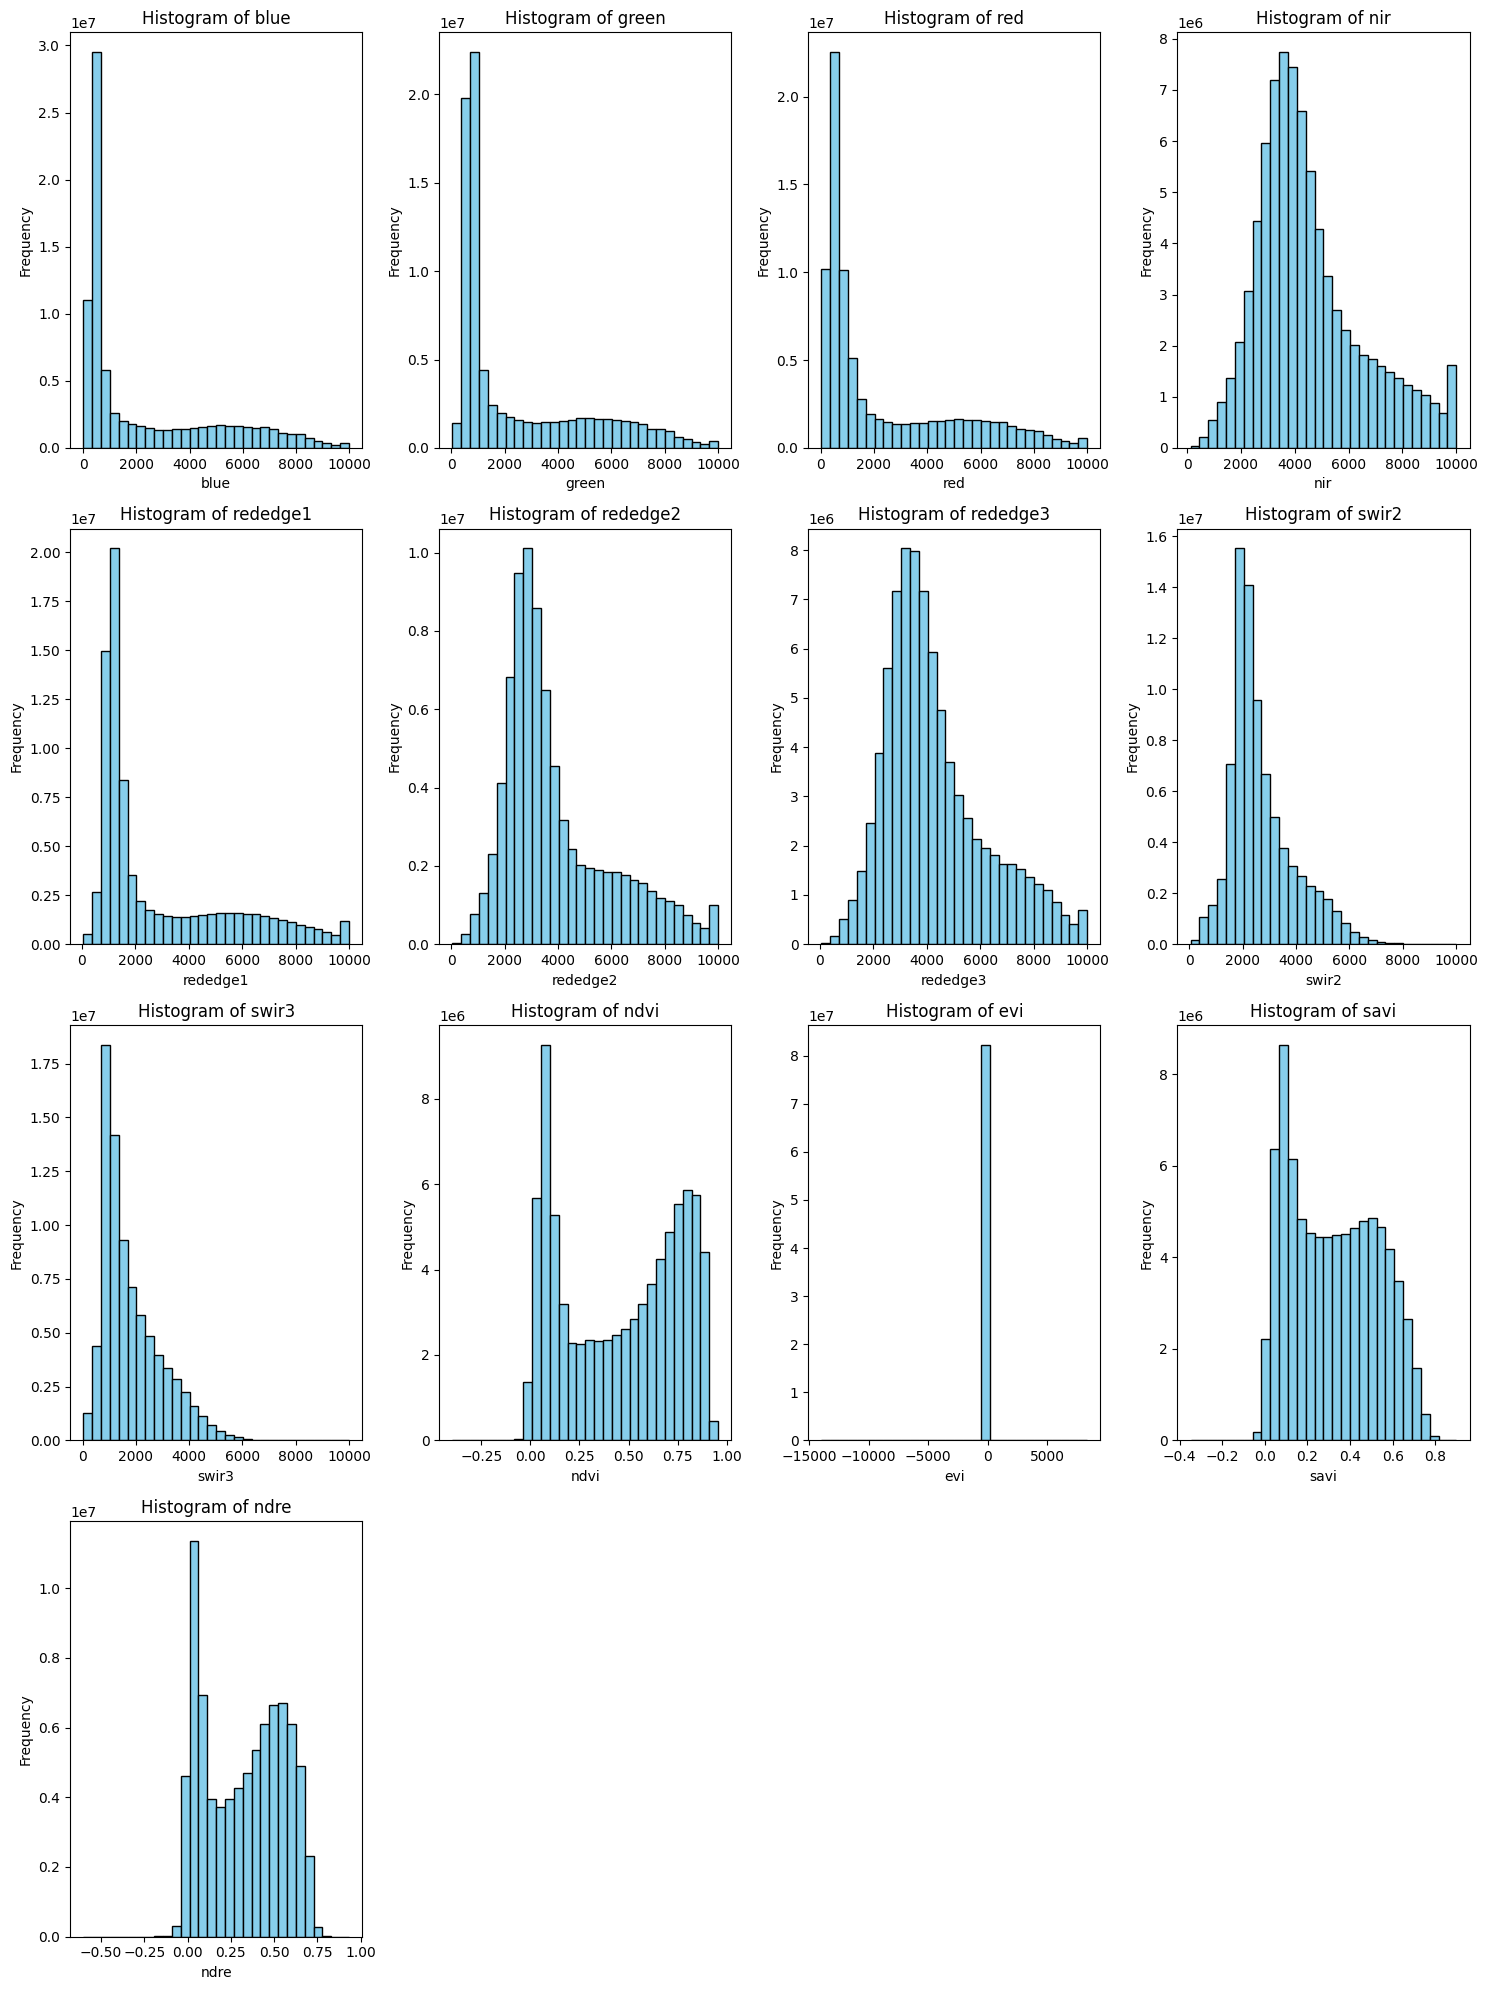

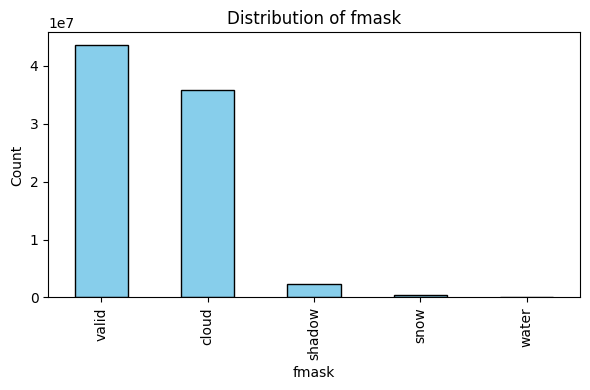

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assume final_data_sent is your DataFrame that has already been loaded

# List of numeric columns to plot
numeric_cols = ['blue', 'green', 'red', 'nir', 'rededge1', 'rededge2', 
                'rededge3', 'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre']

# Count the number of rows before cleaning
initial_row_count = len(final_data_sent)

# Remove rows where any numeric value is non-finite (i.e. is inf or -inf)
mask = final_data_sent[numeric_cols].apply(lambda x: np.isfinite(x)).all(axis=1)
final_data_sent = final_data_sent[mask]

# Count the number of rows after cleaning
final_row_count = len(final_data_sent)
rows_removed = initial_row_count - final_row_count

print(f"Rows removed due to infinite values: {rows_removed}")

def plot_numeric(data, plot_type='histogram'):
    """
    Plots either a histogram or a boxplot for the specified numeric columns,
    arranged in a 4 by 4 grid.
    
    Parameters:
    - data: DataFrame containing the data.
    - plot_type: A string indicating the type of plot ('histogram' or 'boxplot').
    """
    n_plots = len(numeric_cols)
    rows, cols = 4, 4
    fig, axs = plt.subplots(rows, cols, figsize=(15, 20))
    axs = axs.flatten()
    
    for i, col in enumerate(numeric_cols):
        # Check if the column exists in data
        if col not in data.columns:
            print(f"Column '{col}' is not in the dataframe.")
            continue
        
        if plot_type == 'histogram':
            axs[i].hist(data[col].dropna(), bins=30, color='skyblue', edgecolor='black')
            axs[i].set_title(f'Histogram of {col}')
            axs[i].set_xlabel(col)
            axs[i].set_ylabel('Frequency')
        elif plot_type == 'boxplot':
            axs[i].boxplot(data[col].dropna(), patch_artist=True,
                           boxprops=dict(facecolor='lightgreen', color='black'),
                           medianprops=dict(color='red'))
            axs[i].set_title(f'Boxplot of {col}')
            axs[i].set_xlabel(col)
        else:
            print("Invalid plot type. Please enter 'histogram' or 'boxplot'.")
            return
    
    for j in range(n_plots, len(axs)):
        axs[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

def plot_categorical(data, col='fmask'):
    """
    Plots a bar chart showing the distribution of a categorical column.
    
    Parameters:
    - data: DataFrame containing the data.
    - col: The name of the categorical column.
    """
    if col not in data.columns:
        print(f"Column '{col}' is not in the dataframe.")
        return
    
    counts = data[col].value_counts()
    plt.figure(figsize=(6, 4))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Example usage:
# Choose the type of numeric plot you want (either 'histogram' or 'boxplot')
plot_choice = input("Enter the type of numeric plot (histogram/boxplot): ").strip().lower()
plot_numeric(final_data_sent, plot_type=plot_choice)

# Plot the distribution for the categorical 'fmask' column.
plot_categorical(final_data_sent, col='fmask')

In [ ]:
import pandas as pd
import numpy as np

# List of numeric columns to perform outlier removal on.
numeric_cols = ['blue', 'green', 'red', 'nir', 'rededge1', 'rededge2', 
                'rededge3', 'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre']

def remove_outliers_iqr(data, threshold=1.5):
    """
    Removes outliers from numeric columns using the IQR method.
    
    Parameters:
    - data (pd.DataFrame): The original DataFrame.
    - threshold (float): The multiplier for the IQR to define outlier bounds (default is 1.5).
    
    Returns:
    - pd.DataFrame: A new DataFrame with outliers removed based on IQR.
    """
    # Count the original number of rows
    original_rows = data.shape[0]
    
    # Work on a copy of the data to avoid modifying the original DataFrame
    filtered_data = data.copy()
    
    # Downcast numeric columns to float32 (only if they exist)
    for col in numeric_cols:
        if col in filtered_data.columns:
            filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce').astype('float32')
    
    # Create a boolean mask that is True when a row is within the IQR bounds for all numeric columns
    mask = np.ones(len(filtered_data), dtype=bool)
    
    for col in numeric_cols:
        if col in filtered_data.columns:
            Q1 = filtered_data[col].quantile(0.25)
            Q3 = filtered_data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            mask &= (filtered_data[col] >= lower_bound) & (filtered_data[col] <= upper_bound)
    
    # Apply the mask to get the final DataFrame with outliers removed
    final_data = filtered_data[mask]
    
    # Compute statistics
    final_rows = final_data.shape[0]
    rows_removed = original_rows - final_rows
    percentage_removed = 100 * rows_removed / original_rows
    
    print("IQR Method:")
    print(f"Original number of rows: {original_rows}")
    print(f"Rows removed: {rows_removed}")
    print(f"Filtered DataFrame shape: {final_data.shape}")
    print(f"Percentage of rows filtered out: {percentage_removed:.2f}%\n")
    
    return final_data

def remove_outliers_zscore(data, threshold=3):
    """
    Removes outliers from numeric columns using the Z-score method.
    
    Parameters:
    - data (pd.DataFrame): The original DataFrame.
    - threshold (float): The Z-score threshold to define outliers (default is 3).
    
    Returns:
    - pd.DataFrame: A new DataFrame with outliers removed based on Z-score.
    """
    # Count the original number of rows
    original_rows = data.shape[0]
    
    # Work on a copy of the data to avoid modifying the original DataFrame
    filtered_data = data.copy()
    
    # Downcast numeric columns to float32 (only if they exist)
    for col in numeric_cols:
        if col in filtered_data.columns:
            filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce').astype('float32')
    
    # Create a boolean mask for rows that are within the Z-score threshold for all numeric columns
    mask = np.ones(len(filtered_data), dtype=bool)
    
    for col in numeric_cols:
        if col in filtered_data.columns:
            col_mean = filtered_data[col].mean()
            col_std = filtered_data[col].std()
            
            # To avoid division by zero in case col_std is zero, use np.abs(col_std) > 0
            if col_std > 0:
                z_scores = (filtered_data[col] - col_mean) / col_std
                mask &= (np.abs(z_scores) <= threshold)
            else:
                # If standard deviation is zero, all values are identical; keep them.
                mask &= True
    
    # Apply the mask to get the final DataFrame with outliers removed
    final_data = filtered_data[mask]
    
    # Compute statistics
    final_rows = final_data.shape[0]
    rows_removed = original_rows - final_rows
    percentage_removed = 100 * rows_removed / original_rows
    
    print("Z-score Method:")
    print(f"Original number of rows: {original_rows}")
    print(f"Rows removed: {rows_removed}")
    print(f"Filtered DataFrame shape: {final_data.shape}")
    print(f"Percentage of rows filtered out: {percentage_removed:.2f}%\n")
    
    return final_data

# Example usage:
# Assuming final_data_sent is your original DataFrame already loaded.
# Remove outliers using IQR method:
cleaned_data_iqr = remove_outliers_iqr(final_data_sent, threshold=1.5)

# Remove outliers using Z-score method:
cleaned_data_zscore = remove_outliers_zscore(final_data_sent, threshold=3)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assume final_data_sent is your DataFrame that has already been loaded

# List of numeric columns to plot
numeric_cols = ['blue', 'green', 'red', 'nir', 'rededge1', 'rededge2', 
                'rededge3', 'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre']

# Count the number of rows before cleaning
initial_row_count = len(final_data_sent)

# Remove rows where any numeric value is non-finite (i.e. is inf or -inf)
mask = final_data_sent[numeric_cols].apply(lambda x: np.isfinite(x)).all(axis=1)
final_data_sent = final_data_sent[mask]

# Count the number of rows after cleaning
final_row_count = len(final_data_sent)
rows_removed = initial_row_count - final_row_count

print(f"Rows removed due to infinite values: {rows_removed}")

def plot_numeric(data, plot_type='histogram'):
    """
    Plots either a histogram or a boxplot for the specified numeric columns,
    arranged in a 4 by 4 grid.
    
    Parameters:
    - data: DataFrame containing the data.
    - plot_type: A string indicating the type of plot ('histogram' or 'boxplot').
    """
    n_plots = len(numeric_cols)
    rows, cols = 4, 4
    fig, axs = plt.subplots(rows, cols, figsize=(15, 20))
    axs = axs.flatten()
    
    for i, col in enumerate(numeric_cols):
        # Check if the column exists in data
        if col not in data.columns:
            print(f"Column '{col}' is not in the dataframe.")
            continue
        
        if plot_type == 'histogram':
            axs[i].hist(data[col].dropna(), bins=30, color='skyblue', edgecolor='black')
            axs[i].set_title(f'Histogram of {col}')
            axs[i].set_xlabel(col)
            axs[i].set_ylabel('Frequency')
        elif plot_type == 'boxplot':
            axs[i].boxplot(data[col].dropna(), patch_artist=True,
                           boxprops=dict(facecolor='lightgreen', color='black'),
                           medianprops=dict(color='red'))
            axs[i].set_title(f'Boxplot of {col}')
            axs[i].set_xlabel(col)
        else:
            print("Invalid plot type. Please enter 'histogram' or 'boxplot'.")
            return
    
    for j in range(n_plots, len(axs)):
        axs[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

def plot_categorical(data, col='fmask'):
    """
    Plots a bar chart showing the distribution of a categorical column.
    
    Parameters:
    - data: DataFrame containing the data.
    - col: The name of the categorical column.
    """
    if col not in data.columns:
        print(f"Column '{col}' is not in the dataframe.")
        return
    
    counts = data[col].value_counts()
    plt.figure(figsize=(6, 4))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Example usage:
# Choose the type of numeric plot you want (either 'histogram' or 'boxplot')
plot_choice = input("Enter the type of numeric plot (histogram/boxplot): ").strip().lower()
plot_numeric(cleaned_data_iqr, plot_type=plot_choice)

# Plot the distribution for the categorical 'fmask' column.
plot_categorical(cleaned_data_iqr, col='fmask')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assume final_data_sent is your DataFrame that has already been loaded

# List of numeric columns to plot
numeric_cols = ['blue', 'green', 'red', 'nir', 'rededge1', 'rededge2', 
                'rededge3', 'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre']

# Count the number of rows before cleaning
initial_row_count = len(final_data_sent)

# Remove rows where any numeric value is non-finite (i.e. is inf or -inf)
mask = final_data_sent[numeric_cols].apply(lambda x: np.isfinite(x)).all(axis=1)
final_data_sent = final_data_sent[mask]

# Count the number of rows after cleaning
final_row_count = len(final_data_sent)
rows_removed = initial_row_count - final_row_count

print(f"Rows removed due to infinite values: {rows_removed}")

def plot_numeric(data, plot_type='histogram'):
    """
    Plots either a histogram or a boxplot for the specified numeric columns,
    arranged in a 4 by 4 grid.
    
    Parameters:
    - data: DataFrame containing the data.
    - plot_type: A string indicating the type of plot ('histogram' or 'boxplot').
    """
    n_plots = len(numeric_cols)
    rows, cols = 4, 4
    fig, axs = plt.subplots(rows, cols, figsize=(15, 20))
    axs = axs.flatten()
    
    for i, col in enumerate(numeric_cols):
        # Check if the column exists in data
        if col not in data.columns:
            print(f"Column '{col}' is not in the dataframe.")
            continue
        
        if plot_type == 'histogram':
            axs[i].hist(data[col].dropna(), bins=30, color='skyblue', edgecolor='black')
            axs[i].set_title(f'Histogram of {col}')
            axs[i].set_xlabel(col)
            axs[i].set_ylabel('Frequency')
        elif plot_type == 'boxplot':
            axs[i].boxplot(data[col].dropna(), patch_artist=True,
                           boxprops=dict(facecolor='lightgreen', color='black'),
                           medianprops=dict(color='red'))
            axs[i].set_title(f'Boxplot of {col}')
            axs[i].set_xlabel(col)
        else:
            print("Invalid plot type. Please enter 'histogram' or 'boxplot'.")
            return
    
    for j in range(n_plots, len(axs)):
        axs[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

def plot_categorical(data, col='fmask'):
    """
    Plots a bar chart showing the distribution of a categorical column.
    
    Parameters:
    - data: DataFrame containing the data.
    - col: The name of the categorical column.
    """
    if col not in data.columns:
        print(f"Column '{col}' is not in the dataframe.")
        return
    
    counts = data[col].value_counts()
    plt.figure(figsize=(6, 4))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Example usage:
# Choose the type of numeric plot you want (either 'histogram' or 'boxplot')
plot_choice = input("Enter the type of numeric plot (histogram/boxplot): ").strip().lower()
plot_numeric(cleaned_data_zscore, plot_type=plot_choice)

# Plot the distribution for the categorical 'fmask' column.
plot_categorical(cleaned_data_zscore, col='fmask')

### Cleaning the Plate meter Data

In [ ]:
import pandas as pd

def process_rpm_data(final_data_rpm):
    """
    Processes the final_data_rpm DataFrame:
    1. Retains specific columns.
    2. Aggregates categorical columns by the most frequent value.
    3. Averages the 'AverageDM' column and renames it to 'remote_cover'.
    4. Groups by 'Farm Code', 'pcode', and 'Date' to aggregate data.
    
    Args:
        final_data_rpm (pd.DataFrame): The original DataFrame containing RPM data.
        
    Returns:
        pd.DataFrame: The cleaned and aggregated DataFrame (final_data_pm).
    """

    # Condition for 1000 < AverageDM < 5000
    mask = (final_data_rpm['AverageDM'] > 1000) & (final_data_rpm['AverageDM'] < 4000)

    # Count matching records
    count_1000_5000 = mask.sum()
    print("Number of records with 1000 < AverageDM < 4000:", count_1000_5000)

    # Calculate total rows in the DataFrame
    total_rows = len(final_data_rpm)

    # Compute the percentage
    percentage_1000_5000 = (count_1000_5000 / total_rows) * 100
    print(f"Percentage of records with 1000 < AverageDM < 4000: {percentage_1000_5000:.2f}%")

    # Keep only the necessary columns
    final_data_rpm = final_data_rpm[['FarmName', 'WalkAverage', 'RawReading', 'AverageDM', 
                                     'FarmResidualSetting', 'Farm Code', 'pname_pm', 
                                     'pname_s', 'pcode', 'Date']]

    # Filter data to keep only records within 1000 < AverageDM < 5000
    final_data_rpm = final_data_rpm[mask]

    # Rename 'AverageDM' to 'remote_cover'
    final_data_rpm.rename(columns={'AverageDM': 'remote_cover'}, inplace=True)

    # Group by 'Farm Code', 'pcode', and 'Date' to aggregate the data
    final_data_pm = final_data_rpm.groupby(['Farm Code', 'pcode', 'Date']).agg(
        # For categorical columns, get the most frequent value (mode)
        FarmName=('FarmName', lambda x: x.mode()[0] if not x.mode().empty else None),
        pname_pm=('pname_pm', lambda x: x.mode()[0] if not x.mode().empty else None),
        pname_s=('pname_s', lambda x: x.mode()[0] if not x.mode().empty else None),
        
        # For numerical columns, take the mean
        WalkAverage=('WalkAverage', 'mean'),
        RawReading=('RawReading', 'mean'),
        remote_cover=('remote_cover', 'mean'),
        FarmResidualSetting=('FarmResidualSetting', 'mean')
    ).reset_index()

    # Return the processed DataFrame
    return final_data_pm

# Example usage:
# Assuming final_data_rpm is your DataFrame
final_data_pm = process_rpm_data(final_data_rpm)

# Display the cleaned DataFrame
print(final_data_pm.head())

In [ ]:
final_data_sent.info()

### Cleaning the Sentinel Data from raw data

In [ ]:
import pandas as pd
import numpy as np

def filter_valid_fmask_remove_outliers_iqr(data, threshold=1.5):
    """
    Filters the DataFrame to:
      1. Keep only rows where 'fmask' equals 'valid'.
      2. Downcasts numeric columns to float32 to save memory.
      3. Remove outliers from numeric columns using the IQR method.
      
    Parameters:
    - data (pd.DataFrame): The original DataFrame.
    - threshold (float): The multiplier for the IQR to define outlier bounds (default is 1.5).
    
    Returns:
    - pd.DataFrame: A new DataFrame with valid 'fmask' rows and outliers removed.
    """
    # Count the original number of rows
    original_rows = data.shape[0]
    
    # Filter the DataFrame to only include rows where 'fmask' is 'valid'
    filtered_data = data[data['fmask'] == 'valid'].copy()
    
    # Define the list of numeric columns for which to remove outliers
    numeric_cols = ['blue', 'green', 'red', 'nir', 'rededge1', 'rededge2', 
                    'rededge3', 'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre']
    
    # Downcast numeric columns to float32 to reduce memory usage
    for col in numeric_cols:
        if col in filtered_data.columns:
            filtered_data[col] = pd.to_numeric(filtered_data[col], errors='coerce').astype('float32')
    
    # Create a boolean mask which is True for rows that are within the IQR bounds for all numeric columns
    mask = np.ones(len(filtered_data), dtype=bool)
    
    for col in numeric_cols:
        if col in filtered_data.columns:
            Q1 = filtered_data[col].quantile(0.25)
            Q3 = filtered_data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            # Update the mask with a logical AND for the current column condition
            mask &= (filtered_data[col] >= lower_bound) & (filtered_data[col] <= upper_bound)
    
    # Apply the combined mask only once to get the final filtered DataFrame
    final_data = filtered_data[mask]
    
    # Calculate statistics after outlier removal
    final_rows, final_cols = final_data.shape
    percentage_filtered_out = 100 * (original_rows - final_rows) / original_rows
    
    # Print statistics
    print(f"Original number of rows: {original_rows}")
    print(f"Filtered DataFrame shape (rows, columns): {(final_rows, final_cols)}")
    print(f"Percentage of rows filtered out: {percentage_filtered_out:.2f}%")
    
    return final_data

# Example usage:
# Assuming final_data_sent is your original DataFrame
cleaned_data = filter_valid_fmask_remove_outliers_iqr(final_data_sent, threshold=1.5)

Rows removed due to infinite values: 0


Enter the type of numeric plot (histogram/boxplot):  histogram


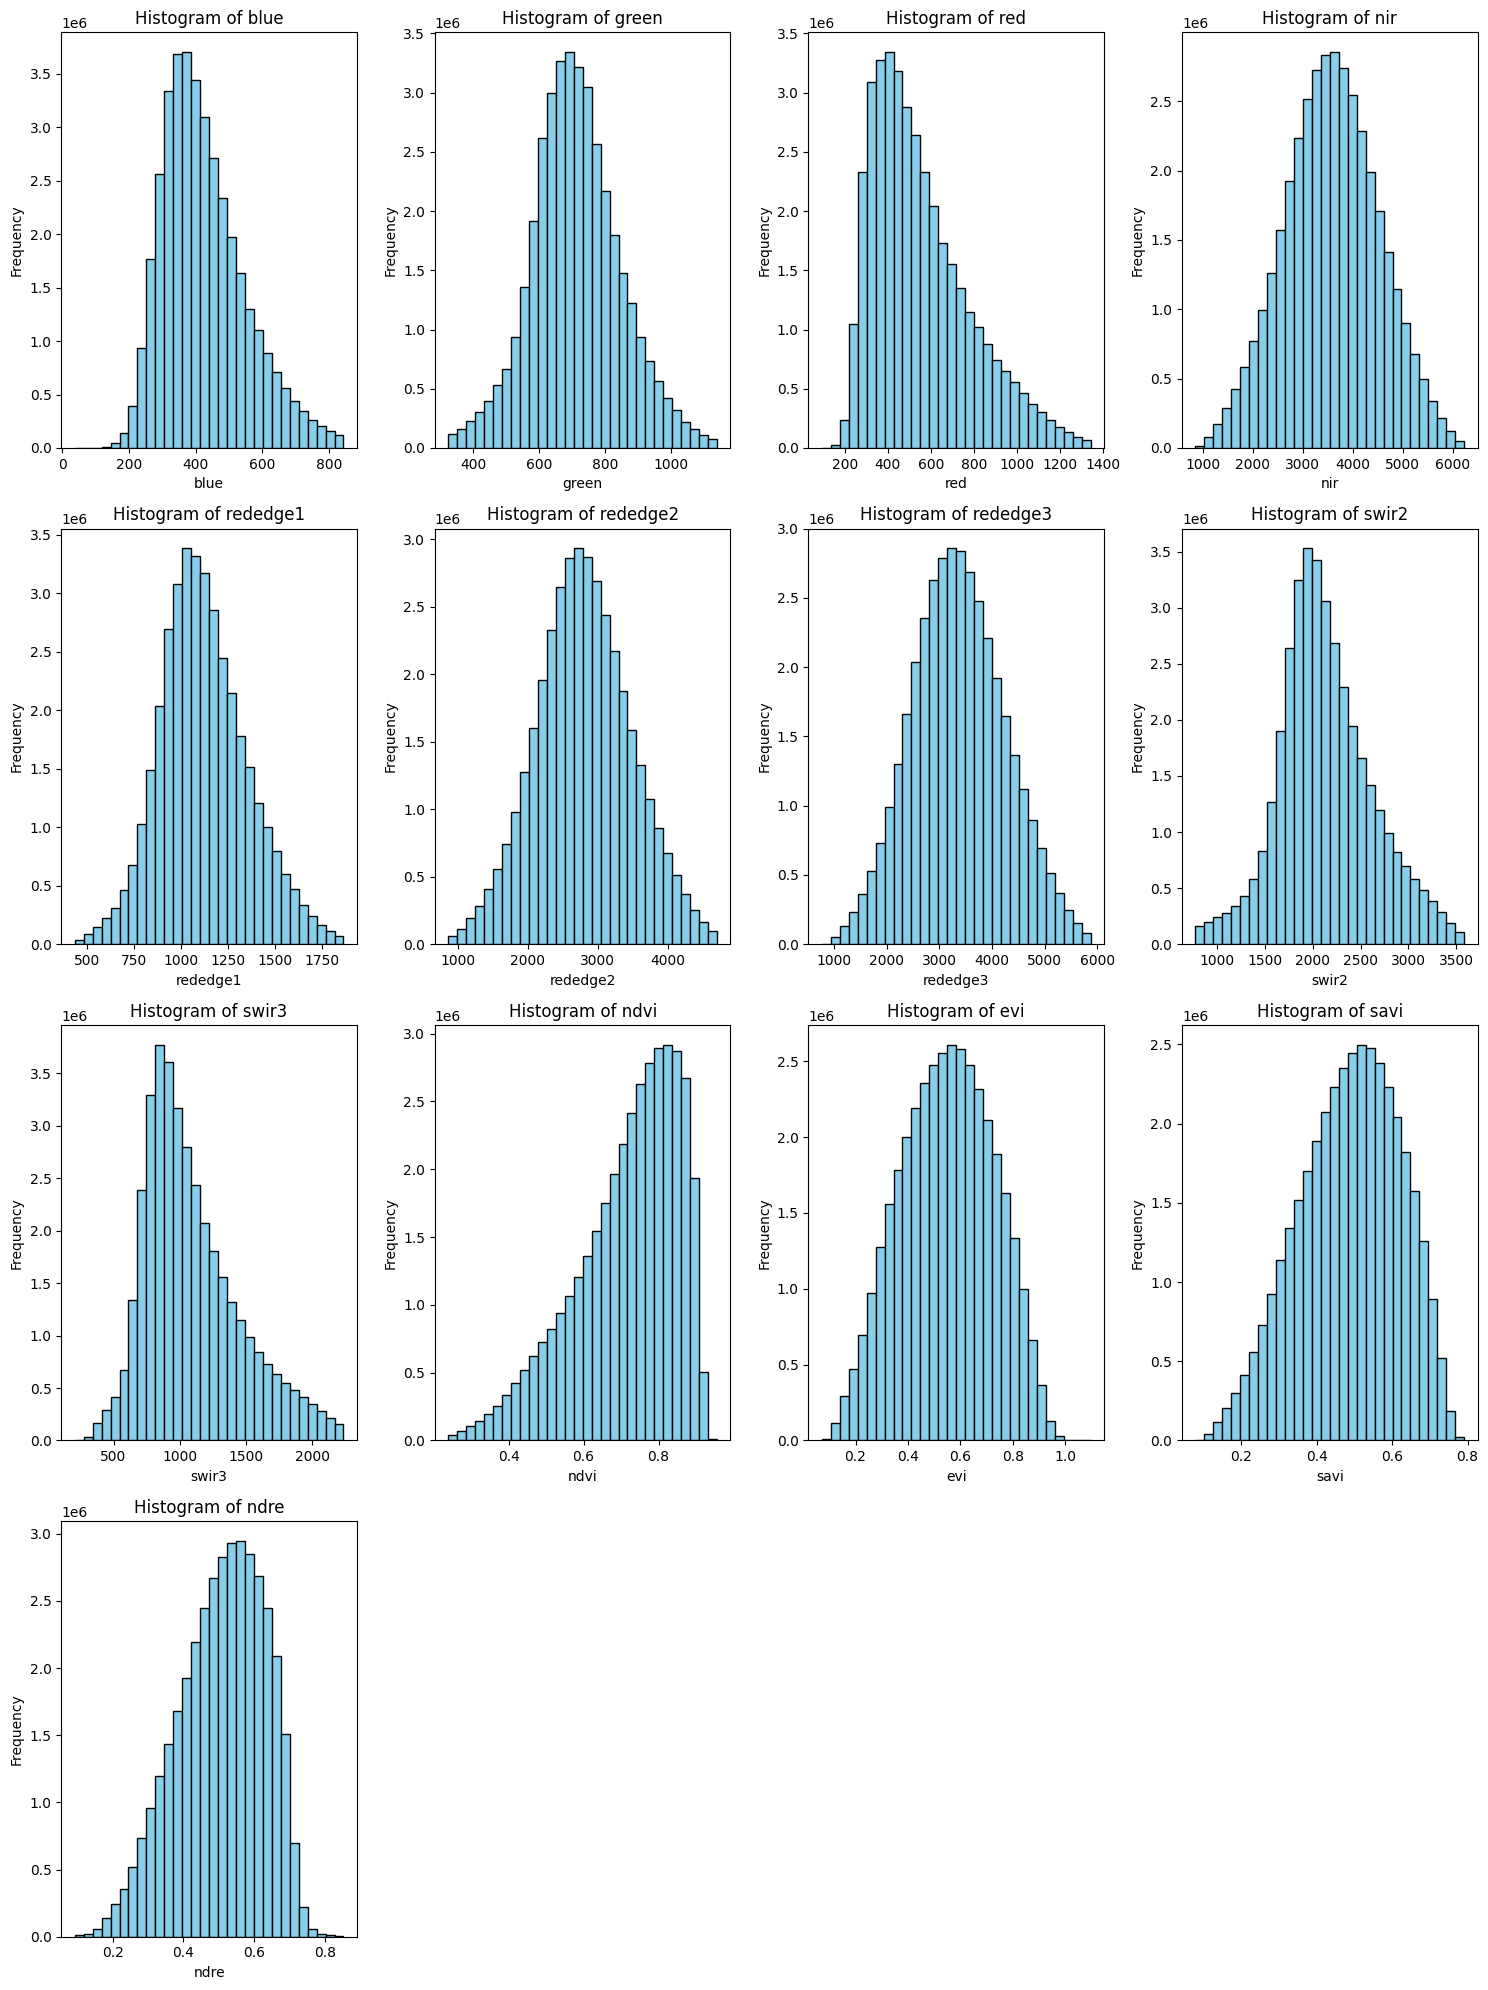

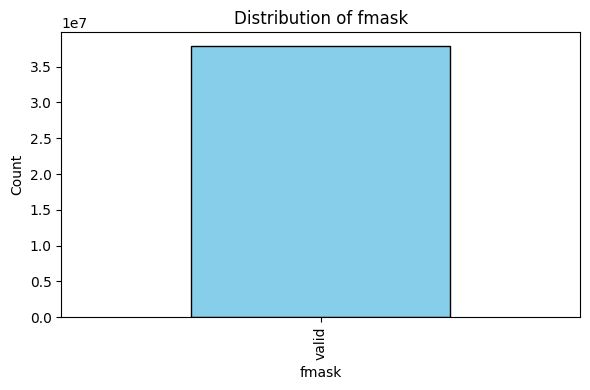

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assume final_data_sent is your DataFrame that has already been loaded

# List of numeric columns to plot
numeric_cols = ['blue', 'green', 'red', 'nir', 'rededge1', 'rededge2', 
                'rededge3', 'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre']

# Count the number of rows before cleaning
initial_row_count = len(final_data_sent)

# Remove rows where any numeric value is non-finite (i.e. is inf or -inf)
mask = final_data_sent[numeric_cols].apply(lambda x: np.isfinite(x)).all(axis=1)
final_data_sent = final_data_sent[mask]

# Count the number of rows after cleaning
final_row_count = len(final_data_sent)
rows_removed = initial_row_count - final_row_count

print(f"Rows removed due to infinite values: {rows_removed}")

def plot_numeric(data, plot_type='histogram'):
    """
    Plots either a histogram or a boxplot for the specified numeric columns,
    arranged in a 4 by 4 grid.
    
    Parameters:
    - data: DataFrame containing the data.
    - plot_type: A string indicating the type of plot ('histogram' or 'boxplot').
    """
    n_plots = len(numeric_cols)
    rows, cols = 4, 4
    fig, axs = plt.subplots(rows, cols, figsize=(15, 20))
    axs = axs.flatten()
    
    for i, col in enumerate(numeric_cols):
        # Check if the column exists in data
        if col not in data.columns:
            print(f"Column '{col}' is not in the dataframe.")
            continue
        
        if plot_type == 'histogram':
            axs[i].hist(data[col].dropna(), bins=30, color='skyblue', edgecolor='black')
            axs[i].set_title(f'Histogram of {col}')
            axs[i].set_xlabel(col)
            axs[i].set_ylabel('Frequency')
        elif plot_type == 'boxplot':
            axs[i].boxplot(data[col].dropna(), patch_artist=True,
                           boxprops=dict(facecolor='lightgreen', color='black'),
                           medianprops=dict(color='red'))
            axs[i].set_title(f'Boxplot of {col}')
            axs[i].set_xlabel(col)
        else:
            print("Invalid plot type. Please enter 'histogram' or 'boxplot'.")
            return
    
    for j in range(n_plots, len(axs)):
        axs[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

def plot_categorical(data, col='fmask'):
    """
    Plots a bar chart showing the distribution of a categorical column.
    
    Parameters:
    - data: DataFrame containing the data.
    - col: The name of the categorical column.
    """
    if col not in data.columns:
        print(f"Column '{col}' is not in the dataframe.")
        return
    
    counts = data[col].value_counts()
    plt.figure(figsize=(6, 4))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Example usage:
# Choose the type of numeric plot you want (either 'histogram' or 'boxplot')
plot_choice = input("Enter the type of numeric plot (histogram/boxplot): ").strip().lower()
plot_numeric(cleaned_data, plot_type=plot_choice)

# Plot the distribution for the categorical 'fmask' column.
plot_categorical(cleaned_data, col='fmask')

In [27]:
cleaned_data.columns

Index(['date', 'lon', 'lat', 'blue', 'green', 'red', 'nir', 'rededge1',
       'rededge2', 'rededge3', 'swir2', 'swir3', 'fmask', 'ndvi', 'evi',
       'savi', 'ndre', 'code', 'name', 'Farm Code', 'pname_s', 'pcode_s',
       'pcode'],
      dtype='object')

In [ ]:
import pandas as pd

def process_final_data_sent_no_fmask(final_data_sent):
    """
    Process the cleaned final_data_sent DataFrame by:
    1. Aggregating numerical columns by mean.
    2. Aggregating categorical columns (including fmask) by the most frequent value (mode).
    3. Dropping the 'date', 'lon', and 'lat' columns.
    
    Args:
        final_data_sent (pd.DataFrame): The cleaned DataFrame (with fmask already processed).
        
    Returns:
        pd.DataFrame: The processed and aggregated DataFrame (final_data_sv_new).
    """
    
    # Define numerical columns that should be aggregated by mean
    numerical_columns = ['blue', 'green', 'red', 'nir', 'rededge1', 'rededge2', 
                         'rededge3', 'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre']
    
    # Define categorical columns that should be aggregated by most frequent (mode)
    categorical_columns = ['fmask', 'code', 'name', 'pname_s', 'pcode_s']
    
    # Group by 'Farm Code', 'Date', and 'pcode' to perform aggregation
    grouped_data = final_data_sent.groupby(['Farm Code', 'Date', 'pcode'])
    
    # Aggregate numerical columns by mean
    aggregated_numerical = grouped_data[numerical_columns].mean()
    
    # Aggregate categorical columns by most frequent (mode)
    aggregated_categorical = grouped_data[categorical_columns].agg(
        lambda x: x.mode().iloc[0] if not x.mode().empty else None
    )
    
    # Concatenate the aggregated numerical and categorical results
    final_data_sv_new = pd.concat([aggregated_numerical, aggregated_categorical], axis=1)
    
    # Reset index to bring the grouping columns back as regular columns
    final_data_sv_new.reset_index(inplace=True)
    
    # Drop unnecessary columns, such as 'date', 'lon', and 'lat' if present (ignore errors if not present)
    final_data_sv_new.drop(columns=['date', 'lon', 'lat'], inplace=True, errors='ignore')
    
    return final_data_sv_new

# Example usage:
# Assuming final_data_sent is your cleaned DataFrame
final_data_sv_new = process_final_data_sent_no_fmask(cleaned_data)

# Display the first few rows of the processed DataFrame
print(final_data_sv_new.head())

Enter the type of numeric plot (histogram/boxplot):  histogram


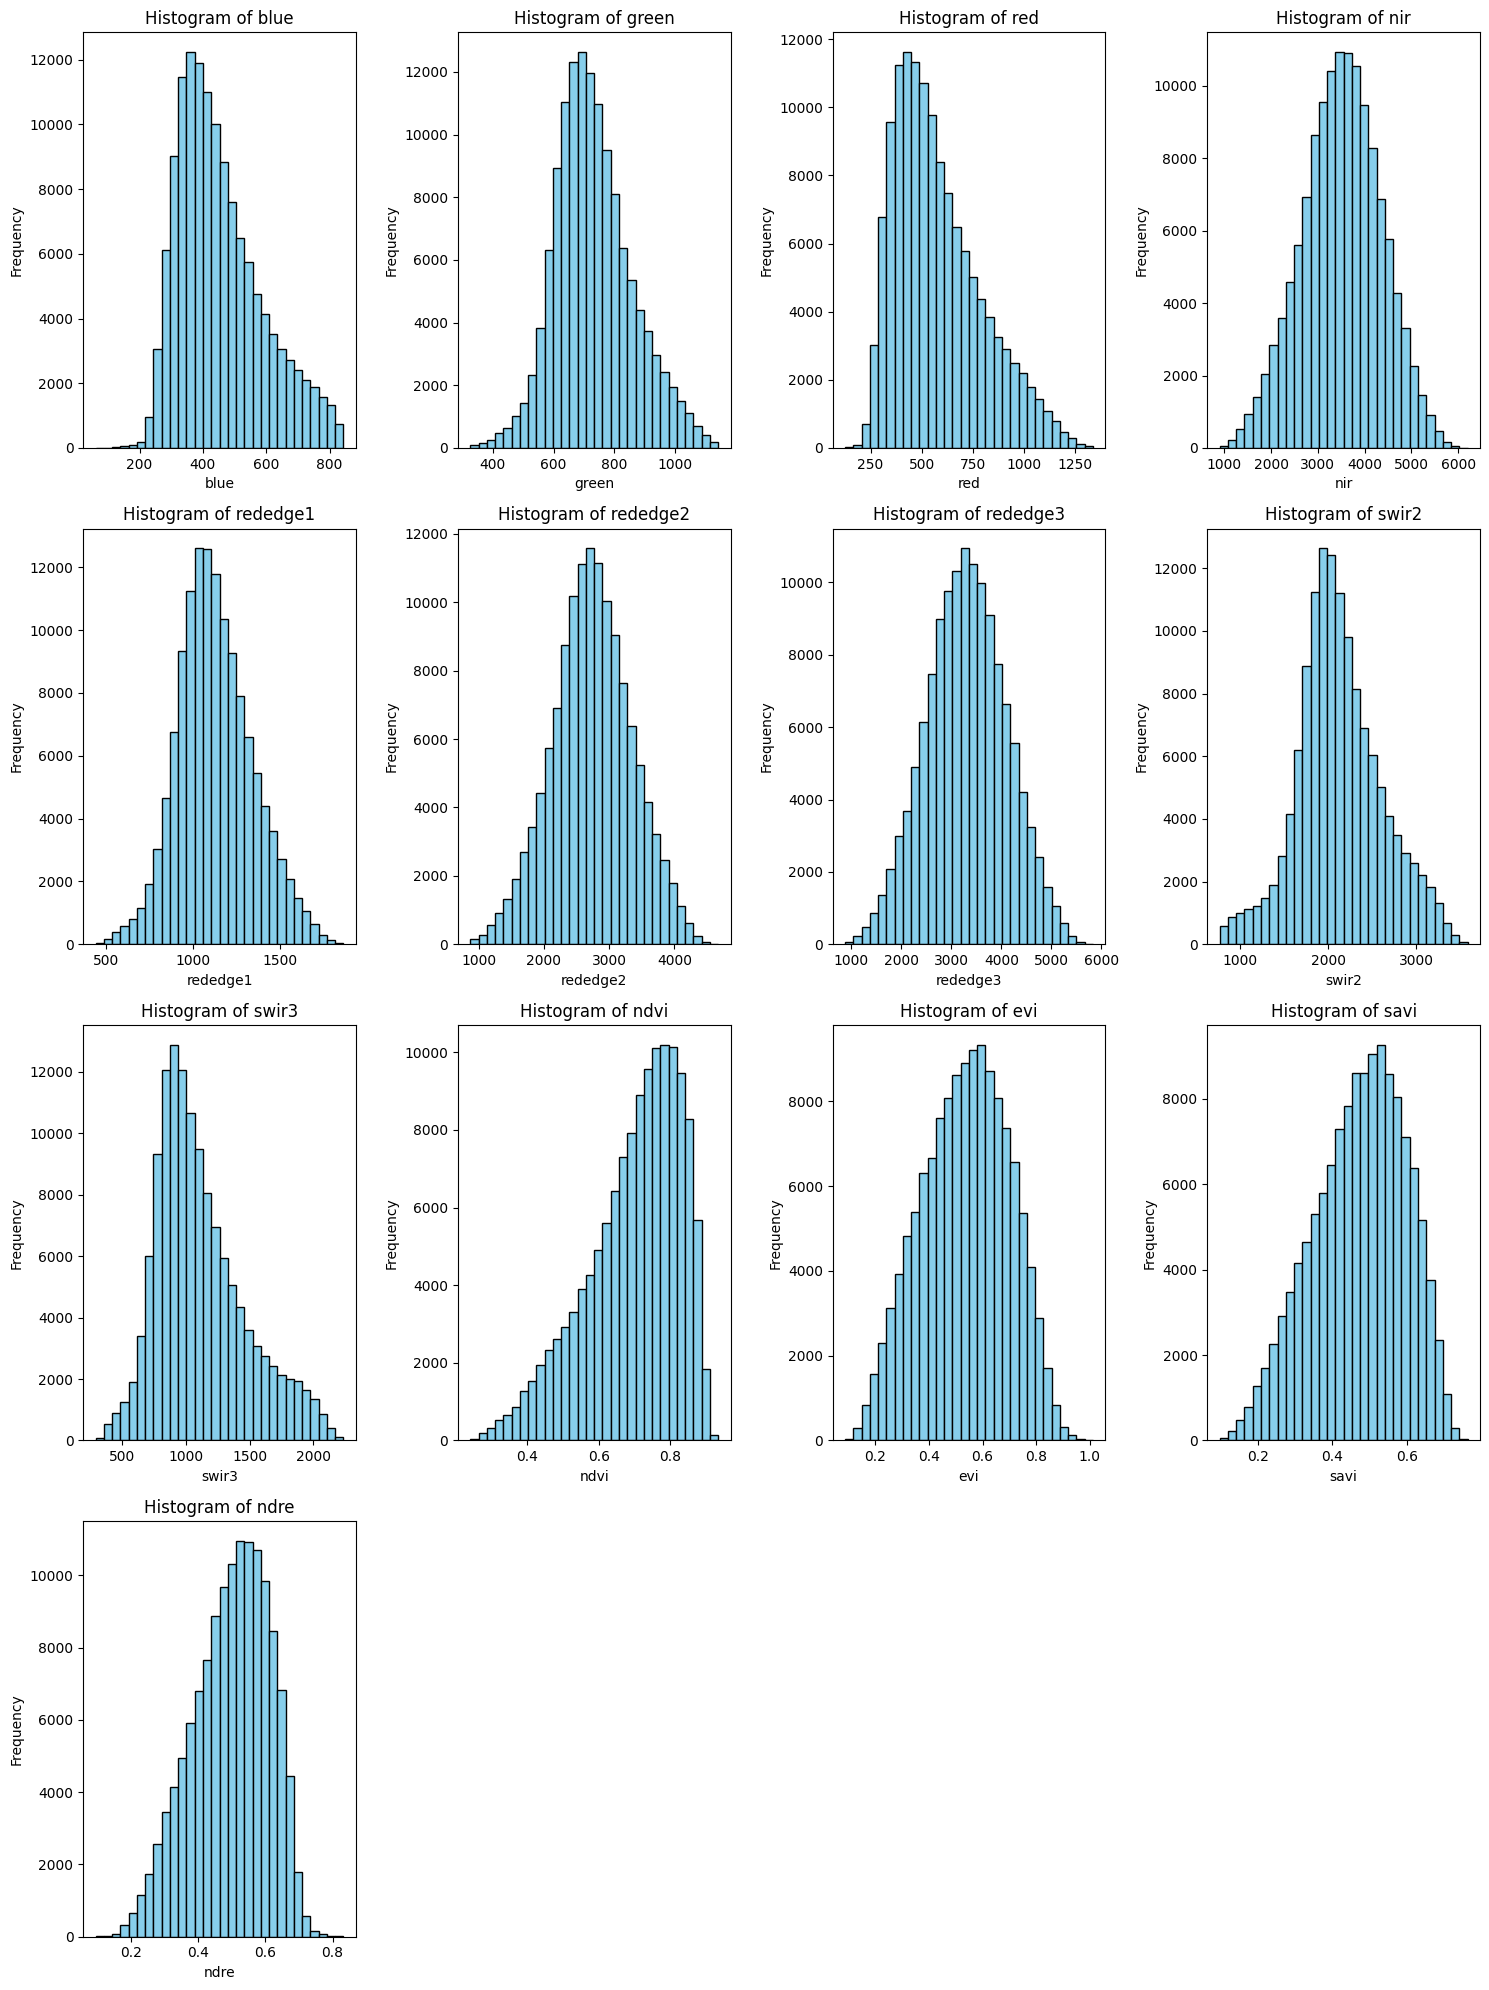

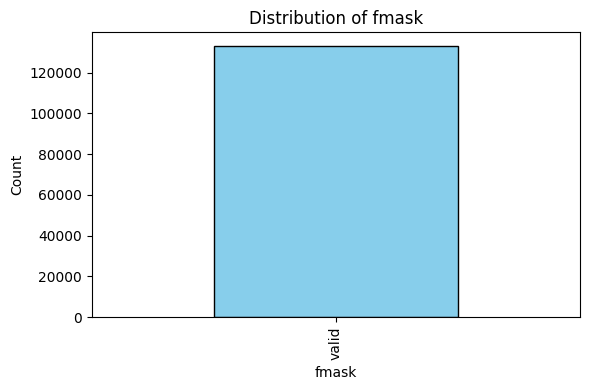

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume final_data_sent is your DataFrame that has already been loaded

# List of numeric columns to plot
numeric_cols = ['blue', 'green', 'red', 'nir', 'rededge1', 'rededge2', 
                'rededge3', 'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre']

def plot_numeric(data, plot_type='histogram'):
    """
    Plots either a histogram or a boxplot for the specified numeric columns,
    arranged in a 4 by 4 grid.
    
    Parameters:
    - data: DataFrame containing the data.
    - plot_type: A string indicating the type of plot ('histogram' or 'boxplot').
    """
    # Create a grid of 4 rows by 3 columns (total 12 subplots)
    # If there are more than 12 numeric columns, only the first 12 will be used.
    # Here, since we have 13 numeric columns, we will loop over all and hide extra axes.
    n_plots = len(numeric_cols)
    rows, cols = 4, 4
    fig, axs = plt.subplots(rows, cols, figsize=(15, 20))
    axs = axs.flatten()
    
    for i, col in enumerate(numeric_cols):
        # Check if the column exists in data
        if col not in data.columns:
            print(f"Column '{col}' is not in the dataframe.")
            continue
        
        # For histogram plot
        if plot_type == 'histogram':
            axs[i].hist(data[col].dropna(), bins=30, color='skyblue', edgecolor='black')
            axs[i].set_title(f'Histogram of {col}')
            axs[i].set_xlabel(col)
            axs[i].set_ylabel('Frequency')
        # For boxplot
        elif plot_type == 'boxplot':
            axs[i].boxplot(data[col].dropna(), patch_artist=True,
                           boxprops=dict(facecolor='lightgreen', color='black'),
                           medianprops=dict(color='red'))
            axs[i].set_title(f'Boxplot of {col}')
            axs[i].set_xlabel(col)
        else:
            print("Invalid plot type. Please choose 'histogram' or 'boxplot'.")
            return
    
    # If we have any extra axes, hide them
    for j in range(n_plots, len(axs)):
        axs[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

def plot_categorical(data, col='fmask'):
    """
    Plots a bar chart showing the distribution of a categorical column.
    
    Parameters:
    - data: DataFrame containing the data.
    - col: The name of the categorical column.
    """
    if col not in data.columns:
        print(f"Column '{col}' is not in the dataframe.")
        return
    
    counts = data[col].value_counts()
    plt.figure(figsize=(6, 4))
    counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Example usage:
# Choose the type of numeric plot you want (either 'histogram' or 'boxplot')
plot_choice = input("Enter the type of numeric plot (histogram/boxplot): ").strip().lower()
plot_numeric(final_data_sv_new, plot_type=plot_choice)

# Plot the distribution for the categorical 'fmask' column.
plot_categorical(final_data_sv_new, col='fmask')

### Sentinel Aggregation for days where majority of the paddocks were fmasked as valid

In [ ]:
import pandas as pd

def process_final_data_sent(final_data_sent):
    """
    Process final_data_sent DataFrame by:
    1. Filtering data to only include rows where the majority of paddocks have fmask = 'valid'.
    2. Aggregating numerical columns by mean.
    3. Aggregating categorical columns (including fmask) by most frequent (mode).
    4. Dropping the 'date', 'lon', and 'lat' columns and returning a tidy DataFrame.
    
    Args:
        final_data_sent (pd.DataFrame): The original DataFrame containing the data.
        
    Returns:
        pd.DataFrame: The processed and aggregated DataFrame (final_data_sv).
    """
    
    # Step 1: Filter rows where the majority of paddocks have 'fmask' = 'valid' for each day
    valid_fmask_df = final_data_sent.groupby(['Farm Code', 'Date']).apply(
        lambda x: (x['fmask'] == 'valid').sum() > len(x) / 2
    ).reset_index(name='valid_fmask')

    # Merge the valid_fmask flag with the original data
    filtered_data = final_data_sent.merge(valid_fmask_df[['Farm Code', 'Date', 'valid_fmask']], 
                                          on=['Farm Code', 'Date'], how='inner')

    # Keep only rows where valid_fmask is True
    filtered_data = filtered_data[filtered_data['valid_fmask']]

    # Define numerical columns that should be aggregated by mean
    numerical_columns = ['blue', 'green', 'red', 'nir', 'rededge1', 'rededge2', 
                         'rededge3', 'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre']
    
    # Define categorical columns that should be aggregated by most frequent (mode)
    categorical_columns = ['fmask', 'code', 'name', 'pname_s', 'pcode_s']
    
    # Group by 'Farm Code', 'Date', and 'pcode' to perform aggregation
    final_data_sent_grouped = filtered_data.groupby(['Farm Code', 'Date', 'pcode'])

    # Aggregate numerical columns by mean
    aggregated_numerical = final_data_sent_grouped[numerical_columns].mean()

    # Aggregate categorical columns by most frequent (mode)
    aggregated_categorical = final_data_sent_grouped[categorical_columns].agg(
        lambda x: x.mode()[0] if len(x.mode()) > 0 else None
    )

    # Concatenate the numerical and categorical aggregated results
    final_data_sv = pd.concat([aggregated_numerical, aggregated_categorical], axis=1)

    # Reset index to make 'Farm Code', 'Date', and 'pcode' columns again
    final_data_sv.reset_index(inplace=True)

    # Drop unnecessary columns (the 'date', 'lon', and 'lat' columns)
    final_data_sv.drop(columns=['date', 'lon', 'lat'], inplace=True, errors='ignore')

    # Return the final aggregated DataFrame
    return final_data_sv

# Example usage:
# Assuming final_data_sent is the DataFrame containing your data
final_data_sv = process_final_data_sent(final_data_sent)

# Display the first few rows of the processed final_data_sv
print(final_data_sv.head())

In [ ]:
import pandas as pd

def clean_pcode(pcode_column):
    """
    Removes '(ruins)' or '(retired)' from the pcode column if they exist, and trims trailing whitespaces.
    
    Args:
        pcode_column (pd.Series): The pcode column in a DataFrame.
        
    Returns:
        pd.Series: The cleaned pcode column with '(ruins)', '(retired)', and trailing spaces removed.
    """
    # Remove "(ruins)" and "(retired)" from the pcode column, and trim any trailing whitespaces
    cleaned_pcode = pcode_column.str.replace(r'\(ruins\)|\(retired\)', '', regex=True).str.strip()
    return cleaned_pcode

def clean_pcodes_for_all_datasets(final_data_s, final_data_sv, final_data_sv_new, final_data_pio, final_data_pm):
    """
    Cleans the 'pcode' column in all given DataFrames by removing '(ruins)', '(retired)', 
    and trailing whitespaces.
    
    Args:
        final_data_s (pd.DataFrame): DataFrame containing the processed data.
        final_data_sv (pd.DataFrame): DataFrame containing the processed data.
        final_data_sv_new (pd.DataFrame): DataFrame containing the processed data.
        final_data_pio (pd.DataFrame): DataFrame containing the processed data.
        final_data_pm (pd.DataFrame): DataFrame containing the processed data.
        
    Returns:
        tuple: A tuple of cleaned DataFrames.
    """
    # Apply the clean_pcode function to 'pcode' column in each DataFrame
    final_data_s['pcode'] = clean_pcode(final_data_s['pcode'])
    final_data_sv['pcode'] = clean_pcode(final_data_sv['pcode'])
    final_data_sv_new['pcode'] = clean_pcode(final_data_sv_new['pcode'])
    final_data_pio['pcode'] = clean_pcode(final_data_pio['pcode'])
    final_data_pm['pcode'] = clean_pcode(final_data_pm['pcode'])

    # Return the cleaned DataFrames
    return final_data_s, final_data_sv, final_data_sv_new, final_data_pio, final_data_pm

# Example usage:
# Assuming final_data_s, final_data_sv, final_data_pio, and final_data_pm are your DataFrames
final_data_s, final_data_sv, final_data_sv_new, final_data_pio, final_data_pm = clean_pcodes_for_all_datasets(final_data_s, final_data_sv, final_data_sv_new, final_data_pio, final_data_pm)

# Check the cleaned data
print(final_data_s.shape)
print(final_data_sv.shape)
print(final_data_sv_new.shape)
print(final_data_pio.shape)
print(final_data_pm.shape)

In [31]:
import pandas as pd

def get_paddocks_for_all_farms(df, farm_code_column='Farm Code', paddock_code_column='pcode'):
    """
    Given a dataframe, prints the unique paddock codes for each farm across all farms in the dataframe.
    
    Args:
        df (pd.DataFrame): The dataframe containing the farm and paddock data.
        farm_code_column (str): The column name containing the farm code. Default is 'Farm Code'.
        paddock_code_column (str): The column name containing the paddock codes. Default is 'pcode'.
    """
    
    # Get a list of unique farm names
    farm_names = df[farm_code_column].unique()
    
    # Iterate over each farm and get unique paddocks
    for farm_name in farm_names:
        # Filter the dataframe by farm
        farm_data = df[df[farm_code_column] == farm_name]
        
        # Get unique paddock codes for the current farm
        unique_paddocks = farm_data[paddock_code_column].unique()
        
        # Print the results
        print(f"Farm: {farm_name}")
        print(f"Unique paddocks: {unique_paddocks}\n")


# Example usage:
# Assuming final_data_rpm, final_data_pio, final_data_sent are your DataFrames

# Call the function on any DataFrame
get_paddocks_for_all_farms(final_data_pio)  # Replace final_data_rpm with the dataframe you want to process

Farm: Apps
Unique paddocks: ['b' 'f2' 'f3' 'f4' 'f5' 'f6' 'f7' 'fctry1' 'flts1' 'flts2' 'flts3'
 'flts4' 'flts5' 'flts6' 'flts7' 'fp' 'g1' 'g2' 'g3' 'g4' 'g5' 'g6' 'g7'
 'gd1' 'gd2' 'gd3' 'h1' 'h2' 'h3' 'h4' 'h5' 'hd1' 'hd2' 'hd3' 'hd4' 'hd5'
 'k2' 'k3' 'k4' 'k5' 'k6' 'k7' 'k8' 'k9' 'k10' 'k11' 'k12' 'k13' 'k14'
 'rd2' 'rd3' 'rd4' 'rd5' 'rd7' 'rd8' 'rd11' 'rd12' 'rd13' 'rd14' 'rd1'
 'scl' 't1' 't2' 't3' 't4' 't5' 't6' 't7' 't8' 'tc2' 'tc3' 'tc4' 'tc5'
 'tc6' 'tcourt1' 'wm1' 'wm2' 'wm3' 'wm4' 'wm5' 'wm6' 'k1' 'rd9']

Farm: Bale
Unique paddocks: ['b' 'bf' 'bflt' 'c' 'cn' 'crk' 'd1' 'h' 'nt' 'od' 'os' 'p' 'rc' 'rf' 'rh'
 'rh1' 'rh2' 'rh3' 'rh4' 'rh5' 's1' 's2' 's3' 'sy1' 'sy2' 'sye' 'tt' 'syw']

Farm: Behrens
Unique paddocks: ['b2' 'c' 'ch' 'd' 'd1' 'd2' 'e' 'el1' 'el2' 'el3' 'el4' 'el5' 'el6' 'el7'
 'el8' 'el9' 'el10' 'el11' 'el12' 'el13/14' 'el15' 'er1' 'er2' 'er3' 'er4'
 'er5' 'er6' 'er7' 'er8' 'er9' 'er10' 'er11' 'er12' 'er13' 'er14' 'er15'
 'j' 's1' 's2' 's3' 's4' 's5' 's6' 's7' 'sl1

In [ ]:
import pandas as pd

# Function to determine season based on month
def get_season(month):
    if month in [9, 10, 11]:  # Spring
        return "Spring"
    elif month in [12, 1, 2]:  # Summer
        return "Summer"
    elif month in [3, 4, 5]:  # Autumn
        return "Autumn"
    else:  # Winter
        return "Winter"

# Function to add week of the year and season columns to a DataFrame
def add_week_and_season_columns(df):
    # Ensure 'Date' column is in datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Create a 'Week of the Year' column
    df['Week'] = df['Date'].dt.isocalendar().week

    # Create a 'Season' column based on the month of the 'Date' column
    df['Season'] = df['Date'].dt.month.apply(get_season)

    return df

# Example usage with the 5 dataframes (final_data_s, final_data_sv, final_data_pio, final_data_pm, weather_data)
final_data_s = add_week_and_season_columns(final_data_s)
final_data_sv = add_week_and_season_columns(final_data_sv)
final_data_sv_new = add_week_and_season_columns(final_data_sv_new)
final_data_pio = add_week_and_season_columns(final_data_pio)
final_data_pm = add_week_and_season_columns(final_data_pm)
weather_data = add_week_and_season_columns(weather_data)

# Check the cleaned data for all 5 dataframes
print(final_data_s.info())
print(final_data_sv.info())
print(final_data_sv_new.info())
print(final_data_pio.info())
print(final_data_pm.info())
print(weather_data.info())

In [ ]:
import pandas as pd

def add_year_column(final_data_pm, final_data_pio, final_data_sv, final_data_sv_new, final_data_s, weather_data):
    """
    Adds a 'Year' column to each of the specified DataFrames based on the 'Date' column.
    
    Args:
        final_data_pm, final_data_pio, final_data_sv, final_data_s (pd.DataFrame): DataFrames to be processed.
        
    Returns:
        None: Modifies the original DataFrames in place.
    """
    # Add 'Year' column to each dataframe by extracting the year from the 'Date' column
    for df in [final_data_pm, final_data_pio, final_data_sv, final_data_sv_new, final_data_s, weather_data]:
        df['Year'] = df['Date'].dt.year

# Example usage:
# Assuming final_data_pm, final_data_pio, final_data_sv, and final_data_s are your DataFrames
add_year_column(final_data_pm, final_data_pio, final_data_sv, final_data_sv_new, final_data_s, weather_data)
weather_data.to_csv('weather_data.csv', index=False)

# Output the DataFrames with the 'Year' column added
print(final_data_pm[['Date', 'Year']].head())  # Show the 'Date' and 'Year' columns of final_data_pm
print(final_data_pio[['Date', 'Year']].head())  # Show the 'Date' and 'Year' columns of final_data_pio
print(final_data_sv[['Date', 'Year']].head())  # Show the 'Date' and 'Year' columns of final_data_sv
print(final_data_sv_new[['Date', 'Year']].head())  # Show the 'Date' and 'Year' columns of final_data_sv_new
print(final_data_s[['Date', 'Year']].head())   # Show the 'Date' and 'Year' columns of final_data_s
print(weather_data[['Date', 'Year']].head())   # Show the 'Date' and 'Year' columns of weather_data

In [ ]:
import pandas as pd

def merge_weather_with_data(final_data_s, weather_data):
    """
    Merges the weather data with final_data_s on Farm Code, pcode, and Date.
    
    Args:
        final_data_s (pd.DataFrame): The DataFrame containing paddock data.
        weather_data (pd.DataFrame): The DataFrame containing the weather data.
    
    Returns:
        pd.DataFrame: The merged DataFrame with weather data added.
    """
    # Ensure that Date columns in both dataframes are in datetime format
    final_data_s['Date'] = pd.to_datetime(final_data_s['Date'], errors='coerce')
    weather_data['Date'] = pd.to_datetime(weather_data['Date'], errors='coerce')
    
    # Convert specific columns in weather_data to numeric, coerce errors to NaN
    weather_columns_to_convert = [
        'T.Max', 'Smx', 'T.Min', 'Smn', 'Rain', 'Srn', 'Evap', 'Sev',
        'Radn', 'Ssl', 'VP', 'Svp', 'RHmaxT', 'RHminT', 'FAO56'
    ]
    
    for col in weather_columns_to_convert:
        weather_data[col] = pd.to_numeric(weather_data[col], errors='coerce')
    
    # Merge the final_data_s with the weather data on 'Farm Code', 'Date', 'Week' and 'Season'
    merged_data = pd.merge(final_data_s, weather_data, on=['Farm Code', 'Date', 'Week', 'Season', 'Year'], how='left')
    
    return merged_data

# Example usage
# Assuming final_data_s and weather_data are your DataFrames:
final_data_s = merge_weather_with_data(final_data_s, weather_data)
final_data_sv = merge_weather_with_data(final_data_sv, weather_data)
final_data_sv_new = merge_weather_with_data(final_data_sv_new, weather_data)
final_data_pio = merge_weather_with_data(final_data_pio, weather_data)
final_data_pm = merge_weather_with_data(final_data_pm, weather_data)

# Display the first few rows of the merged DataFrame
final_data_s.head()

In [ ]:
print(final_data_sv.info())
print(final_data_sv_new.info())
print(final_data_pm.info())

In [ ]:
final_data_sv_new.ndvi.describe()

### Common Dates acrosss all

In [ ]:
# Example usage:
# Assuming final_data_rpm, final_data_pio, final_data_sv, and final_data_s are your DataFrames
unique_counts, common_dates_count = get_unique_and_common_dates('final_data_pm', 'final_data_pio', 'final_data_sv', 'final_data_sv_new','final_data_s')

# Example of getting unique count for each DataFrame and the common dates count
print("Unique Dates Count for each DataFrame:", unique_counts)
print(f"Common Dates Count across all DataFrames: {common_dates_count}")

### Extracting Similar Days across all Data Sources

In [ ]:
import pandas as pd

# Create empty DataFrames for the filtered data
rpm_data = pd.DataFrame()
pio_data = pd.DataFrame()
sent_data = pd.DataFrame()
sentv_data = pd.DataFrame()
weather_filtered_data = pd.DataFrame()

# Loop through each unique week in final_data_pm
for week in final_data_pm['Week'].drop_duplicates():
    # Derive the year from the Date column for each week
    year = final_data_pm[final_data_pm['Week'] == week]['Date'].dt.year.iloc[0]
    
    # Extract data from final_data_pio and final_data_sv for the same week and derived year
    filtered_pio = final_data_pio[(final_data_pio['Week'] == week) & (final_data_pio['Date'].dt.year == year)]
    filtered_s = final_data_s[(final_data_s['Week'] == week) & (final_data_s['Date'].dt.year == year)]
    filtered_sv = final_data_sv[(final_data_sv['Week'] == week) & (final_data_sv['Date'].dt.year == year)]
    
    # Extract data from final_data_pm for the same week and derived year
    filtered_pm = final_data_pm[(final_data_pm['Week'] == week) & (final_data_pm['Date'].dt.year == year)]
    
    # Extract weather data for the same week and derived year
    filtered_weather = weather_data[(weather_data['Week'] == week) & (weather_data['Date'].dt.year == year)]
    
    # Use pd.concat to concatenate the filtered data
    rpm_data = pd.concat([rpm_data, filtered_pm], ignore_index=True)
    pio_data = pd.concat([pio_data, filtered_pio], ignore_index=True)
    sent_data = pd.concat([sent_data, filtered_s], ignore_index=True)
    sentv_data = pd.concat([sentv_data, filtered_sv], ignore_index=True)
    weather_filtered_data = pd.concat([weather_filtered_data, filtered_weather], ignore_index=True)

# Display the filtered data
print("RPM Data:")
print(rpm_data.head())

print("\nPIO Data:")
print(pio_data.head())

print("\nSentinel Data:")
print(sent_data.head())

print("\nValid Sentinel Data:")
print(sentv_data.head())

print("\nWeather Data:")
print(weather_filtered_data.head())

### Extract Data for Modelling

In [222]:
import pandas as pd

def remove_low_ndvi(df, threshold=0.4):
    """
    Removes rows from the DataFrame where the 'ndvi' values are less than the specified threshold.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        threshold (float, optional): The NDVI threshold below which rows will be removed. Defaults to 0.4.
    
    Returns:
        pd.DataFrame: A DataFrame with rows removed where 'ndvi' < threshold.
    """
    # Filter the DataFrame to keep only rows where ndvi is greater than or equal to the threshold.
    cleaned_df = df[df['ndvi'] >= threshold].copy()
    return cleaned_df

# Example usage on final_data_sv DataFrame:
final_data_sv = remove_low_ndvi(final_data_sv, threshold=0.4)

# You can then inspect the cleaned DataFrame
print(final_data_sv.ndvi.describe())

count    122330.000000
mean          0.706787
std           0.122837
min           0.400004
25%           0.625418
50%           0.728634
75%           0.805089
max           0.935326
Name: ndvi, dtype: float64


### Clean_weatherstation

In [63]:
import pandas as pd

def clean_weatherstation(*dfs):
    """
    Cleans the "Weatherstation" column in each provided DataFrame by:
      - Removing leading and trailing white spaces.
      - Converting values to floats and then to integers to remove any decimals.
      
    For instance, a value like 58088.0 will be converted to 58088.

    Parameters:
        *dfs: Variable number of pandas DataFrames. Each DataFrame should have
              a "Weatherstation" column if cleaning is desired for that DataFrame.

    Returns:
        A list of cleaned DataFrames.
    """
    cleaned_dfs = []
    for df in dfs:
        if "Weatherstation" in df.columns:
            def clean_value(x):
                # Convert the value to string and remove any extra spaces.
                x_str = str(x).strip()
                try:
                    # Convert to float and then to int to remove decimals.
                    num = float(x_str)
                    return str(int(num))
                except ValueError:
                    # If conversion fails, return the stripped string.
                    return x_str
            df["Weatherstation"] = df["Weatherstation"].apply(clean_value)
        cleaned_dfs.append(df)
    return cleaned_dfs

# --- Usage Example ---

# Suppose you have the following DataFrames:
# weather_data, final_data_sv, final_data_s, final_data_pio, final_data_pm

# Clean all DataFrames at once.
weather_data, final_data_sv, final_data_sv_new, final_data_s, final_data_pio, final_data_pm = clean_weatherstation(
    weather_data, final_data_sv, final_data_sv_new, final_data_s, final_data_pio, final_data_pm
)

# Create a dictionary of your datasets to easily iterate over them.
datasets = {
    "weather_data": weather_data,
    "final_data_sv": final_data_sv,
    "final_data_sv_new": final_data_sv_new,
    "final_data_s": final_data_s,
    "final_data_pio": final_data_pio,
    "final_data_pm": final_data_pm
}

# For each dataset, check if it has a "Weatherstation" column and display the unique values by "Farm Code".
for name, df in datasets.items():
    print(f"\n=== Dataset: {name} ===")
    if "Weatherstation" in df.columns:
        # Group by "Farm Code" and get the unique weather station values.
        weather_stations_per_farm = df.groupby("Farm Code")["Weatherstation"].unique().reset_index()
        # Convert the NumPy arrays to lists for better readability.
        weather_stations_per_farm["Weatherstation"] = weather_stations_per_farm["Weatherstation"].apply(list)
        print(weather_stations_per_farm)
    else:
        print("This dataset does not have a 'Weatherstation' column.")


=== Dataset: weather_data ===
       Farm Code Weatherstation
0           Apps        [69139]
1           Bale        [60029]
2        Behrens        [58088]
3         Clarke       [Clarke]
4   Corstorphine        [68192]
5           Game        [69003]
6          Gould        [58208]
7         Holmes        [69013]
8          Jneal        [60010]
9           Neal        [60001]
10       Neilson        [60029]
11     Nicholson        [60010]
12       Russell        [69002]
13          Ryan        [69107]
14         Tocal        [61250]
15         Tonge        [Tonge]

=== Dataset: final_data_sv ===
       Farm Code Weatherstation
0           Apps   [69139, nan]
1           Bale        [60029]
2        Behrens   [58088, nan]
3         Clarke  [Clarke, nan]
4   Corstorphine   [68192, nan]
5           Game   [69003, nan]
6          Gould   [58208, nan]
7         Holmes   [69013, nan]
8          Jneal   [60010, nan]
9           Neal   [60001, nan]
10       Neilson        [60029]
11     Ni

In [17]:
final_data_sv.Weatherstation.unique()

array(['69139', 'nan', '60029', '58088', 'Clarke', '68192', '69003',
       '58208', '69013', '60010', '60001', '69002', '69107', '61250',
       'Tonge'], dtype=object)

### Extract All Dataset Varieties

### Without Interpolation

### D_MODEL & D_MODEL_NEW

In [125]:
import pandas as pd
import os

def aggregate_and_merge_pm_satellite(
    df_pm,
    df_s,
    padmonitored,
    columns_to_aggregate=None,
    group_by=None,
    column_pm='remote_cover',
    column_s='ndvi'
):
    """
    1) Aggregates df_s (satellite data) by (Farm Code, pcode, Week, Year) for specified numeric columns.
    2) Converts 'Date' in df_pm, df_s to datetime, creates 'Year' and 'Week'.
    3) Filters df_pm & df_s to only paddocks in padmonitored.
    4) Removes all November 2024 data from both df_pm and df_s before merging.
    5) Filters rows where 'remote_cover' is between 1000 and 4000.
    6) Merges PM & satellite on (Date, Farm Code, pcode, Year, Week) via 'left' join.
    7) Merges that result with aggregated-satellite data on (Farm Code, pcode, Year, Week) via 'inner' join.
       (This ensures final rows must also appear in the aggregator.)
    8) Fills missing satellite columns from aggregator columns, then drops the '_agg' columns.
    9) Returns the final merged DataFrame.
    """

    # -------------------------------------------------------------------------
    # 1. Set default columns_to_aggregate and group_by if not provided
    # -------------------------------------------------------------------------
    if columns_to_aggregate is None:
        columns_to_aggregate = [
            'blue', 'green', 'red', 'nir', 'rededge1', 'rededge2', 'rededge3',
            'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre',
        ]
    if group_by is None:
        group_by = ['Farm Code', 'pcode', 'Week', 'Year']

    # -------------------------------------------------------------------------
    # 2. Remove all November 2024 data from both df_pm and df_s
    # -------------------------------------------------------------------------
    df_pm['Date'] = pd.to_datetime(df_pm['Date'], errors='coerce')
    df_s['Date'] = pd.to_datetime(df_s['Date'], errors='coerce')
    df_pm = df_pm[(df_pm['Date'].dt.month != 11) | (df_pm['Date'].dt.year != 2024)]
    df_s = df_s[(df_s['Date'].dt.month != 11) | (df_s['Date'].dt.year != 2024)]

    # -------------------------------------------------------------------------
    # 3. Aggregate the satellite data (df_s) by (Farm Code, pcode, Week, Year)
    # -------------------------------------------------------------------------
    df_s['Year'] = df_s['Date'].dt.year
    df_s['Week'] = df_s['Date'].dt.isocalendar().week
    numeric_cols = df_s.select_dtypes(include=['number']).columns
    valid_agg_cols = [col for col in columns_to_aggregate if col in numeric_cols]
    aggregated_sat = (
        df_s.groupby(group_by)[valid_agg_cols]
            .mean()
            .reset_index()
    )

    # -------------------------------------------------------------------------
    # 4. Prepare df_pm: convert 'Date' to datetime, create 'Year' & 'Week'
    # -------------------------------------------------------------------------
    df_pm['Year'] = df_pm['Date'].dt.year
    df_pm['Week'] = df_pm['Date'].dt.isocalendar().week

    # -------------------------------------------------------------------------
    # 5. Filter df_pm & df_s to only monitored paddocks
    # -------------------------------------------------------------------------
    df_pm_filtered = pd.merge(
        df_pm,
        padmonitored[['Farm Code', 'pcode']],
        how='inner',
        on=['Farm Code', 'pcode']
    )
    sat_cols_needed = ['Date','Farm Code','pcode','Year','Week'] + columns_to_aggregate
    df_s_filtered = pd.merge(
        df_s[sat_cols_needed],
        padmonitored[['Farm Code', 'pcode']],
        how='inner',
        on=['Farm Code','pcode']
    )

    # -------------------------------------------------------------------------
    # 6. Merge PM & Satellite on (Date, Farm Code, pcode, Year, Week) - LEFT JOIN
    # -------------------------------------------------------------------------
    merged_pm_s = pd.merge(
        df_pm_filtered,
        df_s_filtered,
        on=['Date','Farm Code','pcode','Year','Week'],
        how='left',   # Keep all PM rows
        suffixes=('_pm','_s')
    )

    # Determine the main satellite column name
    sat_col = columns_to_aggregate[0]
    if sat_col + '_s' in merged_pm_s.columns:
        sat_col = sat_col + '_s'
    # Print matched vs unmatched counts.
    matched_count = merged_pm_s[sat_col].notna().sum()
    unmatched_count = len(merged_pm_s) - matched_count
    print("Rows that had similar (matched) PM & Satellite dates:", matched_count)
    print("Rows that had unmatched PM dates (no Satellite):", unmatched_count)

    # NEW STEP: Add new column 'date_matched' BEFORE aggregation merge.
    merged_pm_s['date_matched'] = merged_pm_s[sat_col].notna()

    # -------------------------------------------------------------------------
    # 7. Merge with aggregated_sat on (Farm Code, pcode, Year, Week) - INNER JOIN
    # -------------------------------------------------------------------------
    agg_temp = aggregated_sat.copy()
    for col in valid_agg_cols:
        agg_temp.rename(columns={col: col + '_agg'}, inplace=True)
    merged_all = pd.merge(
        merged_pm_s,
        agg_temp,
        on=['Farm Code','pcode','Year','Week'],
        how='inner'
    )

    # -------------------------------------------------------------------------
    # 8. Fill missing satellite columns from the aggregator columns
    # -------------------------------------------------------------------------
    if column_s in merged_all.columns:
        merged_all[column_s + '_original'] = merged_all[column_s]
    for col in columns_to_aggregate:
        if col not in merged_all.columns:
            merged_all[col] = None
        agg_col = col + '_agg'
        if agg_col in merged_all.columns:
            missing_mask = merged_all[col].isnull()
            merged_all.loc[missing_mask, col] = merged_all.loc[missing_mask, agg_col]
    if column_s in merged_all.columns:
        merged_all['was_aggregated'] = merged_all[column_s + '_original'].isnull() & merged_all[column_s].notnull()
        merged_all.drop(columns=[column_s + '_original'], inplace=True)

    # -------------------------------------------------------------------------
    # 9. Drop the aggregator suffix columns
    # -------------------------------------------------------------------------
    to_drop = [c + '_agg' for c in valid_agg_cols if c + '_agg' in merged_all.columns]
    merged_all.drop(columns=to_drop, inplace=True)

    # -------------------------------------------------------------------------
    # 10. Filter rows where 'remote_cover' is between 1000 and 4000
    # -------------------------------------------------------------------------
    merged_all = merged_all[(merged_all[column_pm] >= 1000) & (merged_all[column_pm] <= 4000)]

    # -------------------------------------------------------------------------
    # 11. Return the final merged DataFrame
    # -------------------------------------------------------------------------
    return merged_all


# -------------------------
# Example usage
# -------------------------

columns_to_aggregate = [
    'blue','green','red','nir','rededge1','rededge2','rededge3',
    'swir2','swir3','ndvi','evi','savi','ndre'
]

# Create d_model using final_data_sv
d_model = aggregate_and_merge_pm_satellite(
    df_pm=final_data_pm.copy(),
    df_s=final_data_sv.copy(),
    padmonitored=padmonitored,
    columns_to_aggregate=columns_to_aggregate,
    column_pm='remote_cover',
    column_s='ndvi'
)

# Create d_model_new using final_data_sv_new
d_model_new = aggregate_and_merge_pm_satellite(
    df_pm=final_data_pm.copy(),
    df_s=final_data_sv_new.copy(),
    padmonitored=padmonitored,
    columns_to_aggregate=columns_to_aggregate,
    column_pm='remote_cover',
    column_s='ndvi'
)

# Save both results
os.makedirs("processed_data", exist_ok=True)

output_csv_1 = os.path.join("processed_data", "d_model.csv")
d_model.to_csv(output_csv_1, index=False)
print(f"\nd_model saved as CSV to: {output_csv_1}")

output_csv_2 = os.path.join("processed_data", "d_model_new.csv")
d_model_new.to_csv(output_csv_2, index=False)
print(f"\nd_model_new saved as CSV to: {output_csv_2}")

d_model.info()
d_model_new.info()

Rows that had similar (matched) PM & Satellite dates: 628
Rows that had unmatched PM dates (no Satellite): 4078
Rows that had similar (matched) PM & Satellite dates: 637
Rows that had unmatched PM dates (no Satellite): 4069

d_model saved as CSV to: processed_data\d_model.csv

d_model_new saved as CSV to: processed_data\d_model_new.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Farm Code            3113 non-null   object        
 1   pcode                3113 non-null   object        
 2   Date                 3113 non-null   datetime64[ns]
 3   FarmName             3113 non-null   object        
 4   pname_pm             3113 non-null   object        
 5   pname_s              3113 non-null   object        
 6   WalkAverage          3009 non-null   float64       
 7   RawReading           3113 non-null   

In [15]:
d_model_new.shape

(3161, 56)

### D_MODEL_PT & D_MODEL_PT_NEW

In [126]:
import pandas as pd
import numpy as np
from math import ceil
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import os
import pickle

def _compute_metrics(actual, predicted):
    mse_val = mean_squared_error(actual, predicted)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(actual, predicted)
    mae_val = mean_absolute_error(actual, predicted)
    return {'mse': mse_val, 'rmse': rmse_val, 'r2': r2_val, 'mae': mae_val}

def aggregate_and_merge_pm_satellite(
    df_pm,
    df_s,
    padmonitored,
    columns_to_aggregate=None,
    merge_cols=None,
    column_pm='remote_cover',
    column_s='ndvi'
):
    """
    Aggregates and merges Plate Meter (df_pm) and Satellite (df_s) data.
    
    This version:
      - Converts 'Date' to datetime and creates the following columns in both df_pm and df_s:
            Year, Week, Month, and WOM (Week Of Month).
      - Allows specifying merge columns via merge_cols.
         (Default is ['Date','Farm Code','pcode','Year','Week'], but for example you may use
          ['Date','Farm Code','pcode','Year','Month','WOM'].)
      - Merges df_pm and df_s on merge_cols (left join) and creates a 'date_matched' flag
         indicating if the PM record had an exact satellite record.
      - Adds a new flag 'was_aggregated' which is the inverse of date_matched.
      - Aggregates df_s on aggregator keys (taken from merge_cols except 'Date'), fills missing satellite
         values, and drops the aggregator columns.
      - Prints the row counts by WOM and by the date match flag.
    
    Returns:
        pd.DataFrame: The final merged DataFrame.
    """
    # Set default merge columns if not provided.
    if merge_cols is None:
        merge_cols = ['Date','Farm Code','pcode','Year','Week']
    
    # --- STEP 1. Convert Date and create Year, Week, Month, WOM in df_s ---
    df_s['Date'] = pd.to_datetime(df_s['Date'], errors='coerce')
    df_s['Year'] = df_s['Date'].dt.year
    df_s['Week'] = df_s['Date'].dt.isocalendar().week
    df_s['Month'] = df_s['Date'].dt.month
    # Compute WOM by dividing the month into 4 equal parts.
    df_s['WOM'] = df_s['Date'].apply(lambda d: int(((d.day - 1) * 4) / d.days_in_month) + 1)
    
    # --- STEP 2. Do the same for df_pm ---
    df_pm['Date'] = pd.to_datetime(df_pm['Date'], errors='coerce')
    df_pm['Year'] = df_pm['Date'].dt.year
    df_pm['Week'] = df_pm['Date'].dt.isocalendar().week
    df_pm['Month'] = df_pm['Date'].dt.month
    df_pm['WOM'] = df_pm['Date'].apply(lambda d: int(((d.day - 1) * 4) / d.days_in_month) + 1)
    
    # --- STEP 3. Remove November 2024 data from both df_pm and df_s ---
    df_pm = df_pm[(df_pm['Date'].dt.month != 11) | (df_pm['Date'].dt.year != 2024)]
    df_s = df_s[(df_s['Date'].dt.month != 11) | (df_s['Date'].dt.year != 2024)]

    
    # --- STEP 4. Set default columns to aggregate if not provided ---
    if columns_to_aggregate is None:
        columns_to_aggregate = [
            'blue','green','red','nir','rededge1','rededge2','rededge3',
            'swir2','swir3','ndvi','evi','savi','ndre'
        ]
    
    # --- STEP 5. Determine aggregator grouping keys from merge_cols (remove 'Date') ---
    aggregator_keys = [col for col in merge_cols if col != 'Date']
    
    # --- STEP 6. Aggregate satellite data on aggregator_keys ---
    numeric_cols = df_s.select_dtypes(include=['number']).columns
    valid_agg_cols = [col for col in columns_to_aggregate if col in numeric_cols]
    aggregated_sat = df_s.groupby(aggregator_keys)[valid_agg_cols].mean().reset_index()
    
    # --- STEP 7. Filter df_pm and df_s to monitored paddocks ---
    df_pm_filtered = pd.merge(
        df_pm,
        padmonitored[['Farm Code', 'pcode']],
        how='inner',
        on=['Farm Code', 'pcode']
    )
    sat_cols_needed = merge_cols + columns_to_aggregate
    df_s_filtered = pd.merge(
        df_s[sat_cols_needed],
        padmonitored[['Farm Code', 'pcode']],
        how='inner',
        on=['Farm Code', 'pcode']
    )
    
    # --- STEP 8. Merge df_pm and df_s on merge_cols (left join) ---
    merged_pm_s = pd.merge(
        df_pm_filtered,
        df_s_filtered,
        on=merge_cols,
        how='left',
        suffixes=('_pm','_s')
    )
    # Create the date_matched flag based on one satellite column (using the first column in columns_to_aggregate).
    sat_col_check = columns_to_aggregate[0]
    if sat_col_check + '_s' in merged_pm_s.columns:
        sat_col_check = sat_col_check + '_s'
    merged_pm_s['date_matched'] = merged_pm_s[sat_col_check].notna()
    # Add the new flag "was_aggregated": a row is aggregated if it did NOT have an exact match.
    merged_pm_s['was_aggregated'] = ~merged_pm_s['date_matched']
    
    # Print the aggregated row counts.
    exact_count = merged_pm_s['date_matched'].sum()
    aggregated_count = merged_pm_s['was_aggregated'].sum()
    print("Rows with exact date match (date_matched==True):", exact_count)
    print("Rows aggregated (was_aggregated==True):", aggregated_count)
    
    # --- STEP 9. Merge with aggregated satellite data (inner join) ---
    agg_temp = aggregated_sat.copy()
    for col in valid_agg_cols:
        agg_temp.rename(columns={col: col + '_agg'}, inplace=True)
    merged_all = pd.merge(
        merged_pm_s,
        agg_temp,
        on=aggregator_keys,
        how='inner'
    )
    
    # --- STEP 10. Fill missing satellite columns from the aggregator columns ---
    for col in columns_to_aggregate:
        if col not in merged_all.columns:
            merged_all[col] = None
        agg_col = col + '_agg'
        if agg_col in merged_all.columns:
            missing_mask = merged_all[col].isnull()
            merged_all.loc[missing_mask, col] = merged_all.loc[missing_mask, agg_col]
    
    # --- STEP 11. Drop the aggregator columns ---
    to_drop = [col + '_agg' for col in valid_agg_cols if col + '_agg' in merged_all.columns]
    merged_all.drop(columns=to_drop, inplace=True)
    
    # --- STEP 12. Filter rows where 'remote_cover' is between 1000 and 4000 ---
    merged_all = merged_all[(merged_all[column_pm] >= 1000) & (merged_all[column_pm] <= 4000)]
    
    # --- STEP 13. Print row counts by WOM and date match flag ---
    print("\nRows in each Week Of Month (WOM):")
    print(merged_all['WOM'].value_counts())
    print("\nRows by date match status (True = exact match, False = filled):")
    print(merged_all['date_matched'].value_counts())
    
    return merged_all

# -------------------------
# Example usage for Progressive Training Data (d_model_pt)
# -------------------------
columns_to_aggregate = [
    'blue','green','red','nir','rededge1','rededge2','rededge3',
    'swir2','swir3','ndvi','evi','savi','ndre'
]
merge_columns = ['Date','Farm Code','pcode','Year','Month','WOM']

# Create d_model_pt using final_data_sv
d_model_pt = aggregate_and_merge_pm_satellite(
    df_pm=final_data_pm.copy(),
    df_s=final_data_sv.copy(),
    padmonitored=padmonitored,
    columns_to_aggregate=columns_to_aggregate,
    merge_cols=merge_columns,
    column_pm='remote_cover',
    column_s='ndvi'
)

# Create d_model_pt_new using final_data_sv_new
d_model_pt_new = aggregate_and_merge_pm_satellite(
    df_pm=final_data_pm.copy(),
    df_s=final_data_sv_new.copy(),
    padmonitored=padmonitored,
    columns_to_aggregate=columns_to_aggregate,
    merge_cols=merge_columns,
    column_pm='remote_cover',
    column_s='ndvi'
)

# Save both results
os.makedirs("processed_data", exist_ok=True)

output_csv_1 = os.path.join("processed_data", "d_model_pt.csv")
d_model_pt.to_csv(output_csv_1, index=False)
print(f"\nd_model_pt saved as CSV to: {output_csv_1}")

output_csv_2 = os.path.join("processed_data", "d_model_pt_new.csv")
d_model_pt_new.to_csv(output_csv_2, index=False)
print(f"\nd_model_pt_new saved as CSV to: {output_csv_2}")

d_model_pt.info()
d_model_pt_new.info()

Rows with exact date match (date_matched==True): 628
Rows aggregated (was_aggregated==True): 4078

Rows in each Week Of Month (WOM):
WOM
2    939
3    867
4    698
1    681
Name: count, dtype: int64

Rows by date match status (True = exact match, False = filled):
date_matched
False    2557
True      628
Name: count, dtype: int64
Rows with exact date match (date_matched==True): 637
Rows aggregated (was_aggregated==True): 4069

Rows in each Week Of Month (WOM):
WOM
2    927
3    878
1    712
4    706
Name: count, dtype: int64

Rows by date match status (True = exact match, False = filled):
date_matched
False    2586
True      637
Name: count, dtype: int64

d_model_pt saved as CSV to: processed_data\d_model_pt.csv

d_model_pt_new saved as CSV to: processed_data\d_model_pt_new.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3185 entries, 0 to 3184
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  ----- 

In [43]:
import pandas as pd

def count_rows_from_november(df, date_col='Date'):
    """
    Converts the specified date column in df to datetime and returns
    the DataFrame filtered for dates from November 1, 2024 onwards, along with its row count.
    
    Args:
        df (pd.DataFrame): DataFrame containing the data.
        date_col (str): The name of the date column. Defaults to 'Date'.
    
    Returns:
        tuple: (filtered DataFrame, int: count of rows from November 2024 onwards)
    """
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    start_date = pd.Timestamp("2024-11-01")
    nov_df = df[df[date_col] >= start_date]
    return nov_df, len(nov_df)

def count_flag_rows(df, flag_col, date_col='Date', start_date_str="2024-11-01"):
    """
    Counts rows in df, filtered for dates from start_date_str onwards, where the given flag column is True.
    If the flag column does not exist, a message is printed and None is returned.
    
    Args:
        df (pd.DataFrame): DataFrame containing the data.
        flag_col (str): Name of the boolean flag column.
        date_col (str): Name of the date column. Defaults to 'Date'.
        start_date_str (str): Start date as a string (e.g. "2024-11-01").
    
    Returns:
        int or None: Count of rows meeting the criteria, or None if the flag column is absent.
    """
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    start_date = pd.Timestamp(start_date_str)
    nov_df = df[df[date_col] >= start_date]
    if flag_col in nov_df.columns:
        return nov_df[nov_df[flag_col] == True].shape[0]
    else:
        print(f"Column '{flag_col}' not found in the DataFrame.")
        return None

# --- Usage Example ---
# Replace 'your_dataframe' with your actual DataFrame variable.
df_input = d_model_new  # e.g., df_input = pd.read_csv("your_file.csv")
nov_df, total_nov_count = count_rows_from_november(df_input, date_col='Date')
date_matched_count = count_flag_rows(df_input, flag_col='date_matched', date_col='Date')
was_aggregated_count = count_flag_rows(df_input, flag_col='was_aggregated', date_col='Date')

print("Number of rows from November 2024 onwards:", total_nov_count)
if date_matched_count is not None:
    print("Rows where date_matched is True:", date_matched_count)
if was_aggregated_count is not None:
    print("Rows where was_aggregated is True:", was_aggregated_count)

Number of rows from November 2024 onwards: 41
Rows where date_matched is True: 0
Rows where was_aggregated is True: 41


In [130]:
import pandas as pd

def get_unmatched_rows(
    original_df,
    merged_data,
    *,
    date_col='Date',
    farm_col='Farm Code',
    pcode_col='pcode',
    year_col='Year',
    week_col='Week',
    satellite_suffix='_s',
    pm_suffix='_pm',
    is_satellite=True
):
    """
    Returns the subset of `original_df` that was *not* used in `merged_data`.
    
    If is_satellite=True, a row in `original_df` is "used" if:
       1) It matches (Date,Farm,pcode,Year,Week) directly in `merged_data`
          with non-null raw satellite columns (e.g. "..._s"), OR
       2) It shares (Farm,pcode,Year,Week) with *any* row in `merged_data`
          that used aggregator fallback.
    
    If is_satellite=False, a row in `original_df` (PM data) is "used" if:
       - It matches (Date,Farm,pcode,Year,Week) in `merged_data` at all,
         because PM doesn't rely on aggregator fallback for its own columns.

    After detecting "used," it returns the "unused" rows, i.e. the remainder.

    Args:
        original_df (pd.DataFrame): Either the full PM or the full Satellite DataFrame
                                    from before merging.
        merged_data (pd.DataFrame): The final merged result of your aggregator function.
        date_col, farm_col, pcode_col, year_col, week_col (str):
            Column names for date, farm code, pcode, year, week keys.
        satellite_suffix (str): Suffix used by your merge function for raw satellite columns
                                (default='_s').
        pm_suffix (str): Suffix used by your merge function for raw PM columns (default='_pm').
        is_satellite (bool): If True, we handle aggregator fallback logic for Satellite;
                             if False, we skip aggregator fallback logic (for PM).

    Returns:
        pd.DataFrame: The "unmatched" (unused) subset of `original_df`.
    """

    # ----------------------------------------------------------------------
    # 1. Identify direct date-based matches
    # ----------------------------------------------------------------------
    #   - For Satellite => look for non-null columns with suffix `_s`.
    #   - For PM        => look for any row in `merged_data` that shares the keys exactly.
    #
    #   We'll gather the keys that appear in merged_data. For satellite, we
    #   specifically check for at least one non-null raw satellite column.
    # ----------------------------------------------------------------------
    keys_5 = [date_col, farm_col, pcode_col, year_col, week_col]

    if is_satellite:
        # Example raw-satellite columns might be: 'blue_s','green_s','red_s','ndvi_s', etc.
        raw_sat_cols = [c for c in merged_data.columns if c.endswith(satellite_suffix)]
        # If no raw columns found, fallback logic is moot, but let's proceed.
        raw_match_mask = merged_data[raw_sat_cols].notnull().any(axis=1)

        direct_matched_keys = merged_data.loc[raw_match_mask, keys_5].drop_duplicates()
        direct_matched_keys['used_direct'] = True

    else:
        # For PM, if the row shows up in merged_data, it was used. 
        # We don't need to check if columns are null or not, because PM doesn't do fallback.
        direct_matched_keys = merged_data[keys_5].drop_duplicates()
        direct_matched_keys['used_direct'] = True

    # ----------------------------------------------------------------------
    # 2. Identify aggregator fallback combos (Satellite-only)
    # ----------------------------------------------------------------------
    if is_satellite:
        # If a row in merged_data has ANY satellite columns that were originally NaN,
        # but ended up filled => aggregator was used. However, it's simpler to assume:
        # "If (Farm,pcode,Year,Week) is in merged_data, aggregator might have been used."
        # Because your aggregator merge is on (Farm,pcode,Year,Week).
        fallback_keys = merged_data[[farm_col,pcode_col,year_col,week_col]].drop_duplicates()
        fallback_keys['used_agg'] = True
    else:
        # No aggregator fallback for PM, so empty.
        fallback_keys = pd.DataFrame(columns=[farm_col,pcode_col,year_col,week_col,'used_agg'])

    # ----------------------------------------------------------------------
    # 3. Merge original_df with direct_matched_keys and fallback_keys
    # ----------------------------------------------------------------------
    #   - For direct matches (sat or PM), we need (Date,Farm,pcode,Year,Week).
    #   - For aggregator fallback (sat only), we need (Farm,pcode,Year,Week).
    # ----------------------------------------------------------------------

    # Merge direct_matched_keys on all 5 keys
    merged_direct = pd.merge(
        original_df,
        direct_matched_keys,
        on=keys_5,
        how='left'
    )

    # Now merge aggregator fallback combos on (Farm,pcode,Year,Week)
    fallback_cols = [farm_col,pcode_col,year_col,week_col,'used_agg']
    merged_fallback = pd.merge(
        merged_direct,
        fallback_keys[fallback_cols],
        on=[farm_col,pcode_col,year_col,week_col],
        how='left',
        suffixes=('','_agg')
    )

    # Fill NaNs with False
    merged_fallback['used_direct'] = merged_fallback['used_direct'].fillna(False)
    if 'used_agg' in merged_fallback.columns:
        merged_fallback['used_agg'] = merged_fallback['used_agg'].fillna(False)
    else:
        merged_fallback['used_agg'] = False  # if no aggregator fallback DF

    # A row is "used" if used_direct==True OR used_agg==True
    merged_fallback['used'] = merged_fallback['used_direct'] | merged_fallback['used_agg']

    # ----------------------------------------------------------------------
    # 4. The "unused" rows are where used==False
    # ----------------------------------------------------------------------
    unused_df = merged_fallback[~merged_fallback['used']].copy()

    # Optionally drop helper columns:
    unused_df.drop(columns=['used_direct','used_agg','used'], inplace=True, errors='ignore')

    return unused_df

In [131]:
import pandas as pd

def find_all_unused_rows(
    final_data_pm,
    final_data_s,
    final_data_sv,
    final_data_sv_new,
    merged_data,
    padmonitored
):
    """
    1) Calls get_unmatched_rows(...) for:
       - PM data              (is_satellite=False)
       - Raw Satellite        (is_satellite=True, satellite_suffix='_s')
       - Valid Satellite      (is_satellite=True, satellite_suffix='_sv')
       - Valid Satellite (new) (is_satellite=True, satellite_suffix='_sv_new')
    2) Merges each unused set with padmonitored to filter "monitored only".
    3) Prints shapes and returns a dictionary of eight DataFrames:
       {
         'unused_pm': unused_pm,
         'unused_pm_monitored': unused_pm_monitored,
         'unused_s': unused_s,
         'unused_s_monitored': unused_s_monitored,
         'unused_sv': unused_sv,
         'unused_sv_monitored': unused_sv_monitored,
         'unused_sv_new': unused_sv_new,
         'unused_sv_new_monitored': unused_sv_new_monitored
       }

    Args:
        final_data_pm (pd.DataFrame): The full PM DataFrame.
        final_data_s (pd.DataFrame): The full raw Satellite DataFrame.
        final_data_sv (pd.DataFrame): The full valid Satellite DataFrame.
        final_data_sv_new (pd.DataFrame): The full valid Satellite DataFrame (new version).
        merged_data (pd.DataFrame): The merged result (e.g., d_model_new).
        padmonitored (pd.DataFrame): A DataFrame of monitored paddocks with columns ['Farm Code','pcode'].
    """

    # Helper function to merge with padmonitored
    def filter_monitored(df):
        return pd.merge(
            df,
            padmonitored[['Farm Code', 'pcode']],
            how='inner',
            on=['Farm Code', 'pcode']
        )

    # ---------------------------------------------------------------------
    # 1. Find unused PM data (no fallback logic needed for PM)
    # ---------------------------------------------------------------------
    unused_pm = get_unmatched_rows(
        original_df=final_data_pm,
        merged_data=merged_data,
        date_col='Date',
        farm_col='Farm Code',
        pcode_col='pcode',
        year_col='Year',
        week_col='Week',
        pm_suffix='_pm',
        is_satellite=False
    )
    unused_pm_monitored = filter_monitored(unused_pm)

    # ---------------------------------------------------------------------
    # 2. Find unused raw Satellite rows (using raw satellite data, suffix='_s')
    # ---------------------------------------------------------------------
    unused_s = get_unmatched_rows(
        original_df=final_data_s,
        merged_data=merged_data,
        date_col='Date',
        farm_col='Farm Code',
        pcode_col='pcode',
        year_col='Year',
        week_col='Week',
        satellite_suffix='_s',
        is_satellite=True
    )
    unused_s_monitored = filter_monitored(unused_s)

    # ---------------------------------------------------------------------
    # 3. Find unused valid Satellite rows (using valid satellite dataset final_data_sv, suffix='_sv')
    # ---------------------------------------------------------------------
    unused_sv = get_unmatched_rows(
        original_df=final_data_sv,
        merged_data=merged_data,
        date_col='Date',
        farm_col='Farm Code',
        pcode_col='pcode',
        year_col='Year',
        week_col='Week',
        satellite_suffix='_sv',
        is_satellite=True
    )
    unused_sv_monitored = filter_monitored(unused_sv)

    # ---------------------------------------------------------------------
    # 4. Find unused valid Satellite (NEW) rows (using valid satellite dataset final_data_sv_new, suffix='_sv_new')
    # ---------------------------------------------------------------------
    unused_sv_new = get_unmatched_rows(
        original_df=final_data_sv_new,
        merged_data=merged_data,
        date_col='Date',
        farm_col='Farm Code',
        pcode_col='pcode',
        year_col='Year',
        week_col='Week',
        satellite_suffix='_sv_new',
        is_satellite=True
    )
    unused_sv_new_monitored = filter_monitored(unused_sv_new)

    # ---------------------------------------------------------------------
    # 5. Print shapes
    # ---------------------------------------------------------------------
    print("Unused PM (all):", unused_pm.shape, "| Monitored only:", unused_pm_monitored.shape)
    print("Unused Raw Satellite (all):", unused_s.shape, "| Monitored only:", unused_s_monitored.shape)
    print("Unused Valid Satellite (all):", unused_sv.shape, "| Monitored only:", unused_sv_monitored.shape)
    print("Unused Valid Satellite (new) (all):", unused_sv_new.shape, "| Monitored only:", unused_sv_new_monitored.shape)

    # ---------------------------------------------------------------------
    # 6. Return results in a dictionary
    # ---------------------------------------------------------------------
    return {
        'unused_pm': unused_pm,
        'unused_pm_monitored': unused_pm_monitored,
        'unused_s': unused_s,
        'unused_s_monitored': unused_s_monitored,
        'unused_sv': unused_sv,
        'unused_sv_monitored': unused_sv_monitored,
        'unused_sv_new': unused_sv_new,
        'unused_sv_new_monitored': unused_sv_new_monitored
    }

# Example usage:
results_dict = find_all_unused_rows(
    final_data_pm=final_data_pm,       # Your PM data
    final_data_s=final_data_s,         # Your raw Satellite data
    final_data_sv=final_data_sv,       # Your valid Satellite data
    final_data_sv_new=final_data_sv_new,  # Your valid Satellite (new) data
    merged_data=d_model_new,           # The merged data (d_model_new)
    padmonitored=padmonitored          # Monitored paddocks DataFrame
)

# Access each returned DataFrame:
unused_pm             = results_dict['unused_pm']
unused_pm_monitored   = results_dict['unused_pm_monitored']
unused_s              = results_dict['unused_s']
unused_s_monitored    = results_dict['unused_s_monitored']
unused_sv             = results_dict['unused_sv']
unused_sv_monitored   = results_dict['unused_sv_monitored']
unused_sv_new         = results_dict['unused_sv_new']
unused_sv_new_monitored = results_dict['unused_sv_new_monitored']

Unused PM (all): (3051, 31) | Monitored only: (1589, 31)
Unused Raw Satellite (all): (244383, 42) | Monitored only: (17309, 42)
Unused Valid Satellite (all): (127669, 42) | Monitored only: (8011, 42)
Unused Valid Satellite (new) (all): (128759, 42) | Monitored only: (8071, 42)


In [ ]:
# # 1) Define the columns we want
# ml_columns = [
#     'Farm Code', 'pcode', 'Date','RawReading', 'remote_cover','Week', 'Season', 'T.Max', 
#     'Smx', 'T.Min', 'Smn', 'Rain', 'Srn', 'Evap', 'Sev', 'Radn','VP', 'Svp', 'RHmaxT', 
#     'RHminT','Region','Year', 'blue', 'green','red', 'nir', 'rededge1', 'rededge2', 
#     'rededge3', 'swir2', 'swir3','ndvi', 'evi', 'savi', 'ndre'
# ]

# # 2) Create a new DataFrame 'data_to_model' with just those columns
# d_model = merged_data[ml_columns].copy()

# # 3) Inspect the new DataFrame
# print(d_model.shape)
# d_model.head()

In [83]:
import pandas as pd

def check_date_matches_padmonitored(df_pm, df_sat, padmonitored):
    """
    Similar to 'check_date_matches', but ONLY for paddocks in 'padmonitored'.

    1) Filter df_pm and df_sat to monitored paddocks (Farm Code, pcode).
    2) Then count how many (Farm Code, pcode, Date) rows are in:
       - PM only
       - Satellite only
       - Both (matched)
    3) Return a dictionary with the counts, and print them.
    """

    # A) Extract the unique (Farm Code, pcode) from padmonitored
    padmon_cols = ['Farm Code','pcode']
    monitored_paddocks = padmonitored[padmon_cols].drop_duplicates()

    # B) Filter df_pm & df_sat to only those paddocks
    df_pm_f = pd.merge(
        df_pm,
        monitored_paddocks,
        on=['Farm Code','pcode'],
        how='inner'
    )
    df_sat_f = pd.merge(
        df_sat,
        monitored_paddocks,
        on=['Farm Code','pcode'],
        how='inner'
    )

    # C) Extract unique keys from these filtered DataFrames
    pm_keys = df_pm_f[['Farm Code','pcode','Date']].drop_duplicates().copy()
    sat_keys = df_sat_f[['Farm Code','pcode','Date']].drop_duplicates().copy()

    # D) Count how many unique keys in each
    n_pm_unique = len(pm_keys)
    n_sat_unique = len(sat_keys)

    # E) Find how many are in both (inner join)
    matched = pd.merge(
        pm_keys, sat_keys,
        on=['Farm Code','pcode','Date'],
        how='inner'
    )
    n_matched = len(matched)

    # F) Find how many are PM-only
    pm_only = pd.merge(
        pm_keys, sat_keys,
        on=['Farm Code','pcode','Date'],
        how='left',
        indicator=True
    )
    pm_only = pm_only[pm_only['_merge']=='left_only']
    n_pm_only = len(pm_only)

    # G) Find how many are Satellite-only
    sat_only = pd.merge(
        pm_keys, sat_keys,
        on=['Farm Code','pcode','Date'],
        how='right',
        indicator=True
    )
    sat_only = sat_only[sat_only['_merge']=='right_only']
    n_sat_only = len(sat_only)

    # H) Print results
    print("------- PADMONITORED PADDICKS ONLY -------")
    print("Unique PM rows:", n_pm_unique)
    print("Unique Satellite rows:", n_sat_unique)
    print("Matched (in both):", n_matched)
    print("PM-only:", n_pm_only)
    print("Satellite-only:", n_sat_only)

    return {
        'pm_unique': n_pm_unique,
        'sat_unique': n_sat_unique,
        'matched': n_matched,
        'pm_only': n_pm_only,
        'sat_only': n_sat_only
    }


# Suppose you have:
#   final_data_pm (Plate Meter DataFrame),
#   final_data_sv (Satellite DataFrame),
#   padmonitored (DataFrame with ['Farm Code','pcode']).

results = check_date_matches_padmonitored(
    df_pm=final_data_pm,
    df_sat=final_data_sv,
    padmonitored=padmonitored
)
print(results)

------- PADMONITORED PADDICKS ONLY -------
Unique PM rows: 4758
Unique Satellite rows: 11574
Matched (in both): 597
PM-only: 4161
Satellite-only: 10977
{'pm_unique': 4758, 'sat_unique': 11574, 'matched': 597, 'pm_only': 4161, 'sat_only': 10977}


### Interpolation: How It Works

- Preprocessing and Filtering:
All input DataFrames have their string columns stripped of extra whitespace. The PM and SV data are filtered so only the monitored (Farm Code, pcode) pairs remain. Dates are converted to datetime.

- Merging PM and SV Data:
For each (Farm Code, pcode) group, intervals are defined by PM dates and merged (using outer joins) with the corresponding SV data. The chunks are concatenated.

- SV Data Filling:
A merge_asof is used on the sorted data to fill in missing SV values. A flag (was_filled) is added for rows that received filled values.

- PM Data Interpolation:
Group‐wise polynomial interpolation (order 2) is applied to RawReading and remote_cover. A flag (was_interpolated) is added for rows that had missing values filled via interpolation.

- Removing Incomplete Rows and Printing Summary:
Rows still missing SV data (determined here by a missing 'blue' value) are dropped. Counts of rows by fill/interpolation status are printed.

- Merging Weather Data:
The weather data is subset to the desired columns and merged with the final dataset on 'Date' and 'Farm Code'.

- Final Column Order and Sorting:
The flag columns are moved to the end and the DataFrame is sorted by Farm Code, pcode, and Date.

This complete code meets your requirements for merging, filling, interpolating, flagging, and merging weather data.

In [33]:
# weather_data = pd.read_csv("weather_data.csv")
# weather_data = add_week_and_season_columns(weather_data)
# weather_data['Year'] = weather_data['Date'].dt.year
# weather_data.to_csv('weather_data.csv', index=False)
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87824 entries, 0 to 87823
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            87824 non-null  datetime64[ns]
 1   T.Max           87824 non-null  float64       
 2   Smx             87824 non-null  int64         
 3   T.Min           87824 non-null  float64       
 4   Smn             87824 non-null  int64         
 5   Rain            87824 non-null  float64       
 6   Srn             87824 non-null  int64         
 7   Evap            87824 non-null  float64       
 8   Sev             87824 non-null  int64         
 9   Radn            87824 non-null  float64       
 10  Ssl             87824 non-null  int64         
 11  VP              87824 non-null  float64       
 12  Svp             87824 non-null  int64         
 13  RHmaxT          87824 non-null  float64       
 14  RHminT          87824 non-null  float64       
 15  FA

In [56]:
final_data_s.Weatherstation.unique()

array(['69139', 'nan', '60029', '58088', 'Clarke', '68192', '69003',
       '58208', '69013', '60010', '60001', '69002', '69107', '61250',
       'Tonge'], dtype=object)

In [57]:
weather_data.Weatherstation.unique()

array(['58088', '58208', '60001', '60010', '60029', '61250', '68192',
       '69002', '69003', '69013', '69107', '69139', 'Clarke', 'Tonge'],
      dtype=object)

### D_MODEL_IP & D_MODEL_IP_NEW

In [129]:
import pandas as pd
import os

def merge_pm_and_sv_by_date_ranges(
    final_data_pm: pd.DataFrame,
    final_data_sv: pd.DataFrame,
    padmonitored: pd.DataFrame,
    weather_data: pd.DataFrame
) -> pd.DataFrame:
    """
    1) Remove leading/trailing whitespace from any string columns in all inputs.
    2) Filter PM & SV so we only keep (Farm Code, pcode) in 'padmonitored'.
    3) Sort PM data by Date. For each group (Farm Code, pcode), define consecutive
       PM dates [d1, d2). Gather SV rows in that range, outer-merge them on 6 columns.
    4) If those 6 columns match exactly, you get one row with PM & SV data.
       If not, you get separate rows with some NaNs.
    5) Fill missing SV fields using a merge_asof approach.
    6) Interpolate the 'RawReading' and 'remote_cover' columns (per group) using polynomial interpolation.
    7) Add two flag columns: 'was_filled' and 'was_interpolated', then remove rows without SV data.
    8) Merge with weather data (subset to selected columns) by 'Date' and 'Farm Code'
       (note: we do not use weather station in the merge because more than one farm may share the same weather station),
       and ensure that the flag columns are the last columns.
    9) Print summary counts of rows by fill/interpolation status.
    
    The original PM & SV merge keys are:
      ['Farm Code','pcode','Date','Week','Season','Year']
    The final output is sorted by Farm Code, then pcode, then Date (all ascending).
    """

    # --------------------------------------------------
    # STEP A: Remove leading/trailing whitespaces from string columns
    # --------------------------------------------------
    for df in [final_data_pm, final_data_sv, padmonitored, weather_data]:
        for col in df.select_dtypes(include='object'):
            df[col] = df[col].str.strip()

    # --------------------------------------------------
    # 0) Filter to only (Farm Code, pcode) in padmonitored
    # --------------------------------------------------
    pad_mon_unique = padmonitored[['Farm Code', 'pcode']].drop_duplicates()

    pm_filtered = pd.merge(
        final_data_pm,
        pad_mon_unique,
        on=['Farm Code', 'pcode'],
        how='inner'
    )
    sv_filtered = pd.merge(
        final_data_sv,
        pad_mon_unique,
        on=['Farm Code', 'pcode'],
        how='inner'
    )

    # Convert 'Date' to datetime
    pm_filtered['Date'] = pd.to_datetime(pm_filtered['Date'])
    sv_filtered['Date'] = pd.to_datetime(sv_filtered['Date'])

    # --------------------------------------------------
    # 1) Keep only the needed columns for PM and SV.
    # --------------------------------------------------
    sv_cols = [
        'Farm Code', 'pcode', 'Date', 'blue', 'green', 'red', 'nir', 'rededge1',
        'rededge2', 'rededge3', 'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre',
        'Week', 'Season', 'Year'
    ]
    pm_cols = [
        'Farm Code', 'pcode', 'Date', 'RawReading', 'remote_cover',
        'Week', 'Season', 'Year'
    ]
    merge_keys = [
        'Farm Code', 'pcode', 'Date', 'Week', 'Season', 'Year'
    ]

    pm_filtered = pm_filtered[pm_cols].drop_duplicates(subset=merge_keys)
    sv_filtered = sv_filtered[sv_cols].drop_duplicates(subset=merge_keys)

    # --------------------------------------------------
    # 2) Remove all November 2024 data from both pm_filtered and sv_filtered
    # --------------------------------------------------
    pm_filtered = pm_filtered[(pm_filtered['Date'].dt.month != 11) | (pm_filtered['Date'].dt.year != 2024)]
    sv_filtered = sv_filtered[(sv_filtered['Date'].dt.month != 11) | (sv_filtered['Date'].dt.year != 2024)]

    # Sort PM data to define consecutive intervals
    pm_filtered.sort_values(by=['Farm Code', 'pcode', 'Date'], inplace=True)
    pm_groups = pm_filtered.groupby(['Farm Code', 'pcode'], dropna=False)

    all_chunks = []

    # --------------------------------------------------
    # 3) For each group => define intervals => outer-merge
    # --------------------------------------------------
    for (farm_code, pcd), pm_sub in pm_groups:
        # Filter SV for this group
        sv_sub = sv_filtered[
            (sv_filtered['Farm Code'] == farm_code) &
            (sv_filtered['pcode'] == pcd)
        ].sort_values('Date')

        pm_sub_sorted = pm_sub.sort_values('Date')
        pm_dates = pm_sub_sorted['Date'].unique()

        # If only 1 PM date => merge on that date
        if len(pm_dates) < 2:
            d1 = pm_dates[0]
            sv_same_day = sv_sub[sv_sub['Date'] == d1]
            chunk = pd.merge(
                pm_sub_sorted[pm_sub_sorted['Date'] == d1],
                sv_same_day,
                on=merge_keys,
                how='outer',
                suffixes=("", "")
            )
            all_chunks.append(chunk)
            continue

        # Otherwise, create intervals [d1, d2)
        for i in range(len(pm_dates) - 1):
            d1 = pm_dates[i]
            d2 = pm_dates[i+1]
            sv_in_range = sv_sub[(sv_sub['Date'] >= d1) & (sv_sub['Date'] < d2)]
            pm_rows_for_d1 = pm_sub_sorted[pm_sub_sorted['Date'] == d1]
            merged_chunk = pd.merge(
                pm_rows_for_d1,
                sv_in_range,
                on=merge_keys,
                how='outer',
                suffixes=("", "")
            )
            all_chunks.append(merged_chunk)

        # Handle final PM date
        last_d = pm_dates[-1]
        pm_last_rows = pm_sub_sorted[pm_sub_sorted['Date'] == last_d]
        sv_last_rows = sv_sub[sv_sub['Date'] == last_d]
        chunk_last = pd.merge(
            pm_last_rows,
            sv_last_rows,
            on=merge_keys,
            how='outer',
            suffixes=("", "")
        )
        all_chunks.append(chunk_last)

    # --------------------------------------------------
    # 4) Concatenate all chunks
    # --------------------------------------------------
    if all_chunks:
        merged_filtered_df = pd.concat(all_chunks, ignore_index=True)
    else:
        merged_filtered_df = pd.DataFrame([])

    # ---------------------
    # Preserve original SV columns for flagging fill status.
    # ---------------------
    orig_sv = merged_filtered_df[sv_cols].copy()

    # --------------------------------------------------
    # 5) Fill missing SV data using merge_asof.
    # --------------------------------------------------
    left_sorted = merged_filtered_df.sort_values('Date').copy()
    sv_sorted = sv_filtered.sort_values('Date').copy()

    merged_asof = pd.merge_asof(
        left_sorted,
        sv_sorted,
        on='Date',
        by=['Farm Code', 'pcode', 'Week', 'Season', 'Year'],
        direction='nearest',
        suffixes=("", "_sv")
    )

    # NEW: Add date_matched flag before dropping original column.
    merged_asof['date_matched'] = merged_asof['RawReading'].notna() & merged_asof['blue'].notna()
    
    for col in [c for c in sv_cols if c not in merge_keys]:
        merged_asof[col] = merged_asof[col].combine_first(merged_asof[col + "_sv"])
        merged_asof.drop(columns=[col + "_sv"], inplace=True)

    # --------------------------------------------------
    # 6) Final output order (still before interpolation):
    #     Sort by Farm Code, then pcode, then Date ascending.
    # --------------------------------------------------
    merged_filled = merged_asof.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)

    # ---------------------
    # Create flag for SV filling.
    # ---------------------
    filled_flag = ((orig_sv.set_index(merged_filtered_df.index).isna()) &
                   (merged_filled[sv_cols].notna())).any(axis=1)
    merged_filled['was_filled'] = filled_flag

    # --------------------------------------------------
    # 7) Interpolate 'RawReading' and 'remote_cover'
    # --------------------------------------------------
    orig_pm = merged_filled[['RawReading', 'remote_cover']].copy()

    def interpolate_pm_cols(group):
        group = group.sort_values('Date')
        group['RawReading'] = group['RawReading'].interpolate(method='polynomial', order=2)
        group['remote_cover'] = group['remote_cover'].interpolate(method='polynomial', order=2)
        return group

    merged_interpolated = merged_filled.groupby(['Farm Code', 'pcode'], group_keys=False).apply(interpolate_pm_cols)
    merged_interpolated = merged_interpolated.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)

    interp_flag = ((orig_pm.set_index(merged_filled.index).isna()) &
                   (merged_interpolated[['RawReading', 'remote_cover']].notna())).any(axis=1)
    merged_interpolated['was_interpolated'] = interp_flag

    # --------------------------------------------------
    # 8) Filter rows where 'remote_cover' is between 1000 and 4000
    # --------------------------------------------------
    merged_interpolated = merged_interpolated[(merged_interpolated['remote_cover'] >= 1000) & 
                                              (merged_interpolated['remote_cover'] <= 4000)]

    # --------------------------------------------------
    # 9) Remove rows that still do not have any SV data.
    # (Assume that if 'blue' is missing, then SV data is absent.)
    # --------------------------------------------------
    merged_final = merged_interpolated.dropna(subset=['blue'])

    # --------------------------------------------------
    # 10) Print counts:
    #   - Neither interpolated nor filled
    #   - Filled but not interpolated
    #   - Interpolated but not filled
    #   - Both filled and interpolated
    #   - Total rows in the final dataset
    # --------------------------------------------------
    neither = ((merged_final['was_filled'] == False) & (merged_final['was_interpolated'] == False)).sum()
    filled_only = ((merged_final['was_filled'] == True) & (merged_final['was_interpolated'] == False)).sum()
    interp_only = ((merged_final['was_filled'] == False) & (merged_final['was_interpolated'] == True)).sum()
    both = ((merged_final['was_filled'] == True) & (merged_final['was_interpolated'] == True)).sum()
    total = len(merged_final)

    print("Rows with neither interpolation nor fill:", neither)
    print("Rows filled but not interpolated:", filled_only)
    print("Rows interpolated but not filled:", interp_only)
    print("Rows both filled and interpolated:", both)
    print("Total rows in final dataset:", total)

    # --------------------------------------------------
    # 11) Merge with weather data.
    # --------------------------------------------------
    weather_subset = weather_data[[
        'Date', 'T.Max', 'Smx', 'T.Min', 'Smn', 'Rain', 'Srn', 
        'Evap', 'Sev', 'Radn', 'VP', 'Svp', 'RHmaxT', 'RHminT',
        'Farm Code', 'StationName', 'Region', 'Weatherstation'
    ]].copy()
    weather_subset['Date'] = pd.to_datetime(weather_subset['Date'])

    merged_with_weather = pd.merge(
        merged_final,
        weather_subset,
        on=['Date', 'Farm Code'],
        how='left'
    )

    # --------------------------------------------------
    # 12) Reorder columns so that 'was_filled' and 'was_interpolated' are the last two columns.
    # --------------------------------------------------
    all_cols = merged_with_weather.columns.tolist()
    # Ensure date_matched is preserved.
    if 'date_matched' not in all_cols:
        all_cols.append('date_matched')
    all_cols = [col for col in all_cols if col not in ['was_filled', 'was_interpolated']]
    new_order = all_cols + ['was_filled', 'was_interpolated']
    merged_final_with_weather = merged_with_weather[new_order]
    merged_final_with_weather = merged_final_with_weather.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)
    
    return merged_final_with_weather

# -------------------------
# Example Usage
# -------------------------
# Assuming final_data_pm, final_data_sv, padmonitored, and weather_data are already defined:
d_model_ip = merge_pm_and_sv_by_date_ranges(final_data_pm.copy(), final_data_sv.copy(), padmonitored, weather_data)
d_model_ip_new = merge_pm_and_sv_by_date_ranges(final_data_pm.copy(), final_data_sv_new.copy(), padmonitored, weather_data)

# Save the resulting datasets to the processed_data folder.
os.makedirs("processed_data", exist_ok=True)
output_csv = os.path.join("processed_data", "d_model_ip.csv")
d_model_ip.to_csv(output_csv, index=False)
print("\nSaved processed file to:", output_csv)

output_csv_new = os.path.join("processed_data", "d_model_ip_new.csv")
d_model_ip_new.to_csv(output_csv_new, index=False)
print("\nSaved processed file to:", output_csv_new)

d_model_ip.info()
d_model_ip_new.info()

Rows with neither interpolation nor fill: 1889
Rows filled but not interpolated: 1154
Rows interpolated but not filled: 4251
Rows both filled and interpolated: 2314
Total rows in final dataset: 9608
Rows with neither interpolation nor fill: 2034
Rows filled but not interpolated: 1062
Rows interpolated but not filled: 4333
Rows both filled and interpolated: 2371
Total rows in final dataset: 9800

Saved processed file to: processed_data\d_model_ip.csv

Saved processed file to: processed_data\d_model_ip_new.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9608 entries, 0 to 9607
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Farm Code         9608 non-null   object        
 1   pcode             9608 non-null   object        
 2   Date              9608 non-null   datetime64[ns]
 3   RawReading        9608 non-null   float64       
 4   remote_cover      9608 non-null   float64       
 

In [21]:
import pandas as pd

def count_rows_from_november(df, date_col='Date'):
    """
    Converts the specified date column in df to datetime and returns
    the DataFrame filtered for dates from November 1, 2024 onwards, along with its row count.
    
    Args:
        df (pd.DataFrame): DataFrame containing the data.
        date_col (str): The name of the date column. Defaults to 'Date'.
    
    Returns:
        tuple: (filtered DataFrame, int: count of rows from November 2024 onwards)
    """
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    start_date = pd.Timestamp("2024-11-01")
    nov_df = df[df[date_col] >= start_date]
    return nov_df, len(nov_df)

def count_november_flags(df, date_col='Date', flag_cols=None, start_date_str="2024-11-01"):
    """
    Filters the DataFrame for rows from start_date_str onwards, then for each flag column in flag_cols
    (if it exists in the DataFrame) counts the number of rows where that flag is True.
    
    Args:
        df (pd.DataFrame): DataFrame containing the data.
        date_col (str): The name of the date column. Defaults to 'Date'.
        flag_cols (list): List of flag column names to check.
        start_date_str (str): Start date as a string (e.g., "2024-11-01").
    
    Returns:
        dict: Dictionary with flag column names as keys and the count of True rows as values.
    """
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    start_date = pd.Timestamp(start_date_str)
    nov_df = df[df[date_col] >= start_date]
    
    counts = {}
    if flag_cols is not None:
        for flag in flag_cols:
            if flag in nov_df.columns:
                counts[flag] = nov_df[nov_df[flag] == True].shape[0]
            else:
                print(f"Column '{flag}' not found in the DataFrame.")
                counts[flag] = None
    return counts

# --- Usage Example ---
# Replace 'd_model_ip' with your DataFrame variable (it can be any DataFrame).
df_input = d_model_ip  # e.g., d_model_ip is your non-interpolated DataFrame.
nov_df, total_nov_count = count_rows_from_november(df_input, date_col='Date')

flag_columns = ["date_matched", "was_filled", "was_interpolated"]
flag_counts = count_november_flags(df_input, date_col='Date', flag_cols=flag_columns, start_date_str="2024-11-01")

print("Number of rows from November 2024 onwards:", total_nov_count)
for flag, count in flag_counts.items():
    if count is not None:
        print(f"Number of rows where {flag} is True:", count)
if flag_counts["was_interpolated"] is not None:
    not_interpolated = total_nov_count - flag_counts["was_interpolated"]
    print("Number of rows from November 2024 onwards where was_interpolated is False:", not_interpolated)

Column 'date_matched' not found in the DataFrame.
Number of rows from November 2024 onwards: 92
Number of rows where was_filled is True: 16
Number of rows where was_interpolated is True: 51
Number of rows from November 2024 onwards where was_interpolated is False: 41


In [113]:
print(d_model_ip.Date.max())
print(d_model_ip.remote_cover.max())

2024-07-29 00:00:00
3990.8431022324176


### D_MODEL_YIP & D_MODEL_YIP_NEW

In [132]:
import pandas as pd
import os

def merge_pm_and_sv_by_date_ranges(
    final_data_pm: pd.DataFrame,
    final_data_sv: pd.DataFrame,
    padmonitored: pd.DataFrame,
    weather_data: pd.DataFrame
) -> pd.DataFrame:
    """
    1) Remove leading/trailing whitespace from any string columns in all inputs.
    2) Filter PM & SV so we only keep (Farm Code, pcode) in 'padmonitored'.
    3) Sort PM data by Date. For each group (Farm Code, pcode), define consecutive
       PM dates [d1, d2). Gather SV rows in that range, outer-merge them on 9 columns.
    4) If those 9 columns match exactly, you get one row with PM & SV data.
       If not, you get separate rows with some NaNs.
    5) Fill missing SV fields using a merge_asof approach.
    6) Interpolate the 'RawReading' and 'remote_cover' columns (per group) using polynomial interpolation,
       but only for data with Date before April 1, 2023.
    7) Add two flag columns: 'was_filled' and 'was_interpolated', then remove rows without SV data.
    8) Merge with weather data (subset to selected columns) by 'Date' and 'Farm Code',
       and ensure that the flag columns are the last columns.
    9) Print summary counts of rows by fill/interpolation status.
    
    The 9 Merge Columns are:
      ['Farm Code','pcode','Date','Week','Season','Year', 'StationName','Region','Weatherstation']
    The final output is sorted by Farm Code, then pcode, then Date (all ascending).
    """

    # --------------------------------------------------
    # STEP A: Remove leading/trailing whitespaces from string columns
    # --------------------------------------------------
    for df in [final_data_pm, final_data_sv, padmonitored, weather_data]:
        for col in df.select_dtypes(include='object'):
            df[col] = df[col].str.strip()

    # --------------------------------------------------
    # 0) Filter to only (Farm Code, pcode) in padmonitored
    # --------------------------------------------------
    pad_mon_unique = padmonitored[['Farm Code', 'pcode']].drop_duplicates()

    pm_filtered = pd.merge(
        final_data_pm,
        pad_mon_unique,
        on=['Farm Code', 'pcode'],
        how='inner'
    )
    sv_filtered = pd.merge(
        final_data_sv,
        pad_mon_unique,
        on=['Farm Code', 'pcode'],
        how='inner'
    )

    # Convert 'Date' to datetime
    pm_filtered['Date'] = pd.to_datetime(pm_filtered['Date'])
    sv_filtered['Date'] = pd.to_datetime(sv_filtered['Date'])

    # --------------------------------------------------
    # 1) Keep only the needed columns for PM and SV.
    # --------------------------------------------------
    sv_cols = [
        'Farm Code', 'pcode', 'Date', 'blue', 'green', 'red', 'nir', 'rededge1',
        'rededge2', 'rededge3', 'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre',
        'Week', 'Season', 'Year'
    ]
    pm_cols = [
        'Farm Code', 'pcode', 'Date', 'RawReading', 'remote_cover',
        'Week', 'Season', 'Year'
    ]
    merge_keys = [
        'Farm Code', 'pcode', 'Date', 'Week', 'Season', 'Year'
    ]

    pm_filtered = pm_filtered[pm_cols].drop_duplicates(subset=merge_keys)
    sv_filtered = sv_filtered[sv_cols].drop_duplicates(subset=merge_keys)

    # --------------------------------------------------
    # 2) Remove all November 2024 data from both pm_filtered and sv_filtered
    # --------------------------------------------------
    pm_filtered = pm_filtered[(pm_filtered['Date'].dt.month != 11) | (pm_filtered['Date'].dt.year != 2024)]
    sv_filtered = sv_filtered[(sv_filtered['Date'].dt.month != 11) | (sv_filtered['Date'].dt.year != 2024)]

    # Sort PM data to define consecutive intervals
    pm_filtered.sort_values(by=['Farm Code', 'pcode', 'Date'], inplace=True)
    pm_groups = pm_filtered.groupby(['Farm Code', 'pcode'], dropna=False)

    all_chunks = []

    # --------------------------------------------------
    # 3) For each group => define intervals => outer-merge
    # --------------------------------------------------
    for (farm_code, pcd), pm_sub in pm_groups:
        # Filter SV for this group
        sv_sub = sv_filtered[
            (sv_filtered['Farm Code'] == farm_code) &
            (sv_filtered['pcode'] == pcd)
        ].sort_values('Date')

        pm_sub_sorted = pm_sub.sort_values('Date')
        pm_dates = pm_sub_sorted['Date'].unique()

        # If only 1 PM date => merge on that date
        if len(pm_dates) < 2:
            d1 = pm_dates[0]
            sv_same_day = sv_sub[sv_sub['Date'] == d1]
            chunk = pd.merge(
                pm_sub_sorted[pm_sub_sorted['Date'] == d1],
                sv_same_day,
                on=merge_keys,
                how='outer',
                suffixes=("", "")
            )
            all_chunks.append(chunk)
            continue

        # Otherwise, create intervals [d1, d2)
        for i in range(len(pm_dates) - 1):
            d1 = pm_dates[i]
            d2 = pm_dates[i+1]
            sv_in_range = sv_sub[(sv_sub['Date'] >= d1) & (sv_sub['Date'] < d2)]
            pm_rows_for_d1 = pm_sub_sorted[pm_sub_sorted['Date'] == d1]
            merged_chunk = pd.merge(
                pm_rows_for_d1,
                sv_in_range,
                on=merge_keys,
                how='outer',
                suffixes=("", "")
            )
            all_chunks.append(merged_chunk)

        # Handle final PM date
        last_d = pm_dates[-1]
        pm_last_rows = pm_sub_sorted[pm_sub_sorted['Date'] == last_d]
        sv_last_rows = sv_sub[sv_sub['Date'] == last_d]
        chunk_last = pd.merge(
            pm_last_rows,
            sv_last_rows,
            on=merge_keys,
            how='outer',
            suffixes=("", "")
        )
        all_chunks.append(chunk_last)

    # --------------------------------------------------
    # 4) Concatenate all chunks
    # --------------------------------------------------
    if all_chunks:
        merged_filtered_df = pd.concat(all_chunks, ignore_index=True)
    else:
        merged_filtered_df = pd.DataFrame([])

    # ---------------------
    # Preserve original SV columns for flagging fill status.
    # ---------------------
    orig_sv = merged_filtered_df[sv_cols].copy()

    # --------------------------------------------------
    # 5) Fill missing SV data using merge_asof.
    # --------------------------------------------------
    left_sorted = merged_filtered_df.sort_values('Date').copy()
    sv_sorted = sv_filtered.sort_values('Date').copy()

    merged_asof = pd.merge_asof(
        left_sorted,
        sv_sorted,
        on='Date',
        by=['Farm Code', 'pcode', 'Week', 'Season', 'Year'],
        direction='nearest',
        suffixes=("", "_sv")
    )

    # NEW: Add date_matched flag. A row is considered date_matched if both PM (RawReading) and SV (blue) are non-null.
    merged_asof['date_matched'] = merged_asof['RawReading'].notna() & merged_asof['blue'].notna()

    # Fill each SV column (exclude the key columns)
    for col in [c for c in sv_cols if c not in ['Farm Code','pcode','Date','Week','Season','Year']]:
        merged_asof[col] = merged_asof[col].combine_first(merged_asof[col + "_sv"])
        merged_asof.drop(columns=[col + "_sv"], inplace=True)

    # --------------------------------------------------
    # 6) Final output order (still before interpolation):
    #     Sort by Farm Code, then pcode, then Date ascending.
    # --------------------------------------------------
    merged_filled = merged_asof.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)

    # ---------------------
    # Create flag for SV filling.
    # Compare the original SV columns (from before filling) with the filled ones.
    # ---------------------
    filled_flag = ((orig_sv.set_index(merged_filtered_df.index).isna()) &
                   (merged_filled[sv_cols].notna())).any(axis=1)
    merged_filled['was_filled'] = filled_flag

    # --------------------------------------------------
    # 7) Interpolate 'RawReading' and 'remote_cover' for dates before April 1, 2023.
    # --------------------------------------------------
    orig_pm = merged_filled[['RawReading', 'remote_cover']].copy()

    def interpolate_pm_cols(group):
        group = group.sort_values('Date')
        mask = group['Date'] < pd.Timestamp('2023-04-01')
        if mask.any():
            raw_nonan = group.loc[mask, 'RawReading'].dropna()
            remote_nonan = group.loc[mask, 'remote_cover'].dropna()
            if len(raw_nonan) >= 3:
                group.loc[mask, 'RawReading'] = group.loc[mask, 'RawReading'].interpolate(method='polynomial', order=2)
            if len(remote_nonan) >= 3:
                group.loc[mask, 'remote_cover'] = group.loc[mask, 'remote_cover'].interpolate(method='polynomial', order=2)
        return group

    merged_interpolated = merged_filled.groupby(['Farm Code', 'pcode'], group_keys=False).apply(interpolate_pm_cols)
    merged_interpolated = merged_interpolated.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)

    # Create flag for PM interpolation.
    interp_flag = ((orig_pm.set_index(merged_filled.index).isna()) &
                   (merged_interpolated[['RawReading', 'remote_cover']].notna())).any(axis=1)
    merged_interpolated['was_interpolated'] = interp_flag

    # --------------------------------------------------
    # 8) Filter rows where 'remote_cover' is between 1000 and 5000
    # --------------------------------------------------
    merged_interpolated = merged_interpolated[(merged_interpolated['remote_cover'] >= 1000) & 
                                              (merged_interpolated['remote_cover'] <= 4000)]

    # --------------------------------------------------
    # 9) Remove rows that still do not have any SV data.
    # (Assume that if 'blue' is missing, then SV data is absent.)
    # --------------------------------------------------
    merged_final = merged_interpolated.dropna(subset=['blue'])

    # --------------------------------------------------
    # 10) Print counts:
    #   - Neither interpolated nor filled
    #   - Filled but not interpolated
    #   - Interpolated but not filled
    #   - Both filled and interpolated
    #   - Total number of rows in the final dataset
    # --------------------------------------------------
    neither = ((merged_final['was_filled'] == False) & (merged_final['was_interpolated'] == False)).sum()
    filled_only = ((merged_final['was_filled'] == True) & (merged_final['was_interpolated'] == False)).sum()
    interp_only = ((merged_final['was_filled'] == False) & (merged_final['was_interpolated'] == True)).sum()
    both = ((merged_final['was_filled'] == True) & (merged_final['was_interpolated'] == True)).sum()
    total = len(merged_final)

    print("Rows with neither interpolation nor fill:", neither)
    print("Rows filled but not interpolated:", filled_only)
    print("Rows interpolated but not filled:", interp_only)
    print("Rows both filled and interpolated:", both)
    print("Total rows in final dataset:", total)

    # --------------------------------------------------
    # 11) Merge with weather data.
    # --------------------------------------------------
    weather_subset = weather_data[[
        'Date', 'T.Max', 'Smx', 'T.Min', 'Smn', 'Rain', 'Srn', 
        'Evap', 'Sev', 'Radn', 'VP', 'Svp', 'RHmaxT', 'RHminT',
        'Farm Code', 'StationName', 'Region', 'Weatherstation'
    ]].copy()
    weather_subset['Date'] = pd.to_datetime(weather_subset['Date'])

    merged_with_weather = pd.merge(
        merged_final,
        weather_subset,
        on=['Date', 'Farm Code'],
        how='left'
    )

    # --------------------------------------------------
    # 12) Reorder columns so that 'was_filled' and 'was_interpolated' are the last two columns.
    # --------------------------------------------------
    all_cols = merged_with_weather.columns.tolist()
    # Ensure date_matched is preserved.
    if 'date_matched' not in all_cols:
        all_cols.append('date_matched')
    all_cols = [col for col in all_cols if col not in ['was_filled', 'was_interpolated']]
    new_order = all_cols + ['was_filled', 'was_interpolated']
    merged_final_with_weather = merged_with_weather[new_order]
    merged_final_with_weather = merged_final_with_weather.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)
    
    return merged_final_with_weather

# -------------------------
# Example Usage for d_model_yip and d_model_yip_new
# -------------------------
# Assuming final_data_pm, final_data_sv, final_data_sv_new, padmonitored, and weather_data are already defined:
d_model_yip = merge_pm_and_sv_by_date_ranges(final_data_pm.copy(), final_data_sv.copy(), padmonitored, weather_data)
d_model_yip_new = merge_pm_and_sv_by_date_ranges(final_data_pm.copy(), final_data_sv_new.copy(), padmonitored, weather_data)

# Save the resulting datasets to the processed_data folder.
os.makedirs("processed_data", exist_ok=True)

# Save d_model_yip to CSV
output_csv_yip = os.path.join("processed_data", "d_model_yip.csv")
d_model_yip.to_csv(output_csv_yip, index=False)
print("\nSaved d_model_yip processed file to:", output_csv_yip)

# Save d_model_yip_new to CSV
output_csv_yip_new = os.path.join("processed_data", "d_model_yip_new.csv")
d_model_yip_new.to_csv(output_csv_yip_new, index=False)
print("\nSaved d_model_yip_new processed file to:", output_csv_yip_new)

# Display info of both dataframes
d_model_yip.info()
d_model_yip_new.info()

Rows with neither interpolation nor fill: 1889
Rows filled but not interpolated: 1154
Rows interpolated but not filled: 1542
Rows both filled and interpolated: 733
Total rows in final dataset: 5318
Rows with neither interpolation nor fill: 2034
Rows filled but not interpolated: 1062
Rows interpolated but not filled: 1609
Rows both filled and interpolated: 776
Total rows in final dataset: 5481

Saved d_model_yip processed file to: processed_data\d_model_yip.csv

Saved d_model_yip_new processed file to: processed_data\d_model_yip_new.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5318 entries, 0 to 5317
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Farm Code         5318 non-null   object        
 1   pcode             5318 non-null   object        
 2   Date              5318 non-null   datetime64[ns]
 3   RawReading        5318 non-null   float64       
 4   remote_cover      5318

### D_MODEL_Y2IP & D_MODEL_Y2IP_NEW

In [133]:
import pandas as pd
import os

def merge_pm_and_sv_by_date_ranges(
    final_data_pm: pd.DataFrame,
    final_data_sv: pd.DataFrame,
    padmonitored: pd.DataFrame,
    weather_data: pd.DataFrame
) -> pd.DataFrame:
    """
    1) Remove leading/trailing whitespace from any string columns in all inputs.
    2) Filter PM & SV so we only keep (Farm Code, pcode) in 'padmonitored'.
    3) Sort PM data by Date. For each group (Farm Code, pcode), define consecutive
       PM dates [d1, d2). Gather SV rows in that range, outer-merge them on 9 columns.
    4) If those 9 columns match exactly, you get one row with PM & SV data.
       If not, you get separate rows with some NaNs.
    5) Fill missing SV fields using a merge_asof approach.
    6) Interpolate the 'RawReading' and 'remote_cover' columns (per group) using polynomial interpolation,
       but only for data with Date on and after April 1, 2023.
    7) Add two flag columns: 'was_filled' and 'was_interpolated', then remove rows without SV data.
    8) Merge with weather data (subset to selected columns) by 'Date' and 'Farm Code',
       and ensure that the flag columns are the last columns.
    9) Print summary counts of rows by fill/interpolation status.
    
    The 9 Merge Columns are:
      ['Farm Code','pcode','Date','Week','Season','Year', 'StationName','Region','Weatherstation']
    The final output is sorted by Farm Code, then pcode, then Date (all ascending).
    """

    # --------------------------------------------------
    # STEP A: Remove leading/trailing whitespaces from string columns
    # --------------------------------------------------
    for df in [final_data_pm, final_data_sv, padmonitored, weather_data]:
        for col in df.select_dtypes(include='object'):
            df[col] = df[col].str.strip()

    # --------------------------------------------------
    # 0) Filter to only (Farm Code, pcode) in padmonitored
    # --------------------------------------------------
    pad_mon_unique = padmonitored[['Farm Code', 'pcode']].drop_duplicates()

    pm_filtered = pd.merge(
        final_data_pm,
        pad_mon_unique,
        on=['Farm Code', 'pcode'],
        how='inner'
    )
    sv_filtered = pd.merge(
        final_data_sv,
        pad_mon_unique,
        on=['Farm Code', 'pcode'],
        how='inner'
    )

    # Convert 'Date' to datetime
    pm_filtered['Date'] = pd.to_datetime(pm_filtered['Date'])
    sv_filtered['Date'] = pd.to_datetime(sv_filtered['Date'])

    # --------------------------------------------------
    # 1) Keep only the needed columns for PM and SV.
    # --------------------------------------------------
    sv_cols = [
        'Farm Code', 'pcode', 'Date', 'blue', 'green', 'red', 'nir', 'rededge1',
        'rededge2', 'rededge3', 'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre',
        'Week', 'Season', 'Year'
    ]
    pm_cols = [
        'Farm Code', 'pcode', 'Date', 'RawReading', 'remote_cover',
        'Week', 'Season', 'Year'
    ]
    merge_keys = [
        'Farm Code', 'pcode', 'Date', 'Week', 'Season', 'Year'
    ]

    pm_filtered = pm_filtered[pm_cols].drop_duplicates(subset=merge_keys)
    sv_filtered = sv_filtered[sv_cols].drop_duplicates(subset=merge_keys)

    # --------------------------------------------------
    # 2) Remove all November 2024 data from both pm_filtered and sv_filtered
    # --------------------------------------------------
    pm_filtered = pm_filtered[(pm_filtered['Date'].dt.month != 11) | (pm_filtered['Date'].dt.year != 2024)]
    sv_filtered = sv_filtered[(sv_filtered['Date'].dt.month != 11) | (sv_filtered['Date'].dt.year != 2024)]

    # Sort PM data to define consecutive intervals
    pm_filtered.sort_values(by=['Farm Code', 'pcode', 'Date'], inplace=True)
    pm_groups = pm_filtered.groupby(['Farm Code', 'pcode'], dropna=False)

    all_chunks = []

    # --------------------------------------------------
    # 3) For each group => define intervals => outer-merge
    # --------------------------------------------------
    for (farm_code, pcd), pm_sub in pm_groups:
        # Filter SV for this group
        sv_sub = sv_filtered[
            (sv_filtered['Farm Code'] == farm_code) &
            (sv_filtered['pcode'] == pcd)
        ].sort_values('Date')

        pm_sub_sorted = pm_sub.sort_values('Date')
        pm_dates = pm_sub_sorted['Date'].unique()

        # If only 1 PM date => merge on that date
        if len(pm_dates) < 2:
            d1 = pm_dates[0]
            sv_same_day = sv_sub[sv_sub['Date'] == d1]
            chunk = pd.merge(
                pm_sub_sorted[pm_sub_sorted['Date'] == d1],
                sv_same_day,
                on=merge_keys,
                how='outer',
                suffixes=("", "")
            )
            all_chunks.append(chunk)
            continue

        # Otherwise, create intervals [d1, d2)
        for i in range(len(pm_dates) - 1):
            d1 = pm_dates[i]
            d2 = pm_dates[i+1]
            sv_in_range = sv_sub[(sv_sub['Date'] >= d1) & (sv_sub['Date'] < d2)]
            pm_rows_for_d1 = pm_sub_sorted[pm_sub_sorted['Date'] == d1]
            merged_chunk = pd.merge(
                pm_rows_for_d1,
                sv_in_range,
                on=merge_keys,
                how='outer',
                suffixes=("", "")
            )
            all_chunks.append(merged_chunk)

        # Handle final PM date
        last_d = pm_dates[-1]
        pm_last_rows = pm_sub_sorted[pm_sub_sorted['Date'] == last_d]
        sv_last_rows = sv_sub[sv_sub['Date'] == last_d]
        chunk_last = pd.merge(
            pm_last_rows,
            sv_last_rows,
            on=merge_keys,
            how='outer',
            suffixes=("", "")
        )
        all_chunks.append(chunk_last)

    # --------------------------------------------------
    # 4) Concatenate all chunks
    # --------------------------------------------------
    if all_chunks:
        merged_filtered_df = pd.concat(all_chunks, ignore_index=True)
    else:
        merged_filtered_df = pd.DataFrame([])

    # ---------------------
    # Preserve original SV columns for flagging fill status.
    # ---------------------
    orig_sv = merged_filtered_df[sv_cols].copy()

    # --------------------------------------------------
    # 5) Fill missing SV data using merge_asof.
    # --------------------------------------------------
    left_sorted = merged_filtered_df.sort_values('Date').copy()
    sv_sorted = sv_filtered.sort_values('Date').copy()

    merged_asof = pd.merge_asof(
        left_sorted,
        sv_sorted,
        on='Date',
        by=['Farm Code', 'pcode', 'Week', 'Season', 'Year'],
        direction='nearest',
        suffixes=("", "_sv")
    )

    # NEW: Add date_matched flag. A row is considered date_matched if both PM (RawReading) and SV (blue) are non-null.
    merged_asof['date_matched'] = merged_asof['RawReading'].notna() & merged_asof['blue'].notna()

    # Fill each SV column (exclude the key columns)
    for col in [c for c in sv_cols if c not in ['Farm Code','pcode','Date','Week','Season','Year']]:
        merged_asof[col] = merged_asof[col].combine_first(merged_asof[col + "_sv"])
        merged_asof.drop(columns=[col + "_sv"], inplace=True)

    # --------------------------------------------------
    # 6) Final output order (still before interpolation):
    #     Sort by Farm Code, then pcode, then Date ascending.
    # --------------------------------------------------
    merged_filled = merged_asof.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)

    # ---------------------
    # Create flag for SV filling.
    # Compare the original SV columns (from before filling) with the filled ones.
    # ---------------------
    filled_flag = ((orig_sv.set_index(merged_filtered_df.index).isna()) &
                   (merged_filled[sv_cols].notna())).any(axis=1)
    merged_filled['was_filled'] = filled_flag

    # --------------------------------------------------
    # 7) Interpolate 'RawReading' and 'remote_cover' for dates on and after April 1, 2023.
    # --------------------------------------------------
    orig_pm = merged_filled[['RawReading', 'remote_cover']].copy()

    def interpolate_pm_cols(group):
        group = group.sort_values('Date')
        mask = group['Date'] >= pd.Timestamp('2023-04-01')
        if mask.any():
            raw_nonan = group.loc[mask, 'RawReading'].dropna()
            remote_nonan = group.loc[mask, 'remote_cover'].dropna()
            if len(raw_nonan) >= 3:
                group.loc[mask, 'RawReading'] = group.loc[mask, 'RawReading'].interpolate(method='polynomial', order=2)
            if len(remote_nonan) >= 3:
                group.loc[mask, 'remote_cover'] = group.loc[mask, 'remote_cover'].interpolate(method='polynomial', order=2)
        return group

    merged_interpolated = merged_filled.groupby(['Farm Code', 'pcode'], group_keys=False).apply(interpolate_pm_cols)
    merged_interpolated = merged_interpolated.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)

    # Create flag for PM interpolation.
    interp_flag = ((orig_pm.set_index(merged_filled.index).isna()) &
                   (merged_interpolated[['RawReading', 'remote_cover']].notna())).any(axis=1)
    merged_interpolated['was_interpolated'] = interp_flag
    merged_interpolated = merged_interpolated[(merged_interpolated['remote_cover'] >= 1000) &
                                              (merged_interpolated['remote_cover'] <= 4000)]

    # --------------------------------------------------
    # 8) Remove rows that still do not have any SV data.
    # (Assume that if 'blue' is missing, then SV data is absent.)
    # --------------------------------------------------
    merged_final = merged_interpolated.dropna(subset=['blue'])

    # --------------------------------------------------
    # 9) Print counts:
    #   - Neither interpolated nor filled
    #   - Filled but not interpolated
    #   - Interpolated but not filled
    #   - Both filled and interpolated
    #   - Total number of rows in the final dataset
    # --------------------------------------------------
    neither = ((merged_final['was_filled'] == False) & (merged_final['was_interpolated'] == False)).sum()
    filled_only = ((merged_final['was_filled'] == True) & (merged_final['was_interpolated'] == False)).sum()
    interp_only = ((merged_final['was_filled'] == False) & (merged_final['was_interpolated'] == True)).sum()
    both = ((merged_final['was_filled'] == True) & (merged_final['was_interpolated'] == True)).sum()
    total = len(merged_final)

    print("Rows with neither interpolation nor fill:", neither)
    print("Rows filled but not interpolated:", filled_only)
    print("Rows interpolated but not filled:", interp_only)
    print("Rows both filled and interpolated:", both)
    print("Total rows in final dataset:", total)

    # --------------------------------------------------
    # 10) Merge with weather data.
    # --------------------------------------------------
    weather_subset = weather_data[[
        'Date', 'T.Max', 'Smx', 'T.Min', 'Smn', 'Rain', 'Srn', 
        'Evap', 'Sev', 'Radn', 'VP', 'Svp', 'RHmaxT', 'RHminT',
        'Farm Code', 'StationName', 'Region', 'Weatherstation'
    ]].copy()
    weather_subset['Date'] = pd.to_datetime(weather_subset['Date'])

    merged_with_weather = pd.merge(
        merged_final,
        weather_subset,
        on=['Date', 'Farm Code'],
        how='left'
    )

    # --------------------------------------------------
    # 11) Reorder columns so that 'was_filled' and 'was_interpolated' are the last two columns.
    # --------------------------------------------------
    all_cols = merged_with_weather.columns.tolist()
    # Ensure date_matched is preserved.
    if 'date_matched' not in all_cols:
        all_cols.append('date_matched')
    all_cols = [col for col in all_cols if col not in ['was_filled', 'was_interpolated']]
    new_order = all_cols + ['was_filled', 'was_interpolated']
    merged_final_with_weather = merged_with_weather[new_order]
    merged_final_with_weather = merged_final_with_weather.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)
    
    return merged_final_with_weather

# -------------------------
# Example Usage for d_model_y2ip and d_model_y2ip_new
# -------------------------
# Assuming final_data_pm, final_data_sv, final_data_sv_new, padmonitored, and weather_data are already defined:
d_model_y2ip = merge_pm_and_sv_by_date_ranges(final_data_pm.copy(), final_data_sv.copy(), padmonitored, weather_data)
d_model_y2ip_new = merge_pm_and_sv_by_date_ranges(final_data_pm.copy(), final_data_sv_new.copy(), padmonitored, weather_data)

# Save the resulting datasets to the processed_data folder.
os.makedirs("processed_data", exist_ok=True)

# Save d_model_y2ip to CSV
output_csv_y2ip = os.path.join("processed_data", "d_model_y2ip.csv")
d_model_y2ip.to_csv(output_csv_y2ip, index=False)
print("\nSaved d_model_y2ip processed file to:", output_csv_y2ip)

# Save d_model_y2ip_new to CSV
output_csv_y2ip_new = os.path.join("processed_data", "d_model_y2ip_new.csv")
d_model_y2ip_new.to_csv(output_csv_y2ip_new, index=False)
print("\nSaved d_model_y2ip_new processed file to:", output_csv_y2ip_new)

# Display info of both dataframes
d_model_y2ip.info()
d_model_y2ip_new.info()

Rows with neither interpolation nor fill: 1889
Rows filled but not interpolated: 1154
Rows interpolated but not filled: 2499
Rows both filled and interpolated: 1466
Total rows in final dataset: 7008
Rows with neither interpolation nor fill: 2034
Rows filled but not interpolated: 1062
Rows interpolated but not filled: 2534
Rows both filled and interpolated: 1447
Total rows in final dataset: 7077

Saved d_model_y2ip processed file to: processed_data\d_model_y2ip.csv

Saved d_model_y2ip_new processed file to: processed_data\d_model_y2ip_new.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Farm Code         7008 non-null   object        
 1   pcode             7008 non-null   object        
 2   Date              7008 non-null   datetime64[ns]
 3   RawReading        7008 non-null   float64       
 4   remote_cover    

In [117]:
import pandas as pd
import os

def merge_pm_and_sv_by_date_ranges(
    final_data_pm: pd.DataFrame,
    final_data_sv: pd.DataFrame,
    padmonitored: pd.DataFrame,
    weather_data: pd.DataFrame
) -> pd.DataFrame:
    """
    1) Remove leading/trailing whitespace from any string columns in all inputs.
    2) Filter PM & SV so we only keep (Farm Code, pcode) in 'padmonitored'.
    3) Sort PM data by Date. For each group (Farm Code, pcode), define consecutive
       PM dates [d1, d2). Gather SV rows in that range, outer-merge them on 9 columns.
    4) If those 9 columns match exactly, you get one row with PM & SV data.
       If not, you get separate rows with some NaNs.
    5) Fill missing SV fields using a merge_asof approach.
    6) Interpolate the 'RawReading' and 'remote_cover' columns (per group) using polynomial interpolation,
       but only for data with Date on and after April 1, 2023.
    7) Add two flag columns: 'was_filled' and 'was_interpolated', then remove rows without SV data.
    8) Merge with weather data (subset to selected columns) by 'Date' and 'Farm Code',
       and ensure that the flag columns are the last columns.
    9) Print summary counts of rows by fill/interpolation status.
    
    The 9 Merge Columns are:
      ['Farm Code','pcode','Date','Week','Season','Year', 'StationName','Region','Weatherstation']
    The final output is sorted by Farm Code, then pcode, then Date (all ascending).
    """

    # --------------------------------------------------
    # STEP A: Remove leading/trailing whitespaces from string columns
    # --------------------------------------------------
    for df in [final_data_pm, final_data_sv, padmonitored, weather_data]:
        for col in df.select_dtypes(include='object'):
            df[col] = df[col].str.strip()

    # --------------------------------------------------
    # 0) Filter to only (Farm Code, pcode) in padmonitored
    # --------------------------------------------------
    pad_mon_unique = padmonitored[['Farm Code', 'pcode']].drop_duplicates()

    pm_filtered = pd.merge(
        final_data_pm,
        pad_mon_unique,
        on=['Farm Code', 'pcode'],
        how='inner'
    )
    sv_filtered = pd.merge(
        final_data_sv,
        pad_mon_unique,
        on=['Farm Code', 'pcode'],
        how='inner'
    )

    # Convert 'Date' to datetime
    pm_filtered['Date'] = pd.to_datetime(pm_filtered['Date'])
    sv_filtered['Date'] = pd.to_datetime(sv_filtered['Date'])

    # --------------------------------------------------
    # 1) Keep only the needed columns for PM and SV.
    # --------------------------------------------------
    sv_cols = [
        'Farm Code', 'pcode', 'Date', 'blue', 'green', 'red', 'nir', 'rededge1',
        'rededge2', 'rededge3', 'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre',
        'Week', 'Season', 'Year'
    ]
    pm_cols = [
        'Farm Code', 'pcode', 'Date', 'RawReading', 'remote_cover',
        'Week', 'Season', 'Year'
    ]
    merge_keys = [
        'Farm Code', 'pcode', 'Date', 'Week', 'Season', 'Year'
    ]

    pm_filtered = pm_filtered[pm_cols].drop_duplicates(subset=merge_keys)
    sv_filtered = sv_filtered[sv_cols].drop_duplicates(subset=merge_keys)

    # --------------------------------------------------
    # 2) Remove all November 2024 data from both pm_filtered and sv_filtered
    # --------------------------------------------------
    pm_filtered = pm_filtered[pm_filtered['Date'].dt.month != 11 | (pm_filtered['Date'].dt.year != 2024)]
    sv_filtered = sv_filtered[sv_filtered['Date'].dt.month != 11 | (sv_filtered['Date'].dt.year != 2024)]

    # Sort PM data to define consecutive intervals
    pm_filtered.sort_values(by=['Farm Code', 'pcode', 'Date'], inplace=True)
    pm_groups = pm_filtered.groupby(['Farm Code', 'pcode'], dropna=False)

    all_chunks = []

    # --------------------------------------------------
    # 3) For each group => define intervals => outer-merge
    # --------------------------------------------------
    for (farm_code, pcd), pm_sub in pm_groups:
        # Filter SV for this group
        sv_sub = sv_filtered[
            (sv_filtered['Farm Code'] == farm_code) &
            (sv_filtered['pcode'] == pcd)
        ].sort_values('Date')

        pm_sub_sorted = pm_sub.sort_values('Date')
        pm_dates = pm_sub_sorted['Date'].unique()

        # If only 1 PM date => merge on that date
        if len(pm_dates) < 2:
            d1 = pm_dates[0]
            sv_same_day = sv_sub[sv_sub['Date'] == d1]
            chunk = pd.merge(
                pm_sub_sorted[pm_sub_sorted['Date'] == d1],
                sv_same_day,
                on=merge_keys,
                how='outer',
                suffixes=("", "")
            )
            all_chunks.append(chunk)
            continue

        # Otherwise, create intervals [d1, d2)
        for i in range(len(pm_dates) - 1):
            d1 = pm_dates[i]
            d2 = pm_dates[i+1]
            sv_in_range = sv_sub[(sv_sub['Date'] >= d1) & (sv_sub['Date'] < d2)]
            pm_rows_for_d1 = pm_sub_sorted[pm_sub_sorted['Date'] == d1]
            merged_chunk = pd.merge(
                pm_rows_for_d1,
                sv_in_range,
                on=merge_keys,
                how='outer',
                suffixes=("", "")
            )
            all_chunks.append(merged_chunk)

        # Handle final PM date
        last_d = pm_dates[-1]
        pm_last_rows = pm_sub_sorted[pm_sub_sorted['Date'] == last_d]
        sv_last_rows = sv_sub[sv_sub['Date'] == last_d]
        chunk_last = pd.merge(
            pm_last_rows,
            sv_last_rows,
            on=merge_keys,
            how='outer',
            suffixes=("", "")
        )
        all_chunks.append(chunk_last)

    # --------------------------------------------------
    # 4) Concatenate all chunks
    # --------------------------------------------------
    if all_chunks:
        merged_filtered_df = pd.concat(all_chunks, ignore_index=True)
    else:
        merged_filtered_df = pd.DataFrame([])

    # ---------------------
    # Preserve original SV columns for flagging fill status.
    # ---------------------
    orig_sv = merged_filtered_df[sv_cols].copy()

    # --------------------------------------------------
    # 5) Fill missing SV data using merge_asof.
    # --------------------------------------------------
    left_sorted = merged_filtered_df.sort_values('Date').copy()
    sv_sorted = sv_filtered.sort_values('Date').copy()

    merged_asof = pd.merge_asof(
        left_sorted,
        sv_sorted,
        on='Date',
        by=['Farm Code', 'pcode', 'Week', 'Season', 'Year'],
        direction='nearest',
        suffixes=("", "_sv")
    )

    # NEW: Add date_matched flag. A row is considered date_matched if both PM (RawReading) and SV (blue) are non-null.
    merged_asof['date_matched'] = merged_asof['RawReading'].notna() & merged_asof['blue'].notna()

    # Fill each SV column (exclude the key columns)
    for col in [c for c in sv_cols if c not in ['Farm Code','pcode','Date','Week','Season','Year']]:
        merged_asof[col] = merged_asof[col].combine_first(merged_asof[col + "_sv"])
        merged_asof.drop(columns=[col + "_sv"], inplace=True)

    # --------------------------------------------------
    # 6) Final output order (still before interpolation):
    #     Sort by Farm Code, then pcode, then Date ascending.
    # --------------------------------------------------
    merged_filled = merged_asof.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)

    # ---------------------
    # Create flag for SV filling.
    # Compare the original SV columns (from before filling) with the filled ones.
    # ---------------------
    filled_flag = ((orig_sv.set_index(merged_filtered_df.index).isna()) &
                   (merged_filled[sv_cols].notna())).any(axis=1)
    merged_filled['was_filled'] = filled_flag

    # --------------------------------------------------
    # 7) Interpolate 'RawReading' and 'remote_cover' for dates on and after April 1, 2023.
    # --------------------------------------------------
    orig_pm = merged_filled[['RawReading', 'remote_cover']].copy()

    def interpolate_pm_cols(group):
        group = group.sort_values('Date')
        mask = group['Date'] >= pd.Timestamp('2023-04-01')
        if mask.any():
            raw_nonan = group.loc[mask, 'RawReading'].dropna()
            remote_nonan = group.loc[mask, 'remote_cover'].dropna()
            if len(raw_nonan) >= 3:
                group.loc[mask, 'RawReading'] = group.loc[mask, 'RawReading'].interpolate(method='polynomial', order=2)
            if len(remote_nonan) >= 3:
                group.loc[mask, 'remote_cover'] = group.loc[mask, 'remote_cover'].interpolate(method='polynomial', order=2)
        return group

    merged_interpolated = merged_filled.groupby(['Farm Code', 'pcode'], group_keys=False).apply(interpolate_pm_cols)
    merged_interpolated = merged_interpolated.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)

    # Create flag for PM interpolation.
    interp_flag = ((orig_pm.set_index(merged_filled.index).isna()) &
                   (merged_interpolated[['RawReading', 'remote_cover']].notna())).any(axis=1)
    merged_interpolated['was_interpolated'] = interp_flag
    merged_interpolated = merged_interpolated[(merged_interpolated['remote_cover'] >= 1000) &
                                              (merged_interpolated['remote_cover'] <= 5000)]

    # --------------------------------------------------
    # 8) Remove rows that still do not have any SV data.
    # (Assume that if 'blue' is missing, then SV data is absent.)
    # --------------------------------------------------
    merged_final = merged_interpolated.dropna(subset=['blue'])

    # --------------------------------------------------
    # 9) Print counts:
    #   - Neither interpolated nor filled
    #   - Filled but not interpolated
    #   - Interpolated but not filled
    #   - Both filled and interpolated
    #   - Total number of rows in the final dataset
    # --------------------------------------------------
    neither = ((merged_final['was_filled'] == False) & (merged_final['was_interpolated'] == False)).sum()
    filled_only = ((merged_final['was_filled'] == True) & (merged_final['was_interpolated'] == False)).sum()
    interp_only = ((merged_final['was_filled'] == False) & (merged_final['was_interpolated'] == True)).sum()
    both = ((merged_final['was_filled'] == True) & (merged_final['was_interpolated'] == True)).sum()
    total = len(merged_final)

    print("Rows with neither interpolation nor fill:", neither)
    print("Rows filled but not interpolated:", filled_only)
    print("Rows interpolated but not filled:", interp_only)
    print("Rows both filled and interpolated:", both)
    print("Total rows in final dataset:", total)

    # --------------------------------------------------
    # 10) Merge with weather data.
    # --------------------------------------------------
    weather_subset = weather_data[[
        'Date', 'T.Max', 'Smx', 'T.Min', 'Smn', 'Rain', 'Srn', 
        'Evap', 'Sev', 'Radn', 'VP', 'Svp', 'RHmaxT', 'RHminT',
        'Farm Code', 'StationName', 'Region', 'Weatherstation'
    ]].copy()
    weather_subset['Date'] = pd.to_datetime(weather_subset['Date'])

    merged_with_weather = pd.merge(
        merged_final,
        weather_subset,
        on=['Date', 'Farm Code'],
        how='left'
    )

    # --------------------------------------------------
    # 11) Reorder columns so that 'was_filled' and 'was_interpolated' are the last two columns.
    # --------------------------------------------------
    all_cols = merged_with_weather.columns.tolist()
    # Ensure date_matched is preserved.
    if 'date_matched' not in all_cols:
        all_cols.append('date_matched')
    all_cols = [col for col in all_cols if col not in ['was_filled', 'was_interpolated']]
    new_order = all_cols + ['was_filled', 'was_interpolated']
    merged_final_with_weather = merged_with_weather[new_order]
    merged_final_with_weather = merged_final_with_weather.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)
    
    return merged_final_with_weather

# -------------------------
# Example Usage
# -------------------------
# Assuming final_data_pm, final_data_sv, padmonitored, and weather_data are already defined:
d_model_y2ip_new = merge_pm_and_sv_by_date_ranges(final_data_pm.copy(), final_data_sv_new.copy(), padmonitored, weather_data)
d_model_y2ip_new.info()

# Save the resulting dataset to the processed_data folder.
os.makedirs("processed_data", exist_ok=True)
output_csv = os.path.join("processed_data", "d_model_y2ip_new.csv")
d_model_y2ip_new.to_csv(output_csv, index=False)
print("\nSaved processed file to:", output_csv)

Rows with neither interpolation nor fill: 2034
Rows filled but not interpolated: 1062
Rows interpolated but not filled: 2535
Rows both filled and interpolated: 1448
Total rows in final dataset: 7079
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079 entries, 0 to 7078
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Farm Code         7079 non-null   object        
 1   pcode             7079 non-null   object        
 2   Date              7079 non-null   datetime64[ns]
 3   RawReading        7079 non-null   float64       
 4   remote_cover      7079 non-null   float64       
 5   Week              7079 non-null   int64         
 6   Season            7079 non-null   object        
 7   Year              7079 non-null   int64         
 8   blue              7079 non-null   float64       
 9   green             7079 non-null   float64       
 10  red               7079 non-null   float64

### D_MODEL_IP_PT & D_MODEL_IP_PT_NEW

In [134]:
import pandas as pd
import os

def merge_pm_and_sv_by_date_ranges(
    final_data_pm: pd.DataFrame,
    final_data_sv: pd.DataFrame,
    padmonitored: pd.DataFrame,
    weather_data: pd.DataFrame
) -> pd.DataFrame:
    """
    1) Remove leading/trailing whitespace from any string columns in all inputs.
    2) Filter PM & SV so we only keep (Farm Code, pcode) in 'padmonitored'.
    3) Convert 'Date' to datetime and add new columns: Year, Month, and WOM.
    4) Sort PM data by Date. For each group (Farm Code, pcode), define consecutive
       PM dates. For each interval [d1, d2), gather SV rows in that range and outer-merge them using 
       merge_keys = ['Date','Farm Code','pcode','Year','Month','WOM','Week','Season'].
    5) Fill missing SV fields using a merge_asof approach.
    6) Interpolate the 'RawReading' and 'remote_cover' columns (per group) using polynomial interpolation,
       but only for data with Date before April 1, 2023.
    7) Add two flag columns: 'was_filled' and 'was_interpolated', then remove rows without SV data.
    8) Merge with weather data (subset to selected columns) by 'Date' and 'Farm Code',
       and ensure that the flag columns are the last columns.
    9) Print summary counts of rows by fill/interpolation status, and summary counts by WOM and by Month.
    
    Note:
      The original column lists remain as follows (so Week and Season are preserved):
      
          sv_cols = [
              'Farm Code', 'pcode', 'Date', 'blue', 'green', 'red', 'nir', 'rededge1',
              'rededge2', 'rededge3', 'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre',
              'Week', 'Season', 'Year'
          ]
          pm_cols = [
              'Farm Code', 'pcode', 'Date', 'RawReading', 'remote_cover',
              'Week', 'Season', 'Year'
          ]
          
      The final datasets will include these columns along with the newly added Month and WOM.
      The merge_keys used are:
         ['Date','Farm Code','pcode','Year','Month','WOM','Week','Season']
    """

    # --------------------------------------------------
    # STEP A: Remove leading/trailing whitespaces from string columns
    # --------------------------------------------------
    for df in [final_data_pm, final_data_sv, padmonitored, weather_data]:
        for col in df.select_dtypes(include='object'):
            df[col] = df[col].str.strip()

    # --------------------------------------------------
    # 0) Filter to only (Farm Code, pcode) in padmonitored
    # --------------------------------------------------
    pad_mon_unique = padmonitored[['Farm Code', 'pcode']].drop_duplicates()

    pm_filtered = pd.merge(
        final_data_pm,
        pad_mon_unique,
        on=['Farm Code', 'pcode'],
        how='inner'
    )
    sv_filtered = pd.merge(
        final_data_sv,
        pad_mon_unique,
        on=['Farm Code', 'pcode'],
        how='inner'
    )

    # --------------------------------------------------
    # 1) Convert 'Date' to datetime and add Year, Month, and WOM columns.
    # --------------------------------------------------
    pm_filtered['Date'] = pd.to_datetime(pm_filtered['Date'])
    sv_filtered['Date'] = pd.to_datetime(sv_filtered['Date'])
    
    pm_filtered['Year'] = pm_filtered['Date'].dt.year
    sv_filtered['Year'] = sv_filtered['Date'].dt.year

    pm_filtered['Month'] = pm_filtered['Date'].dt.month
    sv_filtered['Month'] = sv_filtered['Date'].dt.month

    # Compute WOM (Week Of Month) by dividing the month into 4 equal parts.
    pm_filtered['WOM'] = pm_filtered['Date'].apply(lambda d: int(((d.day - 1) * 4) / d.days_in_month) + 1)
    sv_filtered['WOM'] = sv_filtered['Date'].apply(lambda d: int(((d.day - 1) * 4) / d.days_in_month) + 1)

    # --------------------------------------------------
    # 2) Remove November 2024 data from both PM and SV data
    # --------------------------------------------------
    pm_filtered = pm_filtered[(pm_filtered['Date'].dt.month != 11) | (pm_filtered['Date'].dt.year != 2024)]
    sv_filtered = sv_filtered[(sv_filtered['Date'].dt.month != 11) | (sv_filtered['Date'].dt.year != 2024)]

    # --------------------------------------------------
    # 3) Keep only the needed columns for PM and SV.
    # --------------------------------------------------
    sv_cols = [
        'Farm Code', 'pcode', 'Date', 'blue', 'green', 'red', 'nir', 'rededge1',
        'rededge2', 'rededge3', 'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre',
        'Week', 'Season', 'Year'
    ]
    pm_cols = [
        'Farm Code', 'pcode', 'Date', 'RawReading', 'remote_cover',
        'Week', 'Season', 'Year'
    ]
    merge_keys = ['Date', 'Farm Code', 'pcode', 'Year', 'Month', 'WOM', 'Week', 'Season']

    pm_filtered = pm_filtered[pm_cols + ['Month', 'WOM']].drop_duplicates(subset=merge_keys)
    sv_filtered = sv_filtered[sv_cols + ['Month', 'WOM']].drop_duplicates(subset=merge_keys)

    # --------------------------------------------------
    # Sort PM data to define consecutive intervals
    # --------------------------------------------------
    pm_filtered.sort_values(by=['Farm Code', 'pcode', 'Date'], inplace=True)
    pm_groups = pm_filtered.groupby(['Farm Code', 'pcode'], dropna=False)

    all_chunks = []

    # --------------------------------------------------
    # 4) For each group => define intervals => outer-merge using merge_keys.
    # --------------------------------------------------
    for (farm_code, pcd), pm_sub in pm_groups:
        sv_sub = sv_filtered[
            (sv_filtered['Farm Code'] == farm_code) &
            (sv_filtered['pcode'] == pcd)
        ].sort_values('Date')

        pm_sub_sorted = pm_sub.sort_values('Date')
        pm_dates = pm_sub_sorted['Date'].unique()

        if len(pm_dates) < 2:
            d1 = pm_dates[0]
            sv_same_day = sv_sub[sv_sub['Date'] == d1]
            chunk = pd.merge(
                pm_sub_sorted[pm_sub_sorted['Date'] == d1],
                sv_same_day,
                on=merge_keys,
                how='outer'
            )
            all_chunks.append(chunk)
            continue

        for i in range(len(pm_dates) - 1):
            d1 = pm_dates[i]
            d2 = pm_dates[i+1]
            sv_in_range = sv_sub[(sv_sub['Date'] >= d1) & (sv_sub['Date'] < d2)]
            pm_rows_for_d1 = pm_sub_sorted[pm_sub_sorted['Date'] == d1]
            merged_chunk = pd.merge(
                pm_rows_for_d1,
                sv_in_range,
                on=merge_keys,
                how='outer'
            )
            all_chunks.append(merged_chunk)

        last_d = pm_dates[-1]
        pm_last_rows = pm_sub_sorted[pm_sub_sorted['Date'] == last_d]
        sv_last_rows = sv_sub[sv_sub['Date'] == last_d]
        chunk_last = pd.merge(
            pm_last_rows,
            sv_last_rows,
            on=merge_keys,
            how='outer'
        )
        all_chunks.append(chunk_last)

    # --------------------------------------------------
    # 5) Concatenate all chunks
    # --------------------------------------------------
    if all_chunks:
        merged_filtered_df = pd.concat(all_chunks, ignore_index=True)
    else:
        merged_filtered_df = pd.DataFrame([])

    # --------------------------------------------------
    # NEW: Add date_matched flag before any filling or interpolation.
    # A row is considered date_matched if both PM and SV data are present,
    # i.e., if 'RawReading' (from PM) and 'blue' (from SV) are both non-null.
    merged_filtered_df['original_date_matched'] = merged_filtered_df['RawReading'].notna() & merged_filtered_df['blue'].notna()
    print("Rows with date_matched before filling/interpolation:", merged_filtered_df['original_date_matched'].sum())

    # --------------------------------------------------
    # 6) Fill missing SV fields using merge_asof.
    # --------------------------------------------------
    left_sorted = merged_filtered_df.sort_values('Date').copy()
    sv_sorted = sv_filtered.sort_values('Date').copy()

    merged_asof = pd.merge_asof(
        left_sorted,
        sv_sorted,
        on='Date',
        by=['Farm Code', 'pcode', 'Year', 'Month', 'WOM'],
        direction='nearest',
        suffixes=("", "_sv")
    )

    # Restore the original date_matched flag.
    merged_asof['date_matched'] = merged_asof['original_date_matched']
    merged_asof.drop(columns=['original_date_matched'], inplace=True)

    for col in [c for c in sv_cols + ['Month', 'WOM'] if c not in ['Farm Code', 'pcode', 'Date', 'Year', 'Month', 'WOM']]:
        merged_asof[col] = merged_asof[col].combine_first(merged_asof[col + "_sv"])
        merged_asof.drop(columns=[col + "_sv"], inplace=True)

    # --------------------------------------------------
    # 7) Final output order (still before interpolation):
    #     Sort by Farm Code, then pcode, then Date ascending.
    # --------------------------------------------------
    merged_filled = merged_asof.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)

    # ---------------------
    # Create flag for SV filling.
    # ---------------------
    orig_sv = merged_filtered_df[sv_cols + ['Month', 'WOM']].copy()
    filled_flag = ((orig_sv.set_index(merged_filtered_df.index).isna()) &
                   (merged_filled[sv_cols + ['Month', 'WOM']].notna())).any(axis=1)
    merged_filled['was_filled'] = filled_flag

    # --------------------------------------------------
    # 8) Interpolate 'RawReading' and 'remote_cover' for dates before April 1, 2023.
    # --------------------------------------------------
    orig_pm = merged_filled[['RawReading', 'remote_cover']].copy()

    def interpolate_pm_cols(group):
        group = group.sort_values('Date')
        mask = group['Date'] < pd.Timestamp('2023-04-01')
        if mask.any():
            if group.loc[mask, 'RawReading'].dropna().shape[0] >= 3:
                group.loc[mask, 'RawReading'] = group.loc[mask, 'RawReading'].interpolate(method='polynomial', order=2)
            if group.loc[mask, 'remote_cover'].dropna().shape[0] >= 3:
                group.loc[mask, 'remote_cover'] = group.loc[mask, 'remote_cover'].interpolate(method='polynomial', order=2)
        return group

    merged_interpolated = merged_filled.groupby(['Farm Code', 'pcode'], group_keys=False).apply(interpolate_pm_cols)
    merged_interpolated = merged_interpolated.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)

    interp_flag = ((orig_pm.set_index(merged_filled.index).isna()) &
                   (merged_interpolated[['RawReading', 'remote_cover']].notna())).any(axis=1)
    merged_interpolated['was_interpolated'] = interp_flag
    merged_interpolated = merged_interpolated[(merged_interpolated['remote_cover'] >= 1000) &
                                              (merged_interpolated['remote_cover'] <= 4000)]

    # --------------------------------------------------
    # 9) Remove rows that still do not have any SV data.
    # --------------------------------------------------
    merged_final = merged_interpolated.dropna(subset=['blue'])

    # --------------------------------------------------
    # 10) Print counts of fill/interpolation status.
    # --------------------------------------------------
    neither = ((merged_final['was_filled'] == False) & (merged_final['was_interpolated'] == False)).sum()
    filled_only = ((merged_final['was_filled'] == True) & (merged_final['was_interpolated'] == False)).sum()
    interp_only = ((merged_final['was_filled'] == False) & (merged_final['was_interpolated'] == True)).sum()
    both = ((merged_final['was_filled'] == True) & (merged_final['was_interpolated'] == True)).sum()
    total = len(merged_final)

    print("Rows with neither interpolation nor fill:", neither)
    print("Rows filled but not interpolated:", filled_only)
    print("Rows interpolated but not filled:", interp_only)
    print("Rows both filled and interpolated:", both)
    print("Total rows in final dataset:", total)

    # --------------------------------------------------
    # 11) Merge with weather data.
    # --------------------------------------------------
    weather_subset = weather_data[[
        'Date', 'T.Max', 'Smx', 'T.Min', 'Smn', 'Rain', 'Srn', 
        'Evap', 'Sev', 'Radn', 'VP', 'Svp', 'RHmaxT', 'RHminT',
        'Farm Code', 'StationName', 'Region', 'Weatherstation'
    ]].copy()
    weather_subset['Date'] = pd.to_datetime(weather_subset['Date'])

    merged_with_weather = pd.merge(
        merged_final,
        weather_subset,
        on=['Date', 'Farm Code'],
        how='left'
    )

    # --------------------------------------------------
    # 12) Reorder columns so that 'was_filled' and 'was_interpolated' are last.
    # --------------------------------------------------
    all_cols = merged_with_weather.columns.tolist()
    all_cols = [col for col in all_cols if col not in ['was_filled', 'was_interpolated']]
    new_order = all_cols + ['was_filled', 'was_interpolated']
    merged_final_with_weather = merged_with_weather[new_order]
    merged_final_with_weather = merged_final_with_weather.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)
    
    # --------------------------------------------------
    # 13) Print summary counts by WOM and by Month.
    # --------------------------------------------------
    print("\nSummary of rows by WOM:")
    print(merged_final_with_weather.groupby('WOM').size())
    print("\nSummary of rows by Month:")
    print(merged_final_with_weather.groupby('Month').size())

    return merged_final_with_weather

# -------------------------
# Example Usage for d_model_ip_pt and d_model_ip_pt_new
# -------------------------
# Assuming final_data_pm, final_data_sv, final_data_sv_new, padmonitored, and weather_data are already defined:
d_model_ip_pt = merge_pm_and_sv_by_date_ranges(final_data_pm.copy(), final_data_sv.copy(), padmonitored, weather_data)
d_model_ip_pt_new = merge_pm_and_sv_by_date_ranges(final_data_pm.copy(), final_data_sv_new.copy(), padmonitored, weather_data)

# Save the resulting datasets to the processed_data folder.
os.makedirs("processed_data", exist_ok=True)

# Save d_model_ip_pt to CSV
output_csv_ip_pt = os.path.join("processed_data", "d_model_ip_pt.csv")
d_model_ip_pt.to_csv(output_csv_ip_pt, index=False)
print("\nSaved d_model_ip_pt processed file to:", output_csv_ip_pt)

# Save d_model_ip_pt_new to CSV
output_csv_ip_pt_new = os.path.join("processed_data", "d_model_ip_pt_new.csv")
d_model_ip_pt_new.to_csv(output_csv_ip_pt_new, index=False)
print("\nSaved d_model_ip_pt_new processed file to:", output_csv_ip_pt_new)

# Display info of both dataframes
d_model_ip_pt.info()
d_model_ip_pt_new.info()

Rows with date_matched before filling/interpolation: 628
Rows with neither interpolation nor fill: 1999
Rows filled but not interpolated: 1186
Rows interpolated but not filled: 1542
Rows both filled and interpolated: 733
Total rows in final dataset: 5460

Summary of rows by WOM:
WOM
1    1201
2    1709
3    1451
4    1099
dtype: int64

Summary of rows by Month:
Month
1     653
2     578
3     532
4     318
5     468
6     336
7     469
8     556
9     416
10    356
11    481
12    297
dtype: int64
Rows with date_matched before filling/interpolation: 637
Rows with neither interpolation nor fill: 2113
Rows filled but not interpolated: 1110
Rows interpolated but not filled: 1609
Rows both filled and interpolated: 776
Total rows in final dataset: 5608

Summary of rows by WOM:
WOM
1    1281
2    1698
3    1498
4    1131
dtype: int64

Summary of rows by Month:
Month
1     670
2     543
3     538
4     321
5     481
6     339
7     494
8     565
9     430
10    378
11    538
12    311
dtype: 

In [66]:
import pandas as pd

# Assuming d_model_ip_pt is already loaded as a DataFrame.
# For example:
# d_model_ip_pt = pd.read_csv("your_interpolated_data.csv")

# Convert the 'Date' column to datetime.
d_model_ip_pt['Date'] = pd.to_datetime(d_model_ip_pt['Date'], errors='coerce')

# Ensure that the 'date_matched' column is boolean.
if d_model_ip_pt['date_matched'].dtype != 'bool':
    d_model_ip_pt['date_matched'] = d_model_ip_pt['date_matched'].astype(str).str.lower().map({'true': True, 'false': False})

# Split the data:
# Pre-November 2024: rows with Date < 2024-11-01
pre_nov = d_model_ip_pt[d_model_ip_pt['Date'] < pd.Timestamp("2024-11-01")]

# November 2024 and Later: rows with Date >= 2024-11-01
post_nov = d_model_ip_pt[d_model_ip_pt['Date'] >= pd.Timestamp("2024-11-01")]

# Print counts for the Pre-November 2024 data.
print("Pre-November 2024:")
print("  Total rows:", pre_nov.shape[0])
print("  Matched (date_matched == True):", pre_nov[pre_nov['date_matched'] == True].shape[0])
print("  Not Matched (date_matched == False):", pre_nov[pre_nov['date_matched'] == False].shape[0])

# Print counts for November 2024 and later.
print("\nNovember 2024 and Later:")
print("  Total rows:", post_nov.shape[0])
print("  Matched (date_matched == True):", post_nov[post_nov['date_matched'] == True].shape[0])
print("  Not Matched (date_matched == False):", post_nov[post_nov['date_matched'] == False].shape[0])

Pre-November 2024:
  Total rows: 10524
  Matched (date_matched == True): 628
  Not Matched (date_matched == False): 9896

November 2024 and Later:
  Total rows: 96
  Matched (date_matched == True): 0
  Not Matched (date_matched == False): 96


### D_MODEL_YIP_PT & D_MODEL_YIP_PT_NEW

In [135]:
import pandas as pd
import os

def merge_pm_and_sv_by_date_ranges(
    final_data_pm: pd.DataFrame,
    final_data_sv: pd.DataFrame,
    padmonitored: pd.DataFrame,
    weather_data: pd.DataFrame
) -> pd.DataFrame:
    """
    1) Remove leading/trailing whitespace from any string columns in all inputs.
    2) Filter PM & SV so we only keep (Farm Code, pcode) in 'padmonitored'.
    3) Convert 'Date' to datetime and add new columns: Year, Month, and WOM.
    4) Sort PM data by Date. For each group (Farm Code, pcode), define consecutive
       PM dates. For each interval [d1, d2), gather SV rows in that range and outer-merge them using 
       merge_keys = ['Date','Farm Code','pcode','Year','Month','WOM','Week','Season'].
    5) Fill missing SV fields using a merge_asof approach.
    6) Interpolate the 'RawReading' and 'remote_cover' columns (per group) using polynomial interpolation,
       but only for data with Date before April 1, 2023.
    7) Add two flag columns: 'was_filled' and 'was_interpolated', then remove rows without SV data.
    8) Merge with weather data (subset to selected columns) by 'Date' and 'Farm Code',
       and ensure that the flag columns are the last columns.
    9) Print summary counts of rows by fill/interpolation status, and summary counts by WOM and by Month.
    
    Note:
      The original column lists remain as follows (so Week and Season are preserved):
      
          sv_cols = [
              'Farm Code', 'pcode', 'Date', 'blue', 'green', 'red', 'nir', 'rededge1',
              'rededge2', 'rededge3', 'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre',
              'Week', 'Season', 'Year'
          ]
          pm_cols = [
              'Farm Code', 'pcode', 'Date', 'RawReading', 'remote_cover',
              'Week', 'Season', 'Year'
          ]
          
      The final datasets will include these columns along with the newly added Month and WOM.
      The merge_keys used are:
         ['Date','Farm Code','pcode','Year','Month','WOM','Week','Season']
    """

    # --------------------------------------------------
    # STEP A: Remove leading/trailing whitespaces from string columns
    # --------------------------------------------------
    for df in [final_data_pm, final_data_sv, padmonitored, weather_data]:
        for col in df.select_dtypes(include='object'):
            df[col] = df[col].str.strip()

    # --------------------------------------------------
    # 0) Filter to only (Farm Code, pcode) in padmonitored
    # --------------------------------------------------
    pad_mon_unique = padmonitored[['Farm Code', 'pcode']].drop_duplicates()

    pm_filtered = pd.merge(
        final_data_pm,
        pad_mon_unique,
        on=['Farm Code', 'pcode'],
        how='inner'
    )
    sv_filtered = pd.merge(
        final_data_sv,
        pad_mon_unique,
        on=['Farm Code', 'pcode'],
        how='inner'
    )

    # --------------------------------------------------
    # 1) Convert 'Date' to datetime and add Year, Month, and WOM columns.
    # --------------------------------------------------
    pm_filtered['Date'] = pd.to_datetime(pm_filtered['Date'])
    sv_filtered['Date'] = pd.to_datetime(sv_filtered['Date'])
    
    pm_filtered['Year'] = pm_filtered['Date'].dt.year
    sv_filtered['Year'] = sv_filtered['Date'].dt.year

    pm_filtered['Month'] = pm_filtered['Date'].dt.month
    sv_filtered['Month'] = sv_filtered['Date'].dt.month

    # Compute WOM (Week Of Month) by dividing the month into 4 equal parts.
    pm_filtered['WOM'] = pm_filtered['Date'].apply(lambda d: int(((d.day - 1) * 4) / d.days_in_month) + 1)
    sv_filtered['WOM'] = sv_filtered['Date'].apply(lambda d: int(((d.day - 1) * 4) / d.days_in_month) + 1)

    # --------------------------------------------------
    # 2) Remove November 2024 data from both PM and SV data
    # --------------------------------------------------
    pm_filtered = pm_filtered[(pm_filtered['Date'].dt.month != 11) | (pm_filtered['Date'].dt.year != 2024)]
    sv_filtered = sv_filtered[(sv_filtered['Date'].dt.month != 11) | (sv_filtered['Date'].dt.year != 2024)]

    # --------------------------------------------------
    # 3) Keep only the needed columns for PM and SV.
    # --------------------------------------------------
    sv_cols = [
        'Farm Code', 'pcode', 'Date', 'blue', 'green', 'red', 'nir', 'rededge1',
        'rededge2', 'rededge3', 'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre',
        'Week', 'Season', 'Year'
    ]
    pm_cols = [
        'Farm Code', 'pcode', 'Date', 'RawReading', 'remote_cover',
        'Week', 'Season', 'Year'
    ]
    merge_keys = ['Date', 'Farm Code', 'pcode', 'Year', 'Month', 'WOM', 'Week', 'Season']

    pm_filtered = pm_filtered[pm_cols + ['Month', 'WOM']].drop_duplicates(subset=merge_keys)
    sv_filtered = sv_filtered[sv_cols + ['Month', 'WOM']].drop_duplicates(subset=merge_keys)

    # --------------------------------------------------
    # Sort PM data to define consecutive intervals
    # --------------------------------------------------
    pm_filtered.sort_values(by=['Farm Code', 'pcode', 'Date'], inplace=True)
    pm_groups = pm_filtered.groupby(['Farm Code', 'pcode'], dropna=False)

    all_chunks = []

    # --------------------------------------------------
    # 4) For each group => define intervals => outer-merge using merge_keys.
    # --------------------------------------------------
    for (farm_code, pcd), pm_sub in pm_groups:
        sv_sub = sv_filtered[
            (sv_filtered['Farm Code'] == farm_code) &
            (sv_filtered['pcode'] == pcd)
        ].sort_values('Date')

        pm_sub_sorted = pm_sub.sort_values('Date')
        pm_dates = pm_sub_sorted['Date'].unique()

        if len(pm_dates) < 2:
            d1 = pm_dates[0]
            sv_same_day = sv_sub[sv_sub['Date'] == d1]
            chunk = pd.merge(
                pm_sub_sorted[pm_sub_sorted['Date'] == d1],
                sv_same_day,
                on=merge_keys,
                how='outer'
            )
            all_chunks.append(chunk)
            continue

        for i in range(len(pm_dates) - 1):
            d1 = pm_dates[i]
            d2 = pm_dates[i+1]
            sv_in_range = sv_sub[(sv_sub['Date'] >= d1) & (sv_sub['Date'] < d2)]
            pm_rows_for_d1 = pm_sub_sorted[pm_sub_sorted['Date'] == d1]
            merged_chunk = pd.merge(
                pm_rows_for_d1,
                sv_in_range,
                on=merge_keys,
                how='outer'
            )
            all_chunks.append(merged_chunk)

        last_d = pm_dates[-1]
        pm_last_rows = pm_sub_sorted[pm_sub_sorted['Date'] == last_d]
        sv_last_rows = sv_sub[sv_sub['Date'] == last_d]
        chunk_last = pd.merge(
            pm_last_rows,
            sv_last_rows,
            on=merge_keys,
            how='outer'
        )
        all_chunks.append(chunk_last)

    # --------------------------------------------------
    # 5) Concatenate all chunks
    # --------------------------------------------------
    if all_chunks:
        merged_filtered_df = pd.concat(all_chunks, ignore_index=True)
    else:
        merged_filtered_df = pd.DataFrame([])

    # --------------------------------------------------
    # NEW: Add date_matched flag before any filling or interpolation.
    # A row is considered date_matched if both PM and SV data are present,
    # i.e., if 'RawReading' (from PM) and 'blue' (from SV) are both non-null.
    merged_filtered_df['original_date_matched'] = merged_filtered_df['RawReading'].notna() & merged_filtered_df['blue'].notna()
    print("Rows with date_matched before filling/interpolation:", merged_filtered_df['original_date_matched'].sum())

    # --------------------------------------------------
    # 6) Fill missing SV fields using merge_asof.
    # --------------------------------------------------
    left_sorted = merged_filtered_df.sort_values('Date').copy()
    sv_sorted = sv_filtered.sort_values('Date').copy()

    merged_asof = pd.merge_asof(
        left_sorted,
        sv_sorted,
        on='Date',
        by=['Farm Code', 'pcode', 'Year', 'Month', 'WOM'],
        direction='nearest',
        suffixes=("", "_sv")
    )

    # Restore the original date_matched flag.
    merged_asof['date_matched'] = merged_asof['original_date_matched']
    merged_asof.drop(columns=['original_date_matched'], inplace=True)

    for col in [c for c in sv_cols + ['Month', 'WOM'] if c not in ['Farm Code', 'pcode', 'Date', 'Year', 'Month', 'WOM']]:
        merged_asof[col] = merged_asof[col].combine_first(merged_asof[col + "_sv"])
        merged_asof.drop(columns=[col + "_sv"], inplace=True)

    # --------------------------------------------------
    # 7) Final output order (still before interpolation):
    #     Sort by Farm Code, then pcode, then Date ascending.
    # --------------------------------------------------
    merged_filled = merged_asof.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)

    # ---------------------
    # Create flag for SV filling.
    # ---------------------
    orig_sv = merged_filtered_df[sv_cols + ['Month', 'WOM']].copy()
    filled_flag = ((orig_sv.set_index(merged_filtered_df.index).isna()) &
                   (merged_filled[sv_cols + ['Month', 'WOM']].notna())).any(axis=1)
    merged_filled['was_filled'] = filled_flag

    # --------------------------------------------------
    # 8) Interpolate 'RawReading' and 'remote_cover' for dates before April 1, 2023.
    # --------------------------------------------------
    orig_pm = merged_filled[['RawReading', 'remote_cover']].copy()

    def interpolate_pm_cols(group):
        group = group.sort_values('Date')
        mask = group['Date'] < pd.Timestamp('2023-04-01')
        if mask.any():
            if group.loc[mask, 'RawReading'].dropna().shape[0] >= 3:
                group.loc[mask, 'RawReading'] = group.loc[mask, 'RawReading'].interpolate(method='polynomial', order=2)
            if group.loc[mask, 'remote_cover'].dropna().shape[0] >= 3:
                group.loc[mask, 'remote_cover'] = group.loc[mask, 'remote_cover'].interpolate(method='polynomial', order=2)
        return group

    merged_interpolated = merged_filled.groupby(['Farm Code', 'pcode'], group_keys=False).apply(interpolate_pm_cols)
    merged_interpolated = merged_interpolated.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)

    interp_flag = ((orig_pm.set_index(merged_filled.index).isna()) &
                   (merged_interpolated[['RawReading', 'remote_cover']].notna())).any(axis=1)
    merged_interpolated['was_interpolated'] = interp_flag
    merged_interpolated = merged_interpolated[(merged_interpolated['remote_cover'] >= 1000) &
                                              (merged_interpolated['remote_cover'] <= 4000)]

    # --------------------------------------------------
    # 9) Remove rows that still do not have any SV data.
    # --------------------------------------------------
    merged_final = merged_interpolated.dropna(subset=['blue'])

    # --------------------------------------------------
    # 10) Print counts of fill/interpolation status.
    # --------------------------------------------------
    neither = ((merged_final['was_filled'] == False) & (merged_final['was_interpolated'] == False)).sum()
    filled_only = ((merged_final['was_filled'] == True) & (merged_final['was_interpolated'] == False)).sum()
    interp_only = ((merged_final['was_filled'] == False) & (merged_final['was_interpolated'] == True)).sum()
    both = ((merged_final['was_filled'] == True) & (merged_final['was_interpolated'] == True)).sum()
    total = len(merged_final)

    print("Rows with neither interpolation nor fill:", neither)
    print("Rows filled but not interpolated:", filled_only)
    print("Rows interpolated but not filled:", interp_only)
    print("Rows both filled and interpolated:", both)
    print("Total rows in final dataset:", total)

    # --------------------------------------------------
    # 11) Merge with weather data.
    # --------------------------------------------------
    weather_subset = weather_data[[
        'Date', 'T.Max', 'Smx', 'T.Min', 'Smn', 'Rain', 'Srn', 
        'Evap', 'Sev', 'Radn', 'VP', 'Svp', 'RHmaxT', 'RHminT',
        'Farm Code', 'StationName', 'Region', 'Weatherstation'
    ]].copy()
    weather_subset['Date'] = pd.to_datetime(weather_subset['Date'])

    merged_with_weather = pd.merge(
        merged_final,
        weather_subset,
        on=['Date', 'Farm Code'],
        how='left'
    )

    # --------------------------------------------------
    # 12) Reorder columns so that 'was_filled' and 'was_interpolated' are last.
    # --------------------------------------------------
    all_cols = merged_with_weather.columns.tolist()
    all_cols = [col for col in all_cols if col not in ['was_filled', 'was_interpolated']]
    new_order = all_cols + ['was_filled', 'was_interpolated']
    merged_final_with_weather = merged_with_weather[new_order]
    merged_final_with_weather = merged_final_with_weather.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)
    
    # --------------------------------------------------
    # 13) Print summary counts by WOM and by Month.
    # --------------------------------------------------
    print("\nSummary of rows by WOM:")
    print(merged_final_with_weather.groupby('WOM').size())
    print("\nSummary of rows by Month:")
    print(merged_final_with_weather.groupby('Month').size())

    return merged_final_with_weather

# -------------------------
# Example Usage for d_model_yip_pt and d_model_yip_pt_new
# -------------------------
# Assuming final_data_pm, final_data_sv, final_data_sv_new, padmonitored, and weather_data are already defined:
d_model_yip_pt = merge_pm_and_sv_by_date_ranges(final_data_pm.copy(), final_data_sv.copy(), padmonitored, weather_data)
d_model_yip_pt_new = merge_pm_and_sv_by_date_ranges(final_data_pm.copy(), final_data_sv_new.copy(), padmonitored, weather_data)

# Save the resulting datasets to the processed_data folder.
os.makedirs("processed_data", exist_ok=True)

# Save d_model_yip_pt to CSV
output_csv_yip_pt = os.path.join("processed_data", "d_model_yip_pt.csv")
d_model_yip_pt.to_csv(output_csv_yip_pt, index=False)
print("\nSaved d_model_yip_pt processed file to:", output_csv_yip_pt)

# Save d_model_yip_pt_new to CSV
output_csv_yip_pt_new = os.path.join("processed_data", "d_model_yip_pt_new.csv")
d_model_yip_pt_new.to_csv(output_csv_yip_pt_new, index=False)
print("\nSaved d_model_yip_pt_new processed file to:", output_csv_yip_pt_new)

# Display info of both dataframes
d_model_yip_pt.info()
d_model_yip_pt_new.info()

Rows with date_matched before filling/interpolation: 628
Rows with neither interpolation nor fill: 1999
Rows filled but not interpolated: 1186
Rows interpolated but not filled: 1542
Rows both filled and interpolated: 733
Total rows in final dataset: 5460

Summary of rows by WOM:
WOM
1    1201
2    1709
3    1451
4    1099
dtype: int64

Summary of rows by Month:
Month
1     653
2     578
3     532
4     318
5     468
6     336
7     469
8     556
9     416
10    356
11    481
12    297
dtype: int64
Rows with date_matched before filling/interpolation: 637
Rows with neither interpolation nor fill: 2113
Rows filled but not interpolated: 1110
Rows interpolated but not filled: 1609
Rows both filled and interpolated: 776
Total rows in final dataset: 5608

Summary of rows by WOM:
WOM
1    1281
2    1698
3    1498
4    1131
dtype: int64

Summary of rows by Month:
Month
1     670
2     543
3     538
4     321
5     481
6     339
7     494
8     565
9     430
10    378
11    538
12    311
dtype: 

In [121]:
import pandas as pd
import os

def merge_pm_and_sv_by_date_ranges(
    final_data_pm: pd.DataFrame,
    final_data_sv: pd.DataFrame,
    padmonitored: pd.DataFrame,
    weather_data: pd.DataFrame
) -> pd.DataFrame:
    """
    1) Remove leading/trailing whitespace from any string columns in all inputs.
    2) Filter PM & SV so we only keep (Farm Code, pcode) in 'padmonitored'.
    3) Convert 'Date' to datetime and add new columns: Year, Month, and WOM.
    4) Sort PM data by Date. For each group (Farm Code, pcode), define consecutive
       PM dates. For each interval [d1, d2), gather SV rows in that range and outer-merge them using 
       merge_keys = ['Date','Farm Code','pcode','Year','Month','WOM','Week','Season'].
    5) Fill missing SV fields using a merge_asof approach.
    6) Interpolate the 'RawReading' and 'remote_cover' columns (per group) using polynomial interpolation,
       but only for data with Date before April 1, 2023.
    7) Add two flag columns: 'was_filled' and 'was_interpolated', then remove rows without SV data.
    8) Merge with weather data (subset to selected columns) by 'Date' and 'Farm Code',
       and ensure that the flag columns are the last columns.
    9) Print summary counts of rows by fill/interpolation status, and summary counts by WOM and by Month.
    
    Note:
      The original column lists remain as follows (so Week and Season are preserved):
      
          sv_cols = [
              'Farm Code', 'pcode', 'Date', 'blue', 'green', 'red', 'nir', 'rededge1',
              'rededge2', 'rededge3', 'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre',
              'Week', 'Season', 'Year'
          ]
          pm_cols = [
              'Farm Code', 'pcode', 'Date', 'RawReading', 'remote_cover',
              'Week', 'Season', 'Year'
          ]
          
      The final datasets will include these columns along with the newly added Month and WOM.
      The merge_keys used are:
         ['Date','Farm Code','pcode','Year','Month','WOM','Week','Season']
    """

    # --------------------------------------------------
    # STEP A: Remove leading/trailing whitespaces from string columns
    # --------------------------------------------------
    for df in [final_data_pm, final_data_sv, padmonitored, weather_data]:
        for col in df.select_dtypes(include='object'):
            df[col] = df[col].str.strip()

    # --------------------------------------------------
    # 0) Filter to only (Farm Code, pcode) in padmonitored
    # --------------------------------------------------
    pad_mon_unique = padmonitored[['Farm Code', 'pcode']].drop_duplicates()

    pm_filtered = pd.merge(
        final_data_pm,
        pad_mon_unique,
        on=['Farm Code', 'pcode'],
        how='inner'
    )
    sv_filtered = pd.merge(
        final_data_sv,
        pad_mon_unique,
        on=['Farm Code', 'pcode'],
        how='inner'
    )

    # --------------------------------------------------
    # 1) Convert 'Date' to datetime and add Year, Month, and WOM columns.
    # --------------------------------------------------
    pm_filtered['Date'] = pd.to_datetime(pm_filtered['Date'])
    sv_filtered['Date'] = pd.to_datetime(sv_filtered['Date'])
    
    pm_filtered['Year'] = pm_filtered['Date'].dt.year
    sv_filtered['Year'] = sv_filtered['Date'].dt.year

    pm_filtered['Month'] = pm_filtered['Date'].dt.month
    sv_filtered['Month'] = sv_filtered['Date'].dt.month

    # Compute WOM (Week Of Month) by dividing the month into 4 equal parts.
    pm_filtered['WOM'] = pm_filtered['Date'].apply(lambda d: int(((d.day - 1) * 4) / d.days_in_month) + 1)
    sv_filtered['WOM'] = sv_filtered['Date'].apply(lambda d: int(((d.day - 1) * 4) / d.days_in_month) + 1)

    # --------------------------------------------------
    # 2) Remove November 2024 data from both PM and SV data
    # --------------------------------------------------
    pm_filtered = pm_filtered[(pm_filtered['Date'].dt.month != 11) | (pm_filtered['Date'].dt.year != 2024)]
    sv_filtered = sv_filtered[(sv_filtered['Date'].dt.month != 11) | (sv_filtered['Date'].dt.year != 2024)]

    # --------------------------------------------------
    # 3) Keep only the needed columns for PM and SV.
    # --------------------------------------------------
    sv_cols = [
        'Farm Code', 'pcode', 'Date', 'blue', 'green', 'red', 'nir', 'rededge1',
        'rededge2', 'rededge3', 'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre',
        'Week', 'Season', 'Year'
    ]
    pm_cols = [
        'Farm Code', 'pcode', 'Date', 'RawReading', 'remote_cover',
        'Week', 'Season', 'Year'
    ]
    merge_keys = ['Date', 'Farm Code', 'pcode', 'Year', 'Month', 'WOM', 'Week', 'Season']

    pm_filtered = pm_filtered[pm_cols + ['Month', 'WOM']].drop_duplicates(subset=merge_keys)
    sv_filtered = sv_filtered[sv_cols + ['Month', 'WOM']].drop_duplicates(subset=merge_keys)

    # --------------------------------------------------
    # Sort PM data to define consecutive intervals
    # --------------------------------------------------
    pm_filtered.sort_values(by=['Farm Code', 'pcode', 'Date'], inplace=True)
    pm_groups = pm_filtered.groupby(['Farm Code', 'pcode'], dropna=False)

    all_chunks = []

    # --------------------------------------------------
    # 4) For each group => define intervals => outer-merge using merge_keys.
    # --------------------------------------------------
    for (farm_code, pcd), pm_sub in pm_groups:
        sv_sub = sv_filtered[
            (sv_filtered['Farm Code'] == farm_code) &
            (sv_filtered['pcode'] == pcd)
        ].sort_values('Date')

        pm_sub_sorted = pm_sub.sort_values('Date')
        pm_dates = pm_sub_sorted['Date'].unique()

        if len(pm_dates) < 2:
            d1 = pm_dates[0]
            sv_same_day = sv_sub[sv_sub['Date'] == d1]
            chunk = pd.merge(
                pm_sub_sorted[pm_sub_sorted['Date'] == d1],
                sv_same_day,
                on=merge_keys,
                how='outer'
            )
            all_chunks.append(chunk)
            continue

        for i in range(len(pm_dates) - 1):
            d1 = pm_dates[i]
            d2 = pm_dates[i+1]
            sv_in_range = sv_sub[(sv_sub['Date'] >= d1) & (sv_sub['Date'] < d2)]
            pm_rows_for_d1 = pm_sub_sorted[pm_sub_sorted['Date'] == d1]
            merged_chunk = pd.merge(
                pm_rows_for_d1,
                sv_in_range,
                on=merge_keys,
                how='outer'
            )
            all_chunks.append(merged_chunk)

        last_d = pm_dates[-1]
        pm_last_rows = pm_sub_sorted[pm_sub_sorted['Date'] == last_d]
        sv_last_rows = sv_sub[sv_sub['Date'] == last_d]
        chunk_last = pd.merge(
            pm_last_rows,
            sv_last_rows,
            on=merge_keys,
            how='outer'
        )
        all_chunks.append(chunk_last)

    # --------------------------------------------------
    # 5) Concatenate all chunks
    # --------------------------------------------------
    if all_chunks:
        merged_filtered_df = pd.concat(all_chunks, ignore_index=True)
    else:
        merged_filtered_df = pd.DataFrame([])

    # --------------------------------------------------
    # NEW: Add date_matched flag before any filling or interpolation.
    # A row is considered date_matched if both PM and SV data are present,
    # i.e., if 'RawReading' (from PM) and 'blue' (from SV) are both non-null.
    merged_filtered_df['original_date_matched'] = merged_filtered_df['RawReading'].notna() & merged_filtered_df['blue'].notna()
    print("Rows with date_matched before filling/interpolation:", merged_filtered_df['original_date_matched'].sum())

    # --------------------------------------------------
    # 6) Fill missing SV fields using merge_asof.
    # --------------------------------------------------
    left_sorted = merged_filtered_df.sort_values('Date').copy()
    sv_sorted = sv_filtered.sort_values('Date').copy()

    merged_asof = pd.merge_asof(
        left_sorted,
        sv_sorted,
        on='Date',
        by=['Farm Code', 'pcode', 'Year', 'Month', 'WOM'],
        direction='nearest',
        suffixes=("", "_sv")
    )

    # Restore the original date_matched flag.
    merged_asof['date_matched'] = merged_asof['original_date_matched']
    merged_asof.drop(columns=['original_date_matched'], inplace=True)

    for col in [c for c in sv_cols + ['Month', 'WOM'] if c not in ['Farm Code', 'pcode', 'Date', 'Year', 'Month', 'WOM']]:
        merged_asof[col] = merged_asof[col].combine_first(merged_asof[col + "_sv"])
        merged_asof.drop(columns=[col + "_sv"], inplace=True)

    # --------------------------------------------------
    # 7) Final output order (still before interpolation):
    #     Sort by Farm Code, then pcode, then Date ascending.
    # --------------------------------------------------
    merged_filled = merged_asof.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)

    # ---------------------
    # Create flag for SV filling.
    # ---------------------
    orig_sv = merged_filtered_df[sv_cols + ['Month', 'WOM']].copy()
    filled_flag = ((orig_sv.set_index(merged_filtered_df.index).isna()) &
                   (merged_filled[sv_cols + ['Month', 'WOM']].notna())).any(axis=1)
    merged_filled['was_filled'] = filled_flag

    # --------------------------------------------------
    # 8) Interpolate 'RawReading' and 'remote_cover' for dates before April 1, 2023.
    # --------------------------------------------------
    orig_pm = merged_filled[['RawReading', 'remote_cover']].copy()

    def interpolate_pm_cols(group):
        group = group.sort_values('Date')
        mask = group['Date'] < pd.Timestamp('2023-04-01')
        if mask.any():
            if group.loc[mask, 'RawReading'].dropna().shape[0] >= 3:
                group.loc[mask, 'RawReading'] = group.loc[mask, 'RawReading'].interpolate(method='polynomial', order=2)
            if group.loc[mask, 'remote_cover'].dropna().shape[0] >= 3:
                group.loc[mask, 'remote_cover'] = group.loc[mask, 'remote_cover'].interpolate(method='polynomial', order=2)
        return group

    merged_interpolated = merged_filled.groupby(['Farm Code', 'pcode'], group_keys=False).apply(interpolate_pm_cols)
    merged_interpolated = merged_interpolated.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)

    interp_flag = ((orig_pm.set_index(merged_filled.index).isna()) &
                   (merged_interpolated[['RawReading', 'remote_cover']].notna())).any(axis=1)
    merged_interpolated['was_interpolated'] = interp_flag
    merged_interpolated = merged_interpolated[(merged_interpolated['remote_cover'] >= 1000) &
                                              (merged_interpolated['remote_cover'] <= 5000)]

    # --------------------------------------------------
    # 9) Remove rows that still do not have any SV data.
    # --------------------------------------------------
    merged_final = merged_interpolated.dropna(subset=['blue'])

    # --------------------------------------------------
    # 10) Print counts of fill/interpolation status.
    # --------------------------------------------------
    neither = ((merged_final['was_filled'] == False) & (merged_final['was_interpolated'] == False)).sum()
    filled_only = ((merged_final['was_filled'] == True) & (merged_final['was_interpolated'] == False)).sum()
    interp_only = ((merged_final['was_filled'] == False) & (merged_final['was_interpolated'] == True)).sum()
    both = ((merged_final['was_filled'] == True) & (merged_final['was_interpolated'] == True)).sum()
    total = len(merged_final)

    print("Rows with neither interpolation nor fill:", neither)
    print("Rows filled but not interpolated:", filled_only)
    print("Rows interpolated but not filled:", interp_only)
    print("Rows both filled and interpolated:", both)
    print("Total rows in final dataset:", total)

    # --------------------------------------------------
    # 11) Merge with weather data.
    # --------------------------------------------------
    weather_subset = weather_data[[
        'Date', 'T.Max', 'Smx', 'T.Min', 'Smn', 'Rain', 'Srn', 
        'Evap', 'Sev', 'Radn', 'VP', 'Svp', 'RHmaxT', 'RHminT',
        'Farm Code', 'StationName', 'Region', 'Weatherstation'
    ]].copy()
    weather_subset['Date'] = pd.to_datetime(weather_subset['Date'])

    merged_with_weather = pd.merge(
        merged_final,
        weather_subset,
        on=['Date', 'Farm Code'],
        how='left'
    )

    # --------------------------------------------------
    # 12) Reorder columns so that 'was_filled' and 'was_interpolated' are last.
    # --------------------------------------------------
    all_cols = merged_with_weather.columns.tolist()
    all_cols = [col for col in all_cols if col not in ['was_filled', 'was_interpolated']]
    new_order = all_cols + ['was_filled', 'was_interpolated']
    merged_final_with_weather = merged_with_weather[new_order]
    merged_final_with_weather = merged_final_with_weather.sort_values(by=['Farm Code', 'pcode', 'Date'], ascending=True)
    
    # --------------------------------------------------
    # 13) Print summary counts by WOM and by Month.
    # --------------------------------------------------
    print("\nSummary of rows by WOM:")
    print(merged_final_with_weather.groupby('WOM').size())
    print("\nSummary of rows by Month:")
    print(merged_final_with_weather.groupby('Month').size())

    return merged_final_with_weather

# -------------------------
# Example Usage
# -------------------------
# Assuming final_data_pm, final_data_sv, padmonitored, and weather_data are already defined:
d_model_yip_pt_new = merge_pm_and_sv_by_date_ranges(final_data_pm.copy(), final_data_sv_new.copy(), padmonitored, weather_data)
d_model_yip_pt_new.info()

# Save the resulting dataset.
os.makedirs("processed_data", exist_ok=True)
output_csv = os.path.join("processed_data", "d_model_yip_pt_new.csv")
d_model_yip_pt_new.to_csv(output_csv, index=False)
print("\nSaved processed file to:", output_csv)

Rows with date_matched before filling/interpolation: 637
Rows with neither interpolation nor fill: 2113
Rows filled but not interpolated: 1110
Rows interpolated but not filled: 1616
Rows both filled and interpolated: 780
Total rows in final dataset: 5619

Summary of rows by WOM:
WOM
1    1283
2    1701
3    1503
4    1132
dtype: int64

Summary of rows by Month:
Month
1     671
2     543
3     542
4     321
5     481
6     339
7     494
8     565
9     430
10    379
11    539
12    315
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5619 entries, 0 to 5618
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Farm Code         5619 non-null   object        
 1   pcode             5619 non-null   object        
 2   Date              5619 non-null   datetime64[ns]
 3   RawReading        5619 non-null   float64       
 4   remote_cover      5619 non-null   float64       
 5   Week   

### Other Interpolation Methods for both years

In [12]:
# ------------------------------------------------------------
# REQUIREMENTS (install once)
#   pip install numpy pandas scipy scikit-learn pykrige
# ------------------------------------------------------------
import os
import numpy as np
import pandas as pd
from scipy.interpolate import Rbf, UnivariateSpline
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF as GP_RBF


# ──────────────────────────────────────────────────────────────
# helper: interpolate one numeric column inside a group
# ──────────────────────────────────────────────────────────────
def _interp_1d(dates, values, method):
    """
    dates  : pandas Series (datetime64[ns])
    values : pandas Series (float, may contain NaNs)
    method : 'rbf' | 'mq' | 'mcg' | 'k'
    """
    x = dates.view("int64").to_numpy() / 1e9
    y = values.to_numpy(dtype=float)

    known = ~np.isnan(y)
    if known.sum() < 2:                     # not enough data to fit
        return values

    x_k, y_k = x[known], y[known]
    x_m      = x[~known]

    if method == "rbf":                     # Gaussian RBF
        mdl = Rbf(x_k, y_k, function="gaussian")
        y_m = mdl(x_m)
    elif method == "mq":                    # Multiquadric RBF
        mdl = Rbf(x_k, y_k, function="multiquadric")
        y_m = mdl(x_m)
    elif method == "mcg":                   # Minimum-curvature (exact spline)
        mdl = UnivariateSpline(x_k, y_k, s=0)
        y_m = mdl(x_m)
    elif method == "k":                     # Kriging ≈ GP regression
        gp = GaussianProcessRegressor(kernel=GP_RBF(), alpha=1e-6, normalize_y=True)
        gp.fit(x_k.reshape(-1, 1), y_k)
        y_m = gp.predict(x_m.reshape(-1, 1))
    else:
        raise ValueError("unknown interpolation method")

    y_out = y.copy()
    y_out[~known] = y_m
    return pd.Series(y_out, index=values.index)


# ──────────────────────────────────────────────────────────────
# main merge + interpolate function
# ──────────────────────────────────────────────────────────────
def merge_pm_and_sv_by_date_ranges(
    final_data_pm: pd.DataFrame,
    final_data_sv: pd.DataFrame,
    padmonitored: pd.DataFrame,
    weather_data: pd.DataFrame,
    *,
    interp_method: str = "rbf"          # 'rbf' | 'mq' | 'mcg' | 'k'
) -> pd.DataFrame:
    """
    Same behaviour as your original function, except step 7 now
    uses the chosen interpolation method for RawReading / remote_cover.
    """

    # STEP A: strip whitespace in string columns ─────────────────
    for df in [final_data_pm, final_data_sv, padmonitored, weather_data]:
        for col in df.select_dtypes(include="object"):
            df[col] = df[col].str.strip()

    # 0) filter to monitored paddocks ────────────────────────────
    pad_mon_unique = padmonitored[["Farm Code", "pcode"]].drop_duplicates()
    pm_filtered = final_data_pm.merge(pad_mon_unique, on=["Farm Code", "pcode"])
    sv_filtered = final_data_sv.merge(pad_mon_unique, on=["Farm Code", "pcode"])

    pm_filtered["Date"] = pd.to_datetime(pm_filtered["Date"])
    sv_filtered["Date"] = pd.to_datetime(sv_filtered["Date"])

    # 1) keep required cols ──────────────────────────────────────
    sv_cols = [
        "Farm Code","pcode","Date","blue","green","red","nir","rededge1",
        "rededge2","rededge3","swir2","swir3","ndvi","evi","savi","ndre",
        "Week","Season","Year"
    ]
    pm_cols = [
        "Farm Code","pcode","Date","RawReading","remote_cover",
        "Week","Season","Year"
    ]
    merge_keys = ["Farm Code","pcode","Date","Week","Season","Year"]

    pm_filtered = pm_filtered[pm_cols].drop_duplicates(subset=merge_keys)
    sv_filtered = sv_filtered[sv_cols].drop_duplicates(subset=merge_keys)

    # 2) exclude November 2024 rows ──────────────────────────────
    pm_filtered = pm_filtered[
        (pm_filtered["Date"].dt.month != 11) | (pm_filtered["Date"].dt.year != 2024)
    ]
    sv_filtered = sv_filtered[
        (sv_filtered["Date"].dt.month != 11) | (sv_filtered["Date"].dt.year != 2024)
    ]

    # 3) build outer-merge chunks across PM intervals ────────────
    pm_filtered = pm_filtered.sort_values(["Farm Code","pcode","Date"])
    pm_groups   = pm_filtered.groupby(["Farm Code","pcode"], dropna=False)

    chunks = []
    for (farm, pcd), pm_sub in pm_groups:
        sv_sub = sv_filtered[(sv_filtered["Farm Code"] == farm) & (sv_filtered["pcode"] == pcd)].sort_values("Date")
        pm_dates = pm_sub["Date"].unique()

        if len(pm_dates) < 2:                            # single date
            d1        = pm_dates[0]
            sv_same   = sv_sub[sv_sub["Date"] == d1]
            chunks.append(pm_sub[pm_sub["Date"] == d1].merge(sv_same, on=merge_keys, how="outer"))
            continue

        for i in range(len(pm_dates) - 1):               # [d1, d2)
            d1, d2   = pm_dates[i], pm_dates[i + 1]
            sv_rng   = sv_sub[(sv_sub["Date"] >= d1) & (sv_sub["Date"] < d2)]
            pm_d1    = pm_sub[pm_sub["Date"] == d1]
            chunks.append(pm_d1.merge(sv_rng, on=merge_keys, how="outer"))

        # final date
        last_d   = pm_dates[-1]
        pm_last  = pm_sub[pm_sub["Date"] == last_d]
        sv_last  = sv_sub[sv_sub["Date"] == last_d]
        chunks.append(pm_last.merge(sv_last, on=merge_keys, how="outer"))

    merged_filtered_df = pd.concat(chunks, ignore_index=True) if chunks else pd.DataFrame()

    # keep copy of original SV block for fill flags ──────────────
    orig_sv = merged_filtered_df[sv_cols].copy()

    # 5) merge_asof fill of missing SV data ──────────────────────
    left_sorted = merged_filtered_df.sort_values("Date").copy()
    sv_sorted   = sv_filtered.sort_values("Date").copy()

    merged_asof = pd.merge_asof(
        left_sorted, sv_sorted,
        on="Date",
        by=["Farm Code","pcode","Week","Season","Year"],
        direction="nearest",
        suffixes=("", "_sv")
    )

    merged_asof["date_matched"] = merged_asof["RawReading"].notna() & merged_asof["blue"].notna()

    for col in [c for c in sv_cols if c not in merge_keys]:
        merged_asof[col] = merged_asof[col].combine_first(merged_asof[col + "_sv"])
        merged_asof.drop(columns=[col + "_sv"], inplace=True)

    # 6) order before interpolation ─────────────────────────────
    merged_filled = merged_asof.sort_values(["Farm Code","pcode","Date"])
    merged_filled["was_filled"] = (
        (orig_sv.set_index(merged_filtered_df.index).isna()) &
        (merged_filled[sv_cols].notna())
    ).any(axis=1)

    # 7) interpolate RawReading & remote_cover per-group ─────────
    orig_pm = merged_filled[["RawReading","remote_cover"]].copy()

    def _interp_group(g):
        g = g.sort_values("Date")
        g["RawReading"]   = _interp_1d(g["Date"], g["RawReading"],   interp_method)
        g["remote_cover"] = _interp_1d(g["Date"], g["remote_cover"], interp_method)
        return g

    merged_interpolated = (
        merged_filled
        .groupby(["Farm Code","pcode"], group_keys=False)
        .apply(_interp_group)
        .sort_values(["Farm Code","pcode","Date"])
    )

    merged_interpolated["was_interpolated"] = (
        (orig_pm.set_index(merged_filled.index).isna()) &
        (merged_interpolated[["RawReading","remote_cover"]].notna())
    ).any(axis=1)

    # 8) filter sensible remote_cover range ─────────────────────
    merged_interpolated = merged_interpolated[
        (merged_interpolated["remote_cover"] >= 1000) &
        (merged_interpolated["remote_cover"] <= 4000)
    ]

    # 9) drop rows still missing SV data ─────────────────────────
    merged_final = merged_interpolated.dropna(subset=["blue"])

    # 10) summary counts ─────────────────────────────────────────
    counts = {
        "neither" : ((~merged_final["was_filled"]) & (~merged_final["was_interpolated"])).sum(),
        "filled"  : (( merged_final["was_filled"]) & (~merged_final["was_interpolated"])).sum(),
        "interp"  : ((~merged_final["was_filled"]) & ( merged_final["was_interpolated"])).sum(),
        "both"    : (( merged_final["was_filled"]) & ( merged_final["was_interpolated"])).sum(),
    }
    print(f"Counts [{interp_method}]:", counts, "| total:", len(merged_final))

    # 11) add weather data ───────────────────────────────────────
    weather_subset = weather_data[[
        "Date","T.Max","Smx","T.Min","Smn","Rain","Srn",
        "Evap","Sev","Radn","VP","Svp","RHmaxT","RHminT",
        "Farm Code","StationName","Region","Weatherstation"
    ]].copy()
    weather_subset["Date"] = pd.to_datetime(weather_subset["Date"])

    merged_wth = merged_final.merge(weather_subset, on=["Date","Farm Code"], how="left")

    # 12) reorder so flags are last ──────────────────────────────
    cols = [c for c in merged_wth.columns if c not in ["was_filled","was_interpolated"]]
    merged_wth = merged_wth[cols + ["was_filled","was_interpolated"]]

    return merged_wth


# ──────────────────────────────────────────────────────────────
# build 8 DataFrames (4 methods × 2 datasets) and save
# ──────────────────────────────────────────────────────────────
interp_map = {"rbf":"rbf", "mq":"mq", "mcg":"mcg", "k":"k"}
datasets   = {
    "d_model":     (final_data_pm,     final_data_sv    ),
    "d_model_new": (final_data_pm,     final_data_sv_new)
}

results = {}

for base, (pm_df, sv_df) in datasets.items():
    for tag, meth in interp_map.items():
        nm = f"{base}_{tag}"
        print(f"Creating {nm} …")
        df = merge_pm_and_sv_by_date_ranges(
            pm_df.copy(), sv_df.copy(), padmonitored, weather_data,
            interp_method=meth
        )
        results[nm] = df
        os.makedirs("processed_data", exist_ok=True)
        df.to_csv(f"processed_data/{nm}.csv", index=False)

# print shapes
print("\n── DataFrame shapes ──")
for n, d in results.items():
    print(f"{n:20s} {d.shape}")

# convenient handles
d_model_rbf       = results["d_model_rbf"]
d_model_mq        = results["d_model_mq"]
d_model_mcg       = results["d_model_mcg"]
d_model_k         = results["d_model_k"]
d_model_new_rbf   = results["d_model_new_rbf"]
d_model_new_mq    = results["d_model_new_mq"]
d_model_new_mcg   = results["d_model_new_mcg"]
d_model_new_k     = results["d_model_new_k"]

Creating d_model_rbf …
Counts [rbf]: {'neither': 1889, 'filled': 1154, 'interp': 3797, 'both': 2058} | total: 8898
Creating d_model_mq …
Counts [mq]: {'neither': 1889, 'filled': 1154, 'interp': 4259, 'both': 2324} | total: 9626
Creating d_model_mcg …
Counts [mcg]: {'neither': 1889, 'filled': 1154, 'interp': 4250, 'both': 2312} | total: 9605
Creating d_model_k …
Counts [k]: {'neither': 1889, 'filled': 1154, 'interp': 4353, 'both': 2357} | total: 9753
Creating d_model_new_rbf …
Counts [rbf]: {'neither': 2034, 'filled': 1062, 'interp': 3870, 'both': 2115} | total: 9081
Creating d_model_new_mq …
Counts [mq]: {'neither': 2034, 'filled': 1062, 'interp': 4341, 'both': 2379} | total: 9816
Creating d_model_new_mcg …
Counts [mcg]: {'neither': 2034, 'filled': 1062, 'interp': 4331, 'both': 2375} | total: 9802
Creating d_model_new_k …
Counts [k]: {'neither': 2034, 'filled': 1062, 'interp': 4430, 'both': 2429} | total: 9955

── DataFrame shapes ──
d_model_rbf          (8898, 40)
d_model_mq          

### For each Year

In [42]:
# ------------------------------------------------------------------
#  requirements:  pip install numpy pandas scipy scikit-learn pykrige
# ------------------------------------------------------------------
import os, numpy as np, pandas as pd
from scipy.interpolate import Rbf, UnivariateSpline
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF as GP_RBF

APRIL_1_2023 = pd.Timestamp("2023-04-01")

# ────────────────────────────────────────────────────────────────
# helper: interpolate a single numeric column
# ────────────────────────────────────────────────────────────────
def _interp_1d(dates, values, method):
    x = dates.view("int64").to_numpy() / 1e9          # seconds since epoch
    y = values.to_numpy(dtype=float)

    known = ~np.isnan(y)
    if known.sum() < 2:                               # not enough data
        return values

    x_k, y_k = x[known], y[known]
    x_m      = x[~known]

    if method == "rbf":                               # Gaussian RBF
        mdl = Rbf(x_k, y_k, function="gaussian")
        y_m = mdl(x_m)

    elif method == "mq":                              # Multiquadric RBF
        mdl = Rbf(x_k, y_k, function="multiquadric")
        y_m = mdl(x_m)

    elif method == "mcg":                             # minimum-curvature spline
        m = len(x_k)                  # number of known points
        k = min(3, m - 1)             # reduce order if m is small
        if k < 1:                     # still not enough
            return values             # leave series unchanged
        mdl = UnivariateSpline(x_k, y_k, s=0, k=k)
        y_m = mdl(x_m)

    elif method == "k":                               # Kriging ≈ GP regression
        gp = GaussianProcessRegressor(kernel=GP_RBF(),
                                      alpha=1e-6,
                                      normalize_y=True)
        gp.fit(x_k.reshape(-1, 1), y_k)
        y_m = gp.predict(x_m.reshape(-1, 1))

    else:
        raise ValueError("unknown interpolation method")

    y_out = y.copy()
    y_out[~known] = y_m
    return pd.Series(y_out, index=values.index)

# ────────────────────────────────────────────────────────────────
# merge + interpolate  (unchanged logic except interp_year switch)
# ────────────────────────────────────────────────────────────────
def merge_pm_and_sv_by_date_ranges(
        final_data_pm, final_data_sv, padmonitored, weather_data,
        *, interp_method="rbf", interp_year="both"   # ← new arg
):
    """
    interp_year : "Year1" (dates  < 1-Apr-2023) |
                  "Year2" (dates ≥ 1-Apr-2023) |
                  "both"  (no date restriction)
    """

    # STEP A  strip whitespace
    for df in (final_data_pm, final_data_sv, padmonitored, weather_data):
        for col in df.select_dtypes(include="object"):
            df[col] = df[col].str.strip()

    # 0) keep monitored paddocks
    paddocks = padmonitored[["Farm Code", "pcode"]].drop_duplicates()
    pm = final_data_pm.merge(paddocks, on=["Farm Code", "pcode"])
    sv = final_data_sv.merge(paddocks, on=["Farm Code", "pcode"])
    pm["Date"] = pd.to_datetime(pm["Date"])
    sv["Date"] = pd.to_datetime(sv["Date"])

    # 1) column subsets
    sv_cols = ["Farm Code","pcode","Date","blue","green","red","nir","rededge1",
               "rededge2","rededge3","swir2","swir3","ndvi","evi","savi","ndre",
               "Week","Season","Year"]
    pm_cols = ["Farm Code","pcode","Date","RawReading","remote_cover",
               "Week","Season","Year"]
    merge_keys = ["Farm Code","pcode","Date","Week","Season","Year"]

    pm = pm[pm_cols].drop_duplicates(subset=merge_keys)
    sv = sv[sv_cols].drop_duplicates(subset=merge_keys)

    # 2) drop Nov-2024 rows
    pm = pm[(pm["Date"].dt.month != 11) | (pm["Date"].dt.year != 2024)]
    sv = sv[(sv["Date"].dt.month != 11) | (sv["Date"].dt.year != 2024)]

    # 3) outer-merge across PM intervals (same logic as before)
    pm = pm.sort_values(["Farm Code","pcode","Date"])
    chunks = []
    for (farm, pcd), pm_sub in pm.groupby(["Farm Code","pcode"], sort=False):
        sv_sub = sv[(sv["Farm Code"] == farm) & (sv["pcode"] == pcd)].sort_values("Date")
        pm_dates = pm_sub["Date"].unique()

        if len(pm_dates) < 2:
            d1 = pm_dates[0]
            chunks.append(pm_sub[pm_sub["Date"] == d1]
                          .merge(sv_sub[sv_sub["Date"] == d1],
                                 on=merge_keys, how="outer"))
        else:
            for i in range(len(pm_dates) - 1):
                d1, d2 = pm_dates[i], pm_dates[i + 1]
                sv_rng = sv_sub[(sv_sub["Date"] >= d1) & (sv_sub["Date"] < d2)]
                chunks.append(pm_sub[pm_sub["Date"] == d1]
                              .merge(sv_rng, on=merge_keys, how="outer"))
            # final date
            d_last = pm_dates[-1]
            chunks.append(pm_sub[pm_sub["Date"] == d_last]
                          .merge(sv_sub[sv_sub["Date"] == d_last],
                                 on=merge_keys, how="outer"))
    merged = pd.concat(chunks, ignore_index=True) if chunks else pd.DataFrame()

    # keep original SV block
    orig_sv = merged[sv_cols].copy()

    # 5) merge_asof fill with nearest SV
    merged = pd.merge_asof(
        merged.sort_values("Date"),
        sv.sort_values("Date"),
        on="Date",
        by=["Farm Code","pcode","Week","Season","Year"],
        direction="nearest",
        suffixes=("", "_sv")
    )
    merged["date_matched"] = merged["RawReading"].notna() & merged["blue"].notna()
    for col in [c for c in sv_cols if c not in merge_keys]:
        merged[col] = merged[col].combine_first(merged[col + "_sv"])
        merged.drop(columns=[col + "_sv"], inplace=True)

    merged = merged.sort_values(["Farm Code","pcode","Date"])
    merged["was_filled"] = ((orig_sv.isna()) & (merged[sv_cols].notna())).any(axis=1)

    # 7) interpolate by chosen method + year mask
    orig_pm = merged[["RawReading","remote_cover"]].copy()
    def _do_group(g):
        g = g.sort_values("Date")
        if interp_year == "Year1":
            mask = g["Date"] <  APRIL_1_2023
        elif interp_year == "Year2":
            mask = g["Date"] >= APRIL_1_2023
        else:                                   # both
            mask = pd.Series(True, index=g.index)
        g.loc[mask, "RawReading"]   = _interp_1d(g["Date"][mask],
                                                 g["RawReading"][mask],
                                                 interp_method)
        g.loc[mask, "remote_cover"] = _interp_1d(g["Date"][mask],
                                                 g["remote_cover"][mask],
                                                 interp_method)
        return g

    merged = (
        merged.groupby(["Farm Code","pcode"], group_keys=False)
              .apply(_do_group)
              .sort_values(["Farm Code","pcode","Date"])
    )

    merged["was_interpolated"] = (
        (orig_pm.isna()) & (merged[["RawReading","remote_cover"]].notna())
    ).any(axis=1)

    # sensible remote_cover range
    merged = merged[(merged["remote_cover"] >= 1000) &
                    (merged["remote_cover"] <= 4000)]

    # ensure SV data present
    merged = merged.dropna(subset=["blue"])

    # 11) weather join
    wcols = ["Date","T.Max","Smx","T.Min","Smn","Rain","Srn","Evap","Sev",
             "Radn","VP","Svp","RHmaxT","RHminT","Farm Code","StationName",
             "Region","Weatherstation"]
    weather_subset = weather_data[wcols].copy()
    weather_subset["Date"] = pd.to_datetime(weather_subset["Date"])
    merged = merged.merge(weather_subset, on=["Date","Farm Code"], how="left")

    # flags last
    merged = merged[[c for c in merged.columns
                     if c not in ("was_filled","was_interpolated")]
                    + ["was_filled","was_interpolated"]]
    return merged

# ───────────────── build requested 8 DataFrames ────────────────
interp_methods = {"rbf":"rbf", "mq":"mq", "mcg":"mcg", "k":"k"}
results = {}

for meth_tag, meth in interp_methods.items():
    # Year-1 only interpolation
    name = f"d_model_new_yip_{meth_tag}"
    print("creating", name)
    df = merge_pm_and_sv_by_date_ranges(
            final_data_pm.copy(), final_data_sv_new.copy(),
            padmonitored, weather_data,
            interp_method=meth, interp_year="Year1")
    results[name] = df
    os.makedirs("processed_data", exist_ok=True)
    df.to_csv(f"processed_data/{name}.csv", index=False)

    # Year-2 only interpolation
    name = f"d_model_new_y2ip_{meth_tag}"
    print("creating", name)
    df = merge_pm_and_sv_by_date_ranges(
            final_data_pm.copy(), final_data_sv_new.copy(),
            padmonitored, weather_data,
            interp_method=meth, interp_year="Year2")
    results[name] = df
    df.to_csv(f"processed_data/{name}.csv", index=False)

# print shapes
print("\n── new DataFrame shapes ─────────────────────────")
for k, v in results.items():
    print(f"{k:28s} {v.shape}")

# convenient Python handles
d_model_new_yip_rbf = results["d_model_new_yip_rbf"]
d_model_new_yip_mq  = results["d_model_new_yip_mq"]
d_model_new_yip_mcg = results["d_model_new_yip_mcg"]
d_model_new_yip_k   = results["d_model_new_yip_k"]

d_model_new_y2ip_rbf = results["d_model_new_y2ip_rbf"]
d_model_new_y2ip_mq  = results["d_model_new_y2ip_mq"]
d_model_new_y2ip_mcg = results["d_model_new_y2ip_mcg"]
d_model_new_y2ip_k   = results["d_model_new_y2ip_k"]

creating d_model_new_yip_rbf
creating d_model_new_y2ip_rbf
creating d_model_new_yip_mq
creating d_model_new_y2ip_mq
creating d_model_new_yip_mcg
creating d_model_new_y2ip_mcg
creating d_model_new_yip_k
creating d_model_new_y2ip_k

── new DataFrame shapes ─────────────────────────
d_model_new_yip_rbf          (5540, 40)
d_model_new_y2ip_rbf         (6906, 40)
d_model_new_yip_mq           (5596, 40)
d_model_new_y2ip_mq          (7287, 40)
d_model_new_yip_mcg          (5578, 40)
d_model_new_y2ip_mcg         (7172, 40)
d_model_new_yip_k            (5685, 40)
d_model_new_y2ip_k           (7366, 40)


### Check Data size by Year

In [43]:
import pandas as pd

def count_years(dfs, date_col='Date', cutoff='2023-04-01'):
    """
    Count the number of rows in each dataframe for two periods:
      - Year 1: Data before the cutoff date.
      - Year 2: Data on or after the cutoff date.
    
    Parameters:
      dfs: Either a dictionary mapping names to pd.DataFrame or a list of pd.DataFrame.
      date_col (str): Name of the column containing dates. Default is 'Date'.
      cutoff (str): Cutoff date string (parseable by pd.Timestamp). Default is '2023-04-01'.
    
    Returns:
      dict: A dictionary mapping each dataframe's label to a dictionary with keys 'Year1' and 'Year2'.
    """
    results = {}
    cutoff_ts = pd.Timestamp(cutoff)
    
    # If a dictionary is passed, use its keys as labels.
    if isinstance(dfs, dict):
        for label, df in dfs.items():
            df[date_col] = pd.to_datetime(df[date_col])
            year1_count = df[df[date_col] < cutoff_ts].shape[0]
            year2_count = df[df[date_col] >= cutoff_ts].shape[0]
            results[label] = {'Year1': year1_count, 'Year2': year2_count}
    else:
        # If a list is passed, generate labels automatically.
        for i, df in enumerate(dfs):
            df[date_col] = pd.to_datetime(df[date_col])
            year1_count = df[df[date_col] < cutoff_ts].shape[0]
            year2_count = df[df[date_col] >= cutoff_ts].shape[0]
            results[f'df_{i}'] = {'Year1': year1_count, 'Year2': year2_count}
    
    return results

# Example usage with a dictionary:
# Suppose you have dataframes with names d_model_yip, d_model_yip_pt, etc.
dfs_dict = {
    'd_model'            : d_model,
    'd_model_pt'         : d_model_pt,
    'd_model_ip'         : d_model_ip,
    'd_model_yip'        : d_model_yip,
    'd_model_y2ip'       : d_model_y2ip,
    'd_model_ip_pt'      : d_model_ip_pt,
    'd_model_yip_pt'     : d_model_yip_pt,

    'd_model_new'        : d_model_new,
    'd_model_pt_new'     : d_model_pt_new,
    'd_model_ip_new'     : d_model_ip_new,
    'd_model_yip_new'    : d_model_yip_new,
    'd_model_y2ip_new'   : d_model_y2ip_new,
    'd_model_ip_pt_new'  : d_model_ip_pt_new,
    'd_model_yip_pt_new' : d_model_yip_pt_new,

    # all-data interpolation variants
    'd_model_rbf'        : d_model_rbf,
    'd_model_mq'         : d_model_mq,
    'd_model_mcg'        : d_model_mcg,
    'd_model_k'          : d_model_k,
    'd_model_new_rbf'    : d_model_new_rbf,
    'd_model_new_mq'     : d_model_new_mq,
    'd_model_new_mcg'    : d_model_new_mcg,
    'd_model_new_k'      : d_model_new_k,

    # year-split interpolation variants  (★ new entries)
    'd_model_new_yip_rbf': d_model_new_yip_rbf,
    'd_model_new_yip_mq' : d_model_new_yip_mq,
    'd_model_new_yip_mcg': d_model_new_yip_mcg,
    'd_model_new_yip_k'  : d_model_new_yip_k,
    'd_model_new_y2ip_rbf': d_model_new_y2ip_rbf,
    'd_model_new_y2ip_mq' : d_model_new_y2ip_mq,
    'd_model_new_y2ip_mcg': d_model_new_y2ip_mcg,
    'd_model_new_y2ip_k'  : d_model_new_y2ip_k

}

counts = count_years(dfs_dict, date_col='Date', cutoff='2023-04-01')
for label, count in counts.items():
    print(f"DataFrame {label}:")
    print(f"  Year 1 (before April 1, 2023): {count['Year1']}")
    print(f"  Year 2 (on or after April 1, 2023): {count['Year2']}\n")

DataFrame d_model:
  Year 1 (before April 1, 2023): 1725
  Year 2 (on or after April 1, 2023): 1388

DataFrame d_model_pt:
  Year 1 (before April 1, 2023): 1811
  Year 2 (on or after April 1, 2023): 1374

DataFrame d_model_ip:
  Year 1 (before April 1, 2023): 4067
  Year 2 (on or after April 1, 2023): 5541

DataFrame d_model_yip:
  Year 1 (before April 1, 2023): 3950
  Year 2 (on or after April 1, 2023): 1368

DataFrame d_model_y2ip:
  Year 1 (before April 1, 2023): 1675
  Year 2 (on or after April 1, 2023): 5333

DataFrame d_model_ip_pt:
  Year 1 (before April 1, 2023): 4086
  Year 2 (on or after April 1, 2023): 1374

DataFrame d_model_yip_pt:
  Year 1 (before April 1, 2023): 4086
  Year 2 (on or after April 1, 2023): 1374

DataFrame d_model_new:
  Year 1 (before April 1, 2023): 1792
  Year 2 (on or after April 1, 2023): 1369

DataFrame d_model_pt_new:
  Year 1 (before April 1, 2023): 1850
  Year 2 (on or after April 1, 2023): 1373

DataFrame d_model_ip_new:
  Year 1 (before April 1, 

### Check Data Size for Nov 2024

In [44]:
import pandas as pd

# Assume the following dataframes are already loaded:
# d_model, d_model_pt, d_model_ip, d_model_yip, d_model_ip_pt, d_model_yip_pt

# Create a dictionary of your dataframes.
datasets = {
    'd_model': d_model,
    'd_model_pt': d_model_pt,
    'd_model_ip': d_model_ip,
    'd_model_yip': d_model_yip,
    'd_model_y2ip': d_model_y2ip,
    'd_model_ip_pt': d_model_ip_pt,
    'd_model_yip_pt': d_model_yip_pt,
    'd_model_new': d_model_new,
    'd_model_pt_new': d_model_pt_new,
    'd_model_ip_new': d_model_ip_new,
    'd_model_yip_new': d_model_yip_new,
    'd_model_y2ip_new': d_model_y2ip_new,
    'd_model_ip_pt_new': d_model_ip_pt_new,
    'd_model_yip_pt_new': d_model_yip_pt_new,
    'd_model_rbf': d_model_rbf,
    'd_model_mq': d_model_mq,
    'd_model_mcg': d_model_mcg,
    'd_model_k': d_model_k,
    'd_model_new_rbf': d_model_new_rbf,
    'd_model_new_mq': d_model_new_mq,
    'd_model_new_mcg': d_model_new_mcg,
    'd_model_new_k': d_model_new_k,
     # year-split interpolation variants  (★ new entries)
    'd_model_new_yip_rbf': d_model_new_yip_rbf,
    'd_model_new_yip_mq' : d_model_new_yip_mq,
    'd_model_new_yip_mcg': d_model_new_yip_mcg,
    'd_model_new_yip_k'  : d_model_new_yip_k,
    'd_model_new_y2ip_rbf': d_model_new_y2ip_rbf,
    'd_model_new_y2ip_mq' : d_model_new_y2ip_mq,
    'd_model_new_y2ip_mcg': d_model_new_y2ip_mcg,
    'd_model_new_y2ip_k'  : d_model_new_y2ip_k
}

# Define the starting date for November 2024.
start_nov2024 = pd.Timestamp("2024-11-01")

# Convert the 'Date' column to datetime and filter for dates >= November 2024.
for name, df in datasets.items():
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    nov2024_onwards = df[df['Date'] >= start_nov2024]
    print(f"{name}: {len(nov2024_onwards)} rows from November 2024 onwards")

d_model: 0 rows from November 2024 onwards
d_model_pt: 0 rows from November 2024 onwards
d_model_ip: 0 rows from November 2024 onwards
d_model_yip: 0 rows from November 2024 onwards
d_model_y2ip: 0 rows from November 2024 onwards
d_model_ip_pt: 0 rows from November 2024 onwards
d_model_yip_pt: 0 rows from November 2024 onwards
d_model_new: 0 rows from November 2024 onwards
d_model_pt_new: 0 rows from November 2024 onwards
d_model_ip_new: 0 rows from November 2024 onwards
d_model_yip_new: 0 rows from November 2024 onwards
d_model_y2ip_new: 0 rows from November 2024 onwards
d_model_ip_pt_new: 0 rows from November 2024 onwards
d_model_yip_pt_new: 0 rows from November 2024 onwards
d_model_rbf: 0 rows from November 2024 onwards
d_model_mq: 0 rows from November 2024 onwards
d_model_mcg: 0 rows from November 2024 onwards
d_model_k: 0 rows from November 2024 onwards
d_model_new_rbf: 0 rows from November 2024 onwards
d_model_new_mq: 0 rows from November 2024 onwards
d_model_new_mcg: 0 rows from

#### Validation Set 1 - Nov 2024 Data

In [148]:
import pandas as pd
import os

def aggregate_and_merge_pm_satellite(
    df_pm,
    df_s,
    padmonitored,
    columns_to_aggregate=None,
    group_by=None,
    column_pm='remote_cover',
    column_s='ndvi'
):
    """
    1) Aggregates df_s (satellite data) by (Farm Code, pcode, Week, Year) for specified numeric columns.
    2) Converts 'Date' in df_pm, df_s to datetime, creates 'Year' and 'Week'.
    3) Filters df_pm & df_s to only paddocks in padmonitored.
    4) Filters only November 2024 data from both df_pm and df_s.
    5) Filters rows where 'remote_cover' is between 1000 and 4000.
    6) Merges PM & satellite on (Date, Farm Code, pcode, Year, Week) via 'left' join.
    7) Merges that result with aggregated-satellite data on (Farm Code, pcode, Year, Week) via 'inner' join.
       (This ensures final rows must also appear in the aggregator.)
    8) Fills missing satellite columns from aggregator columns, then drops the '_agg' columns.
    9) Returns the final merged DataFrame.
    """

    # -------------------------------------------------------------------------
    # 1. Set default columns_to_aggregate and group_by if not provided
    # -------------------------------------------------------------------------
    if columns_to_aggregate is None:
        columns_to_aggregate = [
            'blue', 'green', 'red', 'nir', 'rededge1', 'rededge2', 'rededge3',
            'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre',
        ]
    if group_by is None:
        group_by = ['Farm Code', 'pcode', 'Week', 'Year']

    # -------------------------------------------------------------------------
    # 2. Filter only November 2024 data from both df_pm and df_s
    # -------------------------------------------------------------------------
    df_pm['Date'] = pd.to_datetime(df_pm['Date'], errors='coerce')
    df_s['Date'] = pd.to_datetime(df_s['Date'], errors='coerce')
    df_pm = df_pm[(df_pm['Date'].dt.month == 11) & (df_pm['Date'].dt.year == 2024)]
    df_s = df_s[(df_s['Date'].dt.month == 11) & (df_s['Date'].dt.year == 2024)]

    # -------------------------------------------------------------------------
    # 3. Aggregate the satellite data (df_s) by (Farm Code, pcode, Week, Year)
    # -------------------------------------------------------------------------
    df_s['Year'] = df_s['Date'].dt.year
    df_s['Week'] = df_s['Date'].dt.isocalendar().week
    numeric_cols = df_s.select_dtypes(include=['number']).columns
    valid_agg_cols = [col for col in columns_to_aggregate if col in numeric_cols]
    aggregated_sat = (
        df_s.groupby(group_by)[valid_agg_cols]
            .mean()
            .reset_index()
    )

    # -------------------------------------------------------------------------
    # 4. Prepare df_pm: convert 'Date' to datetime, create 'Year' & 'Week'
    # -------------------------------------------------------------------------
    df_pm['Year'] = df_pm['Date'].dt.year
    df_pm['Week'] = df_pm['Date'].dt.isocalendar().week

    # -------------------------------------------------------------------------
    # 5. Filter df_pm & df_s to only monitored paddocks
    # -------------------------------------------------------------------------
    df_pm_filtered = pd.merge(
        df_pm,
        padmonitored[['Farm Code', 'pcode']],
        how='inner',
        on=['Farm Code', 'pcode']
    )
    sat_cols_needed = ['Date','Farm Code','pcode','Year','Week'] + columns_to_aggregate
    df_s_filtered = pd.merge(
        df_s[sat_cols_needed],
        padmonitored[['Farm Code', 'pcode']],
        how='inner',
        on=['Farm Code','pcode']
    )

    # -------------------------------------------------------------------------
    # 6. Merge PM & Satellite on (Date, Farm Code, pcode, Year, Week) - LEFT JOIN
    # -------------------------------------------------------------------------
    merged_pm_s = pd.merge(
        df_pm_filtered,
        df_s_filtered,
        on=['Date','Farm Code','pcode','Year','Week'],
        how='left',   # Keep all PM rows
        suffixes=('_pm','_s')
    )

    # Determine the main satellite column name
    sat_col = columns_to_aggregate[0]
    if sat_col + '_s' in merged_pm_s.columns:
        sat_col = sat_col + '_s'
    # Print matched vs unmatched counts.
    matched_count = merged_pm_s[sat_col].notna().sum()
    unmatched_count = len(merged_pm_s) - matched_count
    print("Rows that had similar (matched) PM & Satellite dates:", matched_count)
    print("Rows that had unmatched PM dates (no Satellite):", unmatched_count)

    # NEW STEP: Add new column 'date_matched' BEFORE aggregation merge.
    merged_pm_s['date_matched'] = merged_pm_s[sat_col].notna()

    # -------------------------------------------------------------------------
    # 7. Merge with aggregated_sat on (Farm Code, pcode, Year, Week) - INNER JOIN
    # -------------------------------------------------------------------------
    agg_temp = aggregated_sat.copy()
    for col in valid_agg_cols:
        agg_temp.rename(columns={col: col + '_agg'}, inplace=True)
    merged_all = pd.merge(
        merged_pm_s,
        agg_temp,
        on=['Farm Code','pcode','Year','Week'],
        how='inner'
    )

    # -------------------------------------------------------------------------
    # 8. Fill missing satellite columns from the aggregator columns
    # -------------------------------------------------------------------------
    if column_s in merged_all.columns:
        merged_all[column_s + '_original'] = merged_all[column_s]
    for col in columns_to_aggregate:
        if col not in merged_all.columns:
            merged_all[col] = None
        agg_col = col + '_agg'
        if agg_col in merged_all.columns:
            missing_mask = merged_all[col].isnull()
            merged_all.loc[missing_mask, col] = merged_all.loc[missing_mask, agg_col]
    if column_s in merged_all.columns:
        merged_all['was_aggregated'] = merged_all[column_s + '_original'].isnull() & merged_all[column_s].notnull()
        merged_all.drop(columns=[column_s + '_original'], inplace=True)

    # -------------------------------------------------------------------------
    # 9. Drop the aggregator suffix columns
    # -------------------------------------------------------------------------
    to_drop = [c + '_agg' for c in valid_agg_cols if c + '_agg' in merged_all.columns]
    merged_all.drop(columns=to_drop, inplace=True)

    # -------------------------------------------------------------------------
    # 10. Filter rows where 'remote_cover' is between 1000 and 4000
    # -------------------------------------------------------------------------
    merged_all = merged_all[(merged_all[column_pm] >= 1000) & (merged_all[column_pm] <= 4000)]

    # -------------------------------------------------------------------------
    # 11. Return the final merged DataFrame
    # -------------------------------------------------------------------------
    return merged_all

# -------------------------
# Example usage
# -------------------------

columns_to_aggregate = [
    'blue','green','red','nir','rededge1','rededge2','rededge3',
    'swir2','swir3','ndvi','evi','savi','ndre'
]

# Create val_set_1 using final_data_sv
val_set_1 = aggregate_and_merge_pm_satellite(
    df_pm=final_data_pm.copy(),
    df_s=final_data_sv.copy(),
    padmonitored=padmonitored,
    columns_to_aggregate=columns_to_aggregate,
    column_pm='remote_cover',
    column_s='ndvi'
)

# Create val_set_1_new using final_data_sv_new
val_set_1_new = aggregate_and_merge_pm_satellite(
    df_pm=final_data_pm.copy(),
    df_s=final_data_sv_new.copy(),
    padmonitored=padmonitored,
    columns_to_aggregate=columns_to_aggregate,
    column_pm='remote_cover',
    column_s='ndvi'
)

# Save both results
os.makedirs("processed_data", exist_ok=True)

output_csv_1 = os.path.join("processed_data", "val_set_1.csv")
val_set_1.to_csv(output_csv_1, index=False)
print(f"\nval_set_1 saved as CSV to: {output_csv_1}")

output_csv_2 = os.path.join("processed_data", "val_set_1_new.csv")
val_set_1_new.to_csv(output_csv_2, index=False)
print(f"\nval_set_1_new saved as CSV to: {output_csv_2}")

val_set_1.info()
val_set_1_new.info()

Rows that had similar (matched) PM & Satellite dates: 0
Rows that had unmatched PM dates (no Satellite): 44
Rows that had similar (matched) PM & Satellite dates: 0
Rows that had unmatched PM dates (no Satellite): 44

val_set_1 saved as CSV to: processed_data\val_set_1.csv

val_set_1_new saved as CSV to: processed_data\val_set_1_new.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Farm Code            41 non-null     object        
 1   pcode                41 non-null     object        
 2   Date                 41 non-null     datetime64[ns]
 3   FarmName             41 non-null     object        
 4   pname_pm             41 non-null     object        
 5   pname_s              41 non-null     object        
 6   WalkAverage          41 non-null     float64       
 7   RawReading           41 non-null     floa

In [18]:
val_set_1_new['Farm Code'].nunique()

9

### Add Grazing Information

In [45]:
import pandas as pd
import os

def add_grazed_to_all(dfs_dict, grazing_df):
    """
    Updates each DataFrame in dfs_dict by adding three new columns: 'grazed', 'grazing', and 'is_grazed'.
    
    For each row in each DataFrame, if for that paddock (identified by 'Farm Code' and 'pcode')
    grazing_df has any record with a Date within the previous 7 days (i.e. between [row_date - 7, row_date)),
    then:
      - 'grazed' is set to True,
      - 'grazing' is set to "grazed", and
      - 'is_grazed' is set to 1.
    Otherwise:
      - 'grazed' is set to False,
      - 'grazing' is set to "not_grazed", and
      - 'is_grazed' is set to 0.
    
    Parameters:
      dfs_dict (dict): Dictionary of DataFrames (keys are names, values are DataFrames)
                       that must include 'Date', 'Farm Code', and 'pcode'.
      grazing_df (DataFrame): DataFrame that must include 'Date', 'Farm Code', and 'pcode'
                              (representing grazing records).
                              
    Returns:
      dict: The same dictionary with each DataFrame updated with the new columns.
    """
    # Ensure key columns in grazing_df are in proper format.
    grazing_df['Date'] = pd.to_datetime(grazing_df['Date'], errors='coerce')
    grazing_df['Farm Code'] = grazing_df['Farm Code'].astype(str)
    grazing_df['pcode'] = grazing_df['pcode'].astype(str)
    
    # Build a dictionary mapping (Farm Code, pcode) to a sorted list of grazing dates.
    grazing_dict = {}
    for _, row in grazing_df.iterrows():
        key = (row['Farm Code'], row['pcode'])
        date = row['Date']
        grazing_dict.setdefault(key, []).append(date)
    
    # Sort the lists for each key.
    for key in grazing_dict:
        grazing_dict[key] = sorted(grazing_dict[key])
    
    # Define a helper function to determine if a given row's paddock was grazed in the last 7 days.
    def was_grazed(row):
        row_date = row['Date']
        key = (row['Farm Code'], row['pcode'])
        # Get the list of grazing dates for this paddock, if any.
        dates = grazing_dict.get(key, [])
        # Check if any grazing date is within the interval [row_date - 7 days, row_date)
        seven_days_ago = row_date - pd.Timedelta(days=7)
        for g_date in dates:
            if seven_days_ago <= g_date < row_date:
                return True
        return False

    # Process each DataFrame in the dictionary.
    for name, df in dfs_dict.items():
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        for col in ['Farm Code', 'pcode']:
            df[col] = df[col].astype(str)
        
        # Apply the helper function row-wise.
        df['grazed'] = df.apply(was_grazed, axis=1)
        df['grazing'] = df['grazed'].apply(lambda x: "grazed" if x else "not_grazed")
        df['is_grazed'] = df['grazed'].apply(lambda x: 1 if x else 0)
    
    return dfs_dict

# --- Example usage ---
# Assume you have multiple DataFrames stored in a dictionary and a grazing DataFrame:
dfs = {
    'd_model': d_model,
    'd_model_pt': d_model_pt,
    'd_model_ip': d_model_ip,
    'd_model_yip': d_model_yip,
    'd_model_y2ip': d_model_y2ip,
    'd_model_ip_pt': d_model_ip_pt,
    'd_model_yip_pt': d_model_yip_pt,
    'd_model_new': d_model_new,
    'd_model_pt_new': d_model_pt_new,
    'd_model_ip_new': d_model_ip_new,
    'd_model_yip_new': d_model_yip_new,
    'd_model_y2ip_new': d_model_y2ip_new,
    'd_model_ip_pt_new': d_model_ip_pt_new,
    'd_model_yip_pt_new': d_model_yip_pt_new,
    'val_set_1': val_set_1,
    'val_set_1_new': val_set_1_new,
    'd_model_rbf': d_model_rbf,
    'd_model_mq': d_model_mq,
    'd_model_mcg': d_model_mcg,
    'd_model_k': d_model_k,
    'd_model_new_rbf': d_model_new_rbf,
    'd_model_new_mq': d_model_new_mq,
    'd_model_new_mcg': d_model_new_mcg,
    'd_model_new_k': d_model_new_k,
     # year-split interpolation variants  (★ new entries)
    'd_model_new_yip_rbf': d_model_new_yip_rbf,
    'd_model_new_yip_mq' : d_model_new_yip_mq,
    'd_model_new_yip_mcg': d_model_new_yip_mcg,
    'd_model_new_yip_k'  : d_model_new_yip_k,
    'd_model_new_y2ip_rbf': d_model_new_y2ip_rbf,
    'd_model_new_y2ip_mq' : d_model_new_y2ip_mq,
    'd_model_new_y2ip_mcg': d_model_new_y2ip_mcg,
    'd_model_new_y2ip_k'  : d_model_new_y2ip_k
}
updated_dfs = add_grazed_to_all(dfs, final_grazing_data)

# Print counts for each DataFrame.
for name, df in updated_dfs.items():
    counts = df['grazing'].value_counts()
    print(f"DataFrame '{name}':")
    print(counts)
    print("-" * 40)

# Optionally, save the updated DataFrames.
def save_dfs_to_folder(dfs_dict, folder="processed_data"):
    os.makedirs(folder, exist_ok=True)
    for name, df in dfs_dict.items():
        output_file = os.path.join(folder, f"{name}.csv")
        df.to_csv(output_file, index=False)
        print(f"Saved '{name}' to {output_file}")

save_dfs_to_folder(updated_dfs, folder="processed_data")

DataFrame 'd_model_new_yip_rbf':
grazing
not_grazed    4041
grazed        1499
Name: count, dtype: int64
----------------------------------------
DataFrame 'd_model_new_yip_mq':
grazing
not_grazed    4081
grazed        1515
Name: count, dtype: int64
----------------------------------------
DataFrame 'd_model_new_yip_mcg':
grazing
not_grazed    4068
grazed        1510
Name: count, dtype: int64
----------------------------------------
DataFrame 'd_model_new_yip_k':
grazing
not_grazed    4139
grazed        1546
Name: count, dtype: int64
----------------------------------------
DataFrame 'd_model_new_y2ip_rbf':
grazing
not_grazed    5085
grazed        1821
Name: count, dtype: int64
----------------------------------------
DataFrame 'd_model_new_y2ip_mq':
grazing
not_grazed    5373
grazed        1914
Name: count, dtype: int64
----------------------------------------
DataFrame 'd_model_new_y2ip_mcg':
grazing
not_grazed    5288
grazed        1884
Name: count, dtype: int64
--------------------

### Validation Set 2 - (6th Paddocks)

In [150]:
import pandas as pd
import os

def aggregate_and_merge_pm_satellite(
    df_pm,
    df_s,
    padmonitored=None,
    columns_to_aggregate=None,
    group_by=None,
    column_pm='remote_cover',
    column_s='ndvi',
    grazing_df=None  # New parameter for grazing records
):
    """
    1) Aggregates df_s (satellite data) by (Farm Code, pcode, Week, Year) for specified numeric columns.
    2) Converts 'Date' in df_pm, df_s to datetime, creates 'Year' and 'Week'.
    3) If padmonitored is provided, filters df_pm & df_s to only paddocks in padmonitored.
    4) Merges PM & satellite on (Date, Farm Code, pcode, Year, Week) via 'left' join.
    5) Merges that result with aggregated-satellite data on (Farm Code, pcode, Year, Week) via 'inner' join.
       (This ensures final rows must also appear in the aggregator.)
    6) Fills missing satellite columns from aggregator columns, then drops the '_agg' columns.
    7) Optionally adds grazing information (if grazing_df is provided) by checking if the paddock was grazed
       any day within the previous 7 days. If so, adds:
          - grazed = True
          - grazing = "grazed"
          - is_grazed = 1
       Otherwise, these are set to False, "not_grazed", and 0.
    8) Filters rows where 'remote_cover' is between 1000 and 4000.
    9) Returns the final merged DataFrame.
    """

    # -------------------------------------------------------------------------
    # 1. Set default columns_to_aggregate and group_by if not provided
    # -------------------------------------------------------------------------
    if columns_to_aggregate is None:
        columns_to_aggregate = [
            'blue', 'green', 'red', 'nir', 'rededge1', 'rededge2', 'rededge3',
            'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre',
        ]
    if group_by is None:
        group_by = ['Farm Code', 'pcode', 'Week', 'Year']

    # -------------------------------------------------------------------------
    # 2. Remove data on or after November 2024 from both df_pm and df_s before merging
    # -------------------------------------------------------------------------
    df_pm['Date'] = pd.to_datetime(df_pm['Date'], errors='coerce')
    df_s['Date'] = pd.to_datetime(df_s['Date'], errors='coerce')
    
    # Filter out data on or after November 2024
    df_pm = df_pm[(df_pm['Date'].dt.year < 2024) | ((df_pm['Date'].dt.year == 2024) & (df_pm['Date'].dt.month < 11))]
    df_s = df_s[(df_s['Date'].dt.year < 2024) | ((df_s['Date'].dt.year == 2024) & (df_s['Date'].dt.month < 11))]

    # -------------------------------------------------------------------------
    # 3. Aggregate the satellite data (df_s) by (Farm Code, pcode, Week, Year)
    # -------------------------------------------------------------------------
    df_s['Year'] = df_s['Date'].dt.year
    df_s['Week'] = df_s['Date'].dt.isocalendar().week
    numeric_cols = df_s.select_dtypes(include=['number']).columns
    valid_agg_cols = [col for col in columns_to_aggregate if col in numeric_cols]
    aggregated_sat = (
        df_s.groupby(group_by)[valid_agg_cols]
            .mean()
            .reset_index()
    )

    # -------------------------------------------------------------------------
    # 4. Prepare df_pm: convert 'Date' to datetime, create 'Year' & 'Week'
    # -------------------------------------------------------------------------
    df_pm['Year'] = df_pm['Date'].dt.year
    df_pm['Week'] = df_pm['Date'].dt.isocalendar().week

    # -------------------------------------------------------------------------
    # 5. Filter df_pm & df_s to only monitored paddocks if padmonitored is provided.
    # -------------------------------------------------------------------------
    if padmonitored is not None:
        df_pm_filtered = pd.merge(
            df_pm,
            padmonitored[['Farm Code', 'pcode']],
            how='inner',
            on=['Farm Code', 'pcode']
        )
        sat_cols_needed = ['Date', 'Farm Code', 'pcode', 'Year', 'Week'] + columns_to_aggregate
        df_s_filtered = pd.merge(
            df_s[sat_cols_needed],
            padmonitored[['Farm Code', 'pcode']],
            how='inner',
            on=['Farm Code', 'pcode']
        )
    else:
        df_pm_filtered = df_pm.copy()
        sat_cols_needed = ['Date', 'Farm Code', 'pcode', 'Year', 'Week'] + columns_to_aggregate
        df_s_filtered = df_s[sat_cols_needed].copy()

    # -------------------------------------------------------------------------
    # 6. Merge PM & Satellite on (Date, Farm Code, pcode, Year, Week) - LEFT JOIN
    # -------------------------------------------------------------------------
    merged_pm_s = pd.merge(
        df_pm_filtered,
        df_s_filtered,
        on=['Date', 'Farm Code', 'pcode', 'Year', 'Week'],
        how='left',   # Keep all PM rows
        suffixes=('_pm', '_s')
    )

    # Determine the main satellite column name
    sat_col = columns_to_aggregate[0]
    if sat_col + '_s' in merged_pm_s.columns:
        sat_col = sat_col + '_s'
    # Print matched vs unmatched counts.
    matched_count = merged_pm_s[sat_col].notna().sum()
    unmatched_count = len(merged_pm_s) - matched_count
    print("Rows that had similar (matched) PM & Satellite dates:", matched_count)
    print("Rows that had unmatched PM dates (no Satellite):", unmatched_count)

    # NEW STEP: Add new column 'date_matched' BEFORE aggregation merge.
    merged_pm_s['date_matched'] = merged_pm_s[sat_col].notna()

    # -------------------------------------------------------------------------
    # 7. Merge with aggregated_sat on (Farm Code, pcode, Year, Week) - INNER JOIN
    # -------------------------------------------------------------------------
    agg_temp = aggregated_sat.copy()
    for col in valid_agg_cols:
        agg_temp.rename(columns={col: col + '_agg'}, inplace=True)
    merged_all = pd.merge(
        merged_pm_s,
        agg_temp,
        on=['Farm Code', 'pcode', 'Year', 'Week'],
        how='inner'
    )

    # -------------------------------------------------------------------------
    # 8. Fill missing satellite columns from the aggregator columns
    # -------------------------------------------------------------------------
    if column_s in merged_all.columns:
        merged_all[column_s + '_original'] = merged_all[column_s]
    for col in columns_to_aggregate:
        if col not in merged_all.columns:
            merged_all[col] = None
        agg_col = col + '_agg'
        if agg_col in merged_all.columns:
            missing_mask = merged_all[col].isnull()
            merged_all.loc[missing_mask, col] = merged_all.loc[missing_mask, agg_col]
    if column_s in merged_all.columns:
        merged_all['was_aggregated'] = merged_all[column_s + '_original'].isnull() & merged_all[column_s].notnull()
        merged_all.drop(columns=[column_s + '_original'], inplace=True)

    # -------------------------------------------------------------------------
    # 9. Drop the aggregator suffix columns
    # -------------------------------------------------------------------------
    to_drop = [c + '_agg' for c in valid_agg_cols if c + '_agg' in merged_all.columns]
    merged_all.drop(columns=to_drop, inplace=True)

    # -------------------------------------------------------------------------
    # 10. Optionally, add grazing information if grazing_df is provided.
    # -------------------------------------------------------------------------
    if grazing_df is not None:
        # Ensure the key columns in grazing_df are in proper format.
        grazing_df['Date'] = pd.to_datetime(grazing_df['Date'], errors='coerce')
        grazing_df['Farm Code'] = grazing_df['Farm Code'].astype(str)
        grazing_df['pcode'] = grazing_df['pcode'].astype(str)
        
        # Build a dictionary mapping (Farm Code, pcode) to a sorted list of grazing dates.
        grazing_dict = {}
        for _, row in grazing_df.iterrows():
            key = (row['Farm Code'], row['pcode'])
            date = row['Date']
            grazing_dict.setdefault(key, []).append(date)
        for key in grazing_dict:
            grazing_dict[key] = sorted(grazing_dict[key])
        
        # Define a helper function to determine if a given row's paddock was grazed in the last 7 days.
        def was_grazed(row):
            row_date = row['Date']
            key = (row['Farm Code'], row['pcode'])
            dates = grazing_dict.get(key, [])
            seven_days_ago = row_date - pd.Timedelta(days=7)
            for g_date in dates:
                if seven_days_ago <= g_date < row_date:
                    return True
            return False
        
        # Apply the helper function to add grazing info.
        merged_all['grazed'] = merged_all.apply(was_grazed, axis=1)
        merged_all['grazing'] = merged_all['grazed'].apply(lambda x: "grazed" if x else "not_grazed")
        merged_all['is_grazed'] = merged_all['grazed'].apply(lambda x: 1 if x else 0)

    # -------------------------------------------------------------------------
    # 11. Filter rows where 'remote_cover' is between 1000 and 4000
    # -------------------------------------------------------------------------
    merged_all = merged_all[(merged_all[column_pm] >= 1000) & (merged_all[column_pm] <= 4000)]

    # -------------------------------------------------------------------------
    # 12. Return the final merged DataFrame
    # -------------------------------------------------------------------------
    return merged_all

# -------------------------
# Example usage for progressive training data (val_set_2 and val_set_2_new)
# -------------------------

columns_to_aggregate = [
    'blue','green','red','nir','rededge1','rededge2','rededge3',
    'swir2','swir3','ndvi','evi','savi','ndre'
]

# Merging for final_data_sv (val_set_2) and final_data_sv_new (val_set_2_new)
val_set_2 = aggregate_and_merge_pm_satellite(
    df_pm=unused_pm.copy(),
    df_s=unused_sv.copy(),
    padmonitored=None,
    columns_to_aggregate=columns_to_aggregate,
    column_pm='remote_cover',
    column_s='ndvi',
    grazing_df=final_grazing_data   # Provide grazing data if needed
)

val_set_2_new = aggregate_and_merge_pm_satellite(
    df_pm=unused_pm.copy(),
    df_s=unused_sv_new.copy(),
    padmonitored=None,
    columns_to_aggregate=columns_to_aggregate,
    column_pm='remote_cover',
    column_s='ndvi',
    grazing_df=final_grazing_data  # Provide grazing data if needed
)

# Save both val_set_2 and val_set_2_new datasets
os.makedirs("processed_data", exist_ok=True)

# Save val_set_2 to CSV
output_csv_val_set_2 = os.path.join("processed_data", "val_set_2.csv")
val_set_2.to_csv(output_csv_val_set_2, index=False)
print("\nSaved val_set_2 processed file to:", output_csv_val_set_2)

# Save val_set_2_new to CSV
output_csv_val_set_2_new = os.path.join("processed_data", "val_set_2_new.csv")
val_set_2_new.to_csv(output_csv_val_set_2_new, index=False)
print("\nSaved val_set_2_new processed file to:", output_csv_val_set_2_new)

# Display info for both datasets
val_set_2.info()
val_set_2_new.info()

Rows that had similar (matched) PM & Satellite dates: 152
Rows that had unmatched PM dates (no Satellite): 2846
Rows that had similar (matched) PM & Satellite dates: 137
Rows that had unmatched PM dates (no Satellite): 2861

Saved val_set_2 processed file to: processed_data\val_set_2.csv

Saved val_set_2_new processed file to: processed_data\val_set_2_new.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Farm Code            787 non-null    object        
 1   pcode                787 non-null    object        
 2   Date                 787 non-null    datetime64[ns]
 3   FarmName             787 non-null    object        
 4   pname_pm             787 non-null    object        
 5   pname_s              787 non-null    object        
 6   WalkAverage          762 non-null    float64       
 7   RawReading     

In [46]:
dfs_dict = {
    'd_model': d_model,
    'd_model_pt': d_model_pt,
    'd_model_ip': d_model_ip,
    'd_model_yip': d_model_yip,
    'd_model_y2ip': d_model_y2ip,
    'd_model_ip_pt': d_model_ip_pt,
    'd_model_yip_pt': d_model_yip_pt,
    'd_model_new': d_model_new,
    'd_model_pt_new': d_model_pt_new,
    'd_model_ip_new': d_model_ip_new,
    'd_model_yip_new': d_model_yip_new,
    'd_model_y2ip_new': d_model_y2ip_new,
    'd_model_ip_pt_new': d_model_ip_pt_new,
    'd_model_yip_pt_new': d_model_yip_pt_new,
    'val_set_1': val_set_1,
    'val_set_1_new': val_set_1_new,
    'val_set_2': val_set_2,
    'val_set_2_new': val_set_2_new,
    'd_model_rbf': d_model_rbf,
    'd_model_mq': d_model_mq,
    'd_model_mcg': d_model_mcg,
    'd_model_k': d_model_k,
    'd_model_new_rbf': d_model_new_rbf,
    'd_model_new_mq': d_model_new_mq,
    'd_model_new_mcg': d_model_new_mcg,
    'd_model_new_k': d_model_new_k,
     # year-split interpolation variants  (★ new entries)
    'd_model_new_yip_rbf': d_model_new_yip_rbf,
    'd_model_new_yip_mq' : d_model_new_yip_mq,
    'd_model_new_yip_mcg': d_model_new_yip_mcg,
    'd_model_new_yip_k'  : d_model_new_yip_k,
    'd_model_new_y2ip_rbf': d_model_new_y2ip_rbf,
    'd_model_new_y2ip_mq' : d_model_new_y2ip_mq,
    'd_model_new_y2ip_mcg': d_model_new_y2ip_mcg,
    'd_model_new_y2ip_k'  : d_model_new_y2ip_k
    
}

for name, df in dfs_dict.items():
    print(f"{name}:")
    print(f"Max Date: {df['Date'].max()}")
    print(f"Max remote_cover: {df['remote_cover'].max()}")
    print("----------")

d_model:
Max Date: 2024-07-29 00:00:00
Max remote_cover: 3720.0
----------
d_model_pt:
Max Date: 2024-07-24 00:00:00
Max remote_cover: 3860.0
----------
d_model_ip:
Max Date: 2024-07-29 00:00:00
Max remote_cover: 3990.8431022324176
----------
d_model_yip:
Max Date: 2024-07-29 00:00:00
Max remote_cover: 3949.079601653566
----------
d_model_y2ip:
Max Date: 2024-07-29 00:00:00
Max remote_cover: 3923.9868055021375
----------
d_model_ip_pt:
Max Date: 2024-07-24 00:00:00
Max remote_cover: 3949.079601653566
----------
d_model_yip_pt:
Max Date: 2024-07-24 00:00:00
Max remote_cover: 3949.079601653566
----------
d_model_new:
Max Date: 2024-07-29 00:00:00
Max remote_cover: 3720.0
----------
d_model_pt_new:
Max Date: 2024-07-24 00:00:00
Max remote_cover: 3860.0
----------
d_model_ip_new:
Max Date: 2024-07-29 00:00:00
Max remote_cover: 3996.833320933594
----------
d_model_yip_new:
Max Date: 2024-07-29 00:00:00
Max remote_cover: 3996.833980142799
----------
d_model_y2ip_new:
Max Date: 2024-07-29 00:

In [58]:
import pandas as pd
import os

def aggregate_and_merge_pm_satellite(
    df_pm,
    df_s,
    padmonitored=None,
    columns_to_aggregate=None,
    group_by=None,
    column_pm='remote_cover',
    column_s='ndvi',
    grazing_df=None  # New parameter for grazing records
):
    """
    1) Aggregates df_s (satellite data) by (Farm Code, pcode, Week, Year) for specified numeric columns.
    2) Converts 'Date' in df_pm, df_s to datetime, creates 'Year' and 'Week'.
    3) If padmonitored is provided, filters df_pm & df_s to only paddocks in padmonitored.
    4) Merges PM & satellite on (Date, Farm Code, pcode, Year, Week) via 'left' join.
    5) Merges that result with aggregated-satellite data on (Farm Code, pcode, Year, Week) via 'inner' join.
       (This ensures final rows must also appear in the aggregator.)
    6) Fills missing satellite columns from aggregator columns, then drops the '_agg' columns.
    7) Optionally adds grazing information (if grazing_df is provided) by checking if the paddock was grazed
       any day within the previous 7 days. If so, adds:
          - grazed = True
          - grazing = "grazed"
          - is_grazed = 1
       Otherwise, these are set to False, "not_grazed", and 0.
    8) Returns the final merged DataFrame.
    """

    # -------------------------------------------------------------------------
    # 1. Set default columns_to_aggregate and group_by if not provided
    # -------------------------------------------------------------------------
    if columns_to_aggregate is None:
        columns_to_aggregate = [
            'blue', 'green', 'red', 'nir', 'rededge1', 'rededge2', 'rededge3',
            'swir2', 'swir3', 'ndvi', 'evi', 'savi', 'ndre',
        ]
    if group_by is None:
        group_by = ['Farm Code', 'pcode', 'Week', 'Year']

    # -------------------------------------------------------------------------
    # 2. Aggregate the satellite data (df_s) by (Farm Code, pcode, Week, Year)
    # -------------------------------------------------------------------------
    df_s['Date'] = pd.to_datetime(df_s['Date'], errors='coerce')
    df_s['Year'] = df_s['Date'].dt.year
    df_s['Week'] = df_s['Date'].dt.isocalendar().week
    numeric_cols = df_s.select_dtypes(include=['number']).columns
    valid_agg_cols = [col for col in columns_to_aggregate if col in numeric_cols]
    aggregated_sat = (
        df_s.groupby(group_by)[valid_agg_cols]
            .mean()
            .reset_index()
    )

    # -------------------------------------------------------------------------
    # 3. Prepare df_pm: convert 'Date' to datetime, create 'Year' & 'Week'
    # -------------------------------------------------------------------------
    df_pm['Date'] = pd.to_datetime(df_pm['Date'], errors='coerce')
    df_pm['Year'] = df_pm['Date'].dt.year
    df_pm['Week'] = df_pm['Date'].dt.isocalendar().week

    # -------------------------------------------------------------------------
    # 4. Filter df_pm & df_s to only monitored paddocks if padmonitored is provided.
    # -------------------------------------------------------------------------
    if padmonitored is not None:
        df_pm_filtered = pd.merge(
            df_pm,
            padmonitored[['Farm Code', 'pcode']],
            how='inner',
            on=['Farm Code', 'pcode']
        )
        sat_cols_needed = ['Date', 'Farm Code', 'pcode', 'Year', 'Week'] + columns_to_aggregate
        df_s_filtered = pd.merge(
            df_s[sat_cols_needed],
            padmonitored[['Farm Code', 'pcode']],
            how='inner',
            on=['Farm Code', 'pcode']
        )
    else:
        df_pm_filtered = df_pm.copy()
        sat_cols_needed = ['Date', 'Farm Code', 'pcode', 'Year', 'Week'] + columns_to_aggregate
        df_s_filtered = df_s[sat_cols_needed].copy()

    # -------------------------------------------------------------------------
    # 5. Merge PM & Satellite on (Date, Farm Code, pcode, Year, Week) - LEFT JOIN
    # -------------------------------------------------------------------------
    merged_pm_s = pd.merge(
        df_pm_filtered,
        df_s_filtered,
        on=['Date', 'Farm Code', 'pcode', 'Year', 'Week'],
        how='left',   # Keep all PM rows
        suffixes=('_pm', '_s')
    )

    # Determine the main satellite column name
    sat_col = columns_to_aggregate[0]
    if sat_col + '_s' in merged_pm_s.columns:
        sat_col = sat_col + '_s'
    # Print matched vs unmatched counts.
    matched_count = merged_pm_s[sat_col].notna().sum()
    unmatched_count = len(merged_pm_s) - matched_count
    print("Rows that had similar (matched) PM & Satellite dates:", matched_count)
    print("Rows that had unmatched PM dates (no Satellite):", unmatched_count)

    # NEW STEP: Add new column 'date_matched' BEFORE aggregation merge.
    merged_pm_s['date_matched'] = merged_pm_s[sat_col].notna()

    # -------------------------------------------------------------------------
    # 6. Merge with aggregated_sat on (Farm Code, pcode, Year, Week) - INNER JOIN
    # -------------------------------------------------------------------------
    agg_temp = aggregated_sat.copy()
    for col in valid_agg_cols:
        agg_temp.rename(columns={col: col + '_agg'}, inplace=True)
    merged_all = pd.merge(
        merged_pm_s,
        agg_temp,
        on=['Farm Code', 'pcode', 'Year', 'Week'],
        how='inner'
    )

    # -------------------------------------------------------------------------
    # 7. Fill missing satellite columns from the aggregator columns
    # -------------------------------------------------------------------------
    if column_s in merged_all.columns:
        merged_all[column_s + '_original'] = merged_all[column_s]
    for col in columns_to_aggregate:
        if col not in merged_all.columns:
            merged_all[col] = None
        agg_col = col + '_agg'
        if agg_col in merged_all.columns:
            missing_mask = merged_all[col].isnull()
            merged_all.loc[missing_mask, col] = merged_all.loc[missing_mask, agg_col]
    if column_s in merged_all.columns:
        merged_all['was_aggregated'] = merged_all[column_s + '_original'].isnull() & merged_all[column_s].notnull()
        merged_all.drop(columns=[column_s + '_original'], inplace=True)

    # -------------------------------------------------------------------------
    # 8. Drop the aggregator suffix columns
    # -------------------------------------------------------------------------
    to_drop = [c + '_agg' for c in valid_agg_cols if c + '_agg' in merged_all.columns]
    merged_all.drop(columns=to_drop, inplace=True)

    # -------------------------------------------------------------------------
    # 9. Optionally, add grazing information if grazing_df is provided.
    # -------------------------------------------------------------------------
    if grazing_df is not None:
        # Ensure the key columns in grazing_df are in proper format.
        grazing_df['Date'] = pd.to_datetime(grazing_df['Date'], errors='coerce')
        grazing_df['Farm Code'] = grazing_df['Farm Code'].astype(str)
        grazing_df['pcode'] = grazing_df['pcode'].astype(str)
        
        # Build a dictionary mapping (Farm Code, pcode) to a sorted list of grazing dates.
        grazing_dict = {}
        for _, row in grazing_df.iterrows():
            key = (row['Farm Code'], row['pcode'])
            date = row['Date']
            grazing_dict.setdefault(key, []).append(date)
        for key in grazing_dict:
            grazing_dict[key] = sorted(grazing_dict[key])
        
        # Define a helper function to determine if a given row's paddock was grazed in the last 7 days.
        def was_grazed(row):
            row_date = row['Date']
            key = (row['Farm Code'], row['pcode'])
            dates = grazing_dict.get(key, [])
            seven_days_ago = row_date - pd.Timedelta(days=7)
            for g_date in dates:
                if seven_days_ago <= g_date < row_date:
                    return True
            return False
        
        # Apply the helper function to add grazing info.
        merged_all['grazed'] = merged_all.apply(was_grazed, axis=1)
        merged_all['grazing'] = merged_all['grazed'].apply(lambda x: "grazed" if x else "not_grazed")
        merged_all['is_grazed'] = merged_all['grazed'].apply(lambda x: 1 if x else 0)
    
    # -------------------------------------------------------------------------
    # 10. Return the final merged DataFrame.
    # -------------------------------------------------------------------------
    return merged_all

# -------------------------
# Example usage
# -------------------------

columns_to_aggregate = [
    'blue','green','red','nir','rededge1','rededge2','rededge3',
    'swir2','swir3','ndvi','evi','savi','ndre'
]

d_model_r_new = aggregate_and_merge_pm_satellite(
    df_pm=unused_pm.copy(),
    df_s=unused_sv_new.copy(),
    padmonitored=None,  # Using all paddocks
    columns_to_aggregate=columns_to_aggregate,
    column_pm='remote_cover',
    column_s='ndvi',
    grazing_df=final_grazing_data  # Provide grazing records here
)

os.makedirs("processed_data", exist_ok=True)
output_csv = os.path.join("processed_data", "d_model_r_new.csv")
d_model_r_new.to_csv(output_csv, index=False)
print(f"\nd_model_r_new saved as CSV to: {output_csv}")
d_model_r_new.info()

# -------------------------------------------------------------------------
# New: Print counts for grazing information in d_model_r.
# -------------------------------------------------------------------------
if 'grazing' in d_model_r_new.columns:
    grazing_counts = d_model_r_new['grazing'].value_counts()
    print("\nGrazing counts in d_model_r_new:")
    print(grazing_counts)
else:
    print("\nNo grazing information available in d_model_r_new.")

Rows that had similar (matched) PM & Satellite dates: 137
Rows that had unmatched PM dates (no Satellite): 2873

d_model_r_new saved as CSV to: processed_data\d_model_r_new.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Farm Code            714 non-null    object        
 1   pcode                714 non-null    object        
 2   Date                 714 non-null    datetime64[ns]
 3   FarmName             714 non-null    object        
 4   pname_pm             714 non-null    object        
 5   pname_s              714 non-null    object        
 6   WalkAverage          691 non-null    float64       
 7   RawReading           714 non-null    float64       
 8   remote_cover         714 non-null    float64       
 9   FarmResidualSetting  713 non-null    float64       
 10  Week                 714 non-

In [152]:
import os
import pandas as pd

# Load the Excel file into a DataFrame.
df = pd.read_excel("Tandil Data_for Blessing_Clean_090225.xlsx")

# Create a new dataframe named 'tandil_data' as a copy of the loaded data.
tandil_data = df.copy()

# Create an extra column 'Farm Code' and assign the constant value 'Tandil'.
tandil_data['Farm Code'] = 'Tandil'

# Convert the Date column (assumed to be named "Date" in the Excel file) to datetime.
tandil_data['Date'] = pd.to_datetime(tandil_data['Date'], errors='coerce')

# Create extra columns:
#   'Year' is the year extracted from the Date.
tandil_data['Year'] = tandil_data['Date'].dt.year
#   'Week' is the ISO week number of the year.
tandil_data['Week'] = tandil_data['Date'].dt.isocalendar().week
#   'WOM' (week of month) is computed as ((day - 1) // 7) + 1, then capped at 4.
tandil_data['WOM'] = ((tandil_data['Date'].dt.day - 1) // 7) + 1
tandil_data['WOM'] = tandil_data['WOM'].clip(upper=4)

# Define the new column names for the original 19 columns.
new_columns = [
    "Specie", "Season", "Date", "pcode", "pcode_s", "remote_cover",
    "ndvi", "evi", "savi", "ndre", "blue", "green", "red",
    "rededge1", "rededge2", "rededge3", "nir", "swir2", "swir3"
]

# Replace the original column names with the new names.
tandil_data.columns = new_columns + list(tandil_data.columns[len(new_columns):])

# Reorder the columns so that the extra columns appear first.
final_order = ['Farm Code', 'Year', 'Week', 'WOM'] + new_columns
tandil_data = tandil_data[final_order]

# # Display the dataframe info and columns to verify.
# print(tandil_data.info())
# print(tandil_data.columns)

# Ensure the processed_data folder exists.
output_folder = "processed_data"
os.makedirs(output_folder, exist_ok=True)

# Save the tandil_data to the processed_data folder.
output_file = os.path.join(output_folder, "tandil_data.xlsx")
tandil_data.to_excel(output_file, index=False)
print(f"tandil_data saved to {output_file}")

# Load the Excel file for weather data into a DataFrame.
df_weather = pd.read_excel("Tandil weather data_for Blessing_070325.xlsx")

# Create a new dataframe named 'tandil_data_weather' as a copy of the loaded weather data.
tandil_data_weather = df_weather.copy()

# Rename the specified columns.
tandil_data_weather = tandil_data_weather.rename(columns={
    'T_max': 'T.Max',
    'T_min': 'T.Min',
    'Evap_Real': 'Evap',
    'Radiation': 'Radn'
})

# # Display the updated columns.
# print(tandil_data_weather.columns)

# Merge the two DataFrames on 'Date'. 
# This will merge tandil_data (the main data) with tandil_data_weather (the weather data).
# Adjust the join type (inner, left, etc.) as needed.
tandil_data = pd.merge(tandil_data, tandil_data_weather, on="Date", how="left")

# Display info and columns of the final merged dataframe.
print(tandil_data.info())
print(tandil_data.columns)

# Optionally, save the final merged DataFrame to the processed_data folder.
merged_output_file = os.path.join(output_folder, "tandil_data.csv")
tandil_data.to_csv(merged_output_file, index=False)
print(f"Final merged tandil_data saved to {merged_output_file}")

tandil_data saved to processed_data\tandil_data.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Farm Code        267 non-null    object        
 1   Year             267 non-null    int32         
 2   Week             267 non-null    UInt32        
 3   WOM              267 non-null    int32         
 4   Specie           267 non-null    object        
 5   Season           267 non-null    object        
 6   Date             267 non-null    datetime64[ns]
 7   pcode            267 non-null    object        
 8   pcode_s          267 non-null    object        
 9   remote_cover     267 non-null    int64         
 10  ndvi             267 non-null    float64       
 11  evi              267 non-null    float64       
 12  savi             267 non-null    float64       
 13  ndre             267 non-null    float64  

In [171]:
import pandas as pd

# Ensure Date columns are datetime.
d_model['Date'] = pd.to_datetime(d_model['Date'], errors='coerce')
final_grazing_data['Date'] = pd.to_datetime(final_grazing_data['Date'], errors='coerce')

# 1. For d_model: Get the dates where grazing occurred (grazed == True)
# and list the unique pcode values for each date.
grazed_dates_dmodel = (
    d_model[d_model['grazed'] == True]
    .groupby('Date')['pcode']
    .unique()
    .reset_index(name='grazed_pcodes')
)

print("Dates and pcodes grazed in d_model:")
print(grazed_dates_dmodel)

# 2. For final_grazing_data: Filter to include only those dates from grazed_dates_dmodel,
# and then group by Date to get unique pcode values.
dates_to_check = grazed_dates_dmodel['Date'].unique()
grazed_dates_final = (
    final_grazing_data[final_grazing_data['Date'].isin(dates_to_check)]
    .groupby('Date')['pcode']
    .unique()
    .reset_index(name='grazed_pcodes')
)

print("\nDates and pcodes grazed in final_grazing_data (for the same dates):")
print(grazed_dates_final)

Dates and pcodes grazed in d_model:
          Date grazed_pcodes
0   2022-01-17      [a9, e1]
1   2022-02-08           [3]
2   2022-03-14          [ta]
3   2022-04-21          [a8]
4   2022-05-24       [6and7]
..         ...           ...
141 2024-06-28       [4, p2]
142 2024-07-10       [h, tt]
143 2024-07-11          [g5]
144 2024-07-29           [4]
145 2024-11-26       [14, 3]

[146 rows x 2 columns]

Dates and pcodes grazed in final_grazing_data (for the same dates):
          Date  \
0   2022-01-17   
1   2022-02-08   
2   2022-03-14   
3   2022-04-21   
4   2022-05-24   
..         ...   
141 2024-06-28   
142 2024-07-10   
143 2024-07-11   
144 2024-07-29   
145 2024-11-26   

                                                                                                            grazed_pcodes  
0                                                                               [bt2, e1, a9, sk, cp3, cpa, cpf3, ta, lo]  
1                                                         

### Classifying Some columns

In [47]:
import os
import numpy as np

# Prepare the pcode_area source by grouping and picking the most frequent value per group.
# Make sure final_data_pio is defined in your environment.
final_area = final_data_pio[['Farm Code', 'pcode', 'Week', 'Year', 'utilisable_area_y']]

# Group by the keys and calculate the mode for utilisable_area_y per group.
# The lambda returns the first mode if there is more than one.
final_area_grouped = (
    final_area.groupby(["Farm Code", "pcode", "Week", "Year"])["utilisable_area_y"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
    .reset_index()
)
final_area_grouped.rename(columns={'utilisable_area_y': 'pcode_area'}, inplace=True)

def adjust_and_save_dfs(dfs_dict, output_folder="processed_data"):
    """
    Adjusts each DataFrame in the provided dictionary by conditionally adding, renaming,
    or converting columns, then merges with final_data_pio (except for "tandil_data")
    to add a new column "pcode_area" (sourced from the most frequent utilisable_area_y per week)
    and saves each adjusted DataFrame as a CSV file in the specified output folder.
    
    Adjustments performed:
    - Rain Data:
        * If 'Rain' exists, creates:
            - "Rain intensity": text classification of the "Rain" column.
            - "Rainfall": numeric classification (0-6) based on cutoffs.
              If "Rainfall" already exists, it is converted to integer type.
    - Temperature:
        * If both "T.Min" and "T.Max" exist and "avg_T" is not present, computes avg_T.
        * Else if those columns are missing but "T_mean" exists, renames "T_mean" to "avg_T".
    - Relative Humidity:
        * If both "RHmaxT" and "RHminT" exist and "RH_avg" is not present, computes RH_avg.
        * Else if these columns are missing but "RH" exists, renames "RH" to "RH_avg".
        * Additionally, if "RH_avg" exists:
            - Creates "RH_class": "Low_RH" if RH_avg < 30, "Ideal_RH" if 30<=RH_avg<=60, "High_RH" if RH_avg > 60.
            - Creates "RH_group": 0 for "Low_RH", 1 for "Ideal_RH", 2 for "High_RH".
    - pcode_area:
        * For every DataFrame except for "tandil_data", merges with the grouped final_data_pio
          (using "Farm Code", "pcode", "Week", and "Year") to add the "pcode_area" column.
          This merge uses the most frequent value per week if duplicates exist.
    
    Finally, each DataFrame is saved as a CSV file in the output folder, using its dictionary key as the file name.
    
    Parameters:
    - dfs_dict (dict): Dictionary mapping DataFrame names (str) to DataFrame objects.
    - output_folder (str): Path to the folder where processed files will be saved.
    """
    # Ensure the output folder exists
    os.makedirs(output_folder, exist_ok=True)
    
    # Define classification labels and numeric values for rain
    intensity_texts = [
        "No Rain", "Very Light Rain", "Light Rain", "Moderate Rain",
        "Heavy Rain", "Very Heavy Rain", "Extremely Heavy Rain"
    ]
    numeric_intensity = [0, 1, 2, 3, 4, 5, 6]
    
    # Loop through each DataFrame in the dictionary
    for name, df in dfs_dict.items():
        # Process Rain transformations if the 'Rain' column exists
        if 'Rain' in df.columns:
            conds = [
                (df['Rain'] == 0.0),
                (df['Rain'] >= 0.1) & (df['Rain'] <= 0.9),
                (df['Rain'] >= 1.0) & (df['Rain'] <= 10.0),
                (df['Rain'] >= 11) & (df['Rain'] <= 30),
                (df['Rain'] >= 31.0) & (df['Rain'] <= 70.0),
                (df['Rain'] >= 71.0) & (df['Rain'] <= 150.0),
                (df['Rain'] >= 151.0)
            ]
            if 'Rain intensity' not in df.columns:
                df['Rain intensity'] = np.select(conds, intensity_texts, default="Unknown")
            if 'Rainfall' not in df.columns:
                # Create the "Rainfall" column using np.select with default 0.
                df['Rainfall'] = np.select(conds, numeric_intensity, default=0)
            else:
                # If the column already exists, convert it to an integer type.
                df['Rainfall'] = df['Rainfall'].astype(int)
        
        # Process average temperature:
        if ('T.Min' in df.columns) and ('T.Max' in df.columns):
            if 'avg_T' not in df.columns:
                df['avg_T'] = (df['T.Min'] + df['T.Max']) / 2
        elif 'T_mean' in df.columns and 'avg_T' not in df.columns:
            df.rename(columns={'T_mean': 'avg_T'}, inplace=True)
        
        # Process average relative humidity:
        if ('RHmaxT' in df.columns) and ('RHminT' in df.columns):
            if 'RH_avg' not in df.columns:
                df['RH_avg'] = (df['RHmaxT'] + df['RHminT']) / 2
        elif 'RH' in df.columns and 'RH_avg' not in df.columns:
            df.rename(columns={'RH': 'RH_avg'}, inplace=True)
        
        # Process RH classification if RH_avg exists
        if 'RH_avg' in df.columns:
            rh_conditions = [
                (df['RH_avg'] < 30),
                (df['RH_avg'] >= 30) & (df['RH_avg'] <= 60),
                (df['RH_avg'] > 60)
            ]
            class_choices = ["Low_RH", "Ideal_RH", "High_RH"]
            group_choices = [0, 1, 2]
            df['RH_class'] = np.select(rh_conditions, class_choices, default="Unknown")
            df['RH_group'] = np.select(rh_conditions, group_choices, default=-1).astype(int)
        
        # For all datasets except "tandil_data", merge with final_area_grouped to add "pcode_area"
        if name != "tandil_data":
            # Merge on "Farm Code", "pcode", "Week", and "Year"
            df = df.merge(final_area_grouped, on=["Farm Code", "pcode", "Week", "Year"], how="left")
        
        # Save the adjusted DataFrame to the output folder, using its name as the file name.
        output_path = os.path.join(output_folder, f"{name}.csv")
        df.to_csv(output_path, index=False)

# Example usage:
# Assuming you have the following DataFrames defined:
# d_model, d_model_pt, d_model_ip, d_model_yip, d_model_ip_pt, d_model_yip_pt, d_model_r, tandil_data
# And final_data_pio is defined in your environment.

dfs_dict = {
    'd_model': d_model,
    'd_model_pt': d_model_pt,
    'd_model_ip': d_model_ip,
    'd_model_yip': d_model_yip,
    'd_model_y2ip': d_model_y2ip,
    'd_model_ip_pt': d_model_ip_pt,
    'd_model_yip_pt': d_model_yip_pt,
    "d_model_r": d_model_r,
    'd_model_new': d_model_new,
    'd_model_pt_new': d_model_pt_new,
    'd_model_ip_new': d_model_ip_new,
    'd_model_yip_new': d_model_yip_new,
    'd_model_y2ip_new': d_model_y2ip_new,
    'd_model_ip_pt_new': d_model_ip_pt_new,
    'd_model_yip_pt_new': d_model_yip_pt_new,
    "d_model_r_new": d_model_r_new,
    "tandil_data": tandil_data,
    'val_set_1': val_set_1,
    'val_set_1_new': val_set_1_new,
    'val_set_2': val_set_2,
    'val_set_2_new': val_set_2_new,
    'd_model_rbf': d_model_rbf,
    'd_model_mq': d_model_mq,
    'd_model_mcg': d_model_mcg,
    'd_model_k': d_model_k,
    'd_model_new_rbf': d_model_new_rbf,
    'd_model_new_mq': d_model_new_mq,
    'd_model_new_mcg': d_model_new_mcg,
    'd_model_new_k': d_model_new_k,
     # year-split interpolation variants  (★ new entries)
    'd_model_new_yip_rbf': d_model_new_yip_rbf,
    'd_model_new_yip_mq' : d_model_new_yip_mq,
    'd_model_new_yip_mcg': d_model_new_yip_mcg,
    'd_model_new_yip_k'  : d_model_new_yip_k,
    'd_model_new_y2ip_rbf': d_model_new_y2ip_rbf,
    'd_model_new_y2ip_mq' : d_model_new_y2ip_mq,
    'd_model_new_y2ip_mcg': d_model_new_y2ip_mcg,
    'd_model_new_y2ip_k'  : d_model_new_y2ip_k
    
}

# Adjust all DataFrames and save them in the "processed_data" folder.
adjust_and_save_dfs(dfs_dict)

In [64]:
d_model[['Week','T.Max','T.Min', "avg_T", "Rainfall",'Rain','Evap',
                 'Radn','VP','RHmaxT','RHminT','blue','green','red','nir',
                 'rededge1','rededge2','rededge3','swir2','swir3']].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Week,3013.0,24.42,14.42,1.00,12.00,23.00,35.00,52.00
T.Max,3013.0,23.85,5.27,11.00,19.60,23.40,27.60,43.00
T.Min,3013.0,11.10,5.62,-1.10,6.60,11.20,15.80,27.10
avg_T,3013.0,17.48,5.07,6.60,13.40,17.20,21.50,32.50
Rainfall,3013.0,0.58,0.94,0.00,0.00,0.00,1.00,5.00
Rain,3013.0,1.75,7.41,0.00,0.00,0.00,0.20,115.20
Evap,3013.0,3.96,2.22,0.00,2.10,3.50,5.50,10.80
Radn,3013.0,16.57,6.88,2.90,11.40,14.80,21.60,31.80
VP,3013.0,15.35,5.31,5.40,11.00,14.40,19.30,29.80
RHmaxT,3013.0,50.52,11.79,19.40,42.60,49.40,56.90,93.20


### Save all the cleaned and processed data

In [82]:
# import os

# 1) Create the directory "processed_data" if it doesn't exist
os.makedirs('processed_data', exist_ok=True)

# # 2) Save each DataFrame as CSV inside the "processed_data" folder
unused_pm.to_csv('processed_data/unused_pm.csv', index=False)
unused_pm_monitored.to_csv('processed_data/unused_pm_monitored.csv', index=False)
unused_s.to_csv('processed_data/unused_s.csv', index=False)
unused_s_monitored.to_csv('processed_data/unused_s_monitored.csv', index=False)
unused_sv.to_csv('processed_data/unused_sv.csv', index=False)
unused_sv_monitored.to_csv('processed_data/unused_sv_monitored.csv', index=False)
unused_sv_new.to_csv('processed_data/unused_sv.csv', index=False)
unused_sv_new_monitored.to_csv('processed_data/unused_sv_monitored.csv', index=False)
final_data_pm.to_csv('processed_data/final_data_pm.csv', index=False)
final_data_pm_new.to_csv('processed_data/final_data_pm.csv', index=False)
final_data_s.to_csv('processed_data/final_data_s.csv', index=False)
final_data_sv.to_csv('processed_data/final_data_sv.csv', index=False)
final_data_sv_new.to_csv('processed_data/final_data_sv_new.csv', index=False)
final_data_pio.to_csv('processed_data/final_data_pio.csv', index=False)
# d_model.to_csv('processed_data/d_model.csv', index=False)
# d_model_ip.to_csv('processed_data/d_model_ip.csv', index=False)
# weather_data.to_csv('processed_data/weather_data.csv', index=False)

### Load all the data in the processed data Folder

In [9]:
import os
import glob
import pandas as pd

# Create the directory if it doesn't exist
os.makedirs('processed_data', exist_ok=True)

# Get list of all CSV files in the directory
csv_files = glob.glob(os.path.join('processed_data', '*.csv'))

# Loop over each CSV file and assign a global variable with the same name (without extension)
for filepath in csv_files:
    # Extract the base file name without extension, e.g. "final_data_pm" from "final_data_pm.csv"
    base_name = os.path.splitext(os.path.basename(filepath))[0]
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(filepath)
    
    # If the DataFrame has a "Date" column, convert it to datetime
    if "Date" in df.columns:
        df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
    
    # Assign the DataFrame to a global variable with the base name
    globals()[base_name] = df
    
    print(f"Loaded '{base_name}' with shape {df.shape}")

# Optionally, list all loaded DataFrame names (i.e., keys in globals() that are DataFrames)
loaded_dfs = [name for name in globals() if isinstance(globals()[name], pd.DataFrame)]
print("\nDataFrames loaded from CSV files:")
print(loaded_dfs)

Loaded 'd_model' with shape (3113, 56)
Loaded 'd_model_ip' with shape (9608, 50)
Loaded 'd_model_ip_new' with shape (9800, 50)
Loaded 'd_model_ip_pt' with shape (5460, 52)
Loaded 'd_model_ip_pt_new' with shape (5608, 52)
Loaded 'd_model_k' with shape (9753, 50)
Loaded 'd_model_mcg' with shape (9605, 50)
Loaded 'd_model_mq' with shape (9626, 50)
Loaded 'd_model_new' with shape (3161, 56)
Loaded 'd_model_new_k' with shape (9955, 50)
Loaded 'd_model_new_mcg' with shape (9802, 50)
Loaded 'd_model_new_mq' with shape (9816, 50)
Loaded 'd_model_new_rbf' with shape (9081, 50)
Loaded 'd_model_new_y2ip_k' with shape (7366, 50)
Loaded 'd_model_new_y2ip_mcg' with shape (7172, 50)
Loaded 'd_model_new_y2ip_mq' with shape (7287, 50)
Loaded 'd_model_new_y2ip_rbf' with shape (6906, 50)
Loaded 'd_model_new_yip_k' with shape (5685, 50)
Loaded 'd_model_new_yip_mcg' with shape (5578, 50)
Loaded 'd_model_new_yip_mq' with shape (5596, 50)
Loaded 'd_model_new_yip_rbf' with shape (5540, 50)
Loaded 'd_model_pt'